# Bank Account Fraud Detection

Name: Kristina Wu, Lin Zhou, Yishan Cai

## Set Up

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from scipy.stats import randint
from scipy.stats import skew
import missingno as msno

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
df_1 = pd.read_csv('chunk_1.csv')
df_2 = pd.read_csv('chunk_2.csv')
df_3 = pd.read_csv('chunk_3.csv')
df_4 = pd.read_csv('chunk_4.csv')
df_5 = pd.read_csv('chunk_5.csv')

## Data Quick Overview

In [3]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)
df.head().T

0            1            2  \
fraud_bool                                   0            0            0   
income                                     0.3          0.8          0.8   
name_email_similarity                 0.986506     0.617426     0.996707   
prev_address_months_count                   -1           -1            9   
current_address_months_count                25           89           14   
customer_age                                40           20           40   
days_since_request                    0.006735     0.010095     0.012316   
intended_balcon_amount              102.453711    -0.849551    -1.490386   
payment_type                                AA           AD           AB   
zip_count_4w                              1059         1658         1095   
velocity_6h                       13096.035018  9223.283431  4471.472149   
velocity_24h                       7850.955007  5745.251481  5471.988958   
velocity_4w                        6742.080561  5941.664859  5992.555113   
bank_branch_count_8w                         5            3           15   
date_of_birth_distinct_emails_4w             5           18           11   
employment_status                           CB           CA           CA   
credit_risk_score                          163          154           89   
email_is_free                                1            1            1   
housing_status                              BC           BC           BC   
phone_home_valid                             0            1            0   
phone_mobile_valid                           1            1            1   
bank_months_count                            9            2           30   
has_other_cards                              0            0            0   
proposed_credit_limit                   1500.0       1500.0        200.0   
foreign_request                              0            0            0   
source                                INTERNET     INTERNET     INTERNET   
session_length_in_minutes            16.224843     3.363854    22.730559   
device_os                                linux        other      windows   
keep_alive_session                           1            1            0   
device_distinct_emails_8w                    1            1            1   
device_fraud_count                           0            0            0   
month                                        0            0            0   

                                             3            4  
fraud_bool                                   0            0  
income                                     0.6          0.9  
name_email_similarity                   0.4751     0.842307  
prev_address_months_count                   11           -1  
current_address_months_count                14           29  
customer_age                                30           40  
days_since_request                    0.006991     5.742626  
intended_balcon_amount               -1.863101    47.152498  
payment_type                                AB           AA  
zip_count_4w                              3483         2339  
velocity_6h                       14431.993621  7601.511579  
velocity_24h                       6755.344479   5124.04693  
velocity_4w                        5970.336831  5940.734212  
bank_branch_count_8w                        11            1  
date_of_birth_distinct_emails_4w            13            6  
employment_status                           CA           CA  
credit_risk_score                           90           91  
email_is_free                                1            0  
housing_status                              BC           BC  
phone_home_valid                             0            1  
phone_mobile_valid                           1            1  
bank_months_count                            1           26  
has_other_cards                              0            0  
proposed_credit_limit                    200.0  

In [4]:
df.shape

(1000000, 32)

In [5]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

## Exploring Data

### Data Basic Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [7]:
df.describe()

fraud_bool          income  name_email_similarity  \
count  1000000.000000  1000000.000000         1000000.000000   
mean         0.011029        0.562696               0.493694   
std          0.104438        0.290343               0.289125   
min          0.000000        0.100000               0.000001   
25%          0.000000        0.300000               0.225216   
50%          0.000000        0.600000               0.492153   
75%          0.000000        0.800000               0.755567   
max          1.000000        0.900000               0.999999   

       prev_address_months_count  current_address_months_count  \
count             1000000.000000                1000000.000000   
mean                   16.718568                     86.587867   
std                    44.046230                     88.406599   
min                    -1.000000                     -1.000000   
25%                    -1.000000                     19.000000   
50%                    -1.000000                     52.000000   
75%                    12.000000                    130.000000   
max                   383.000000                    428.000000   

         customer_age  days_since_request  intended_balcon_amount  \
count  1000000.000000        1.000000e+06          1000000.000000   
mean        33.689080        1.025705e+00                8.661499   
std         12.025799        5.381835e+00               20.236155   
min         10.000000        4.036860e-09              -15.530555   
25%         20.000000        7.193246e-03               -1.181488   
50%         30.000000        1.517574e-02               -0.830507   
75%         40.000000        2.633069e-02                4.984176   
max         90.000000        7.845690e+01              112.956928   

         zip_count_4w     velocity_6h  ...  phone_mobile_valid  \
count  1000000.000000  1000000.000000  ...      1000000.000000   
mean      1572.692049     5665.296605  ...            0.889676   
std       1005.374565     3009.380665  ...            0.313293   
min          1.000000     -170.603072  ...            0.000000   
25%        894.000000     3436.365848  ...            1.000000   
50%       1263.000000     5319.769349  ...            1.000000   
75%       1944.000000     7680.717827  ...            1.000000   
max       6700.000000    16715.565404  ...            1.000000   

       bank_months_count  has_other_cards  proposed_credit_limit  \
count     1000000.000000   1000000.000000         1000000.000000   
mean           10.839303         0.222988             515.851010   
std            12.116875         0.416251             487.559902   
min            -1.000000         0.000000             190.000000   
25%            -1.000000         0.000000             200.000000   
50%             5.000000         0.000000             200.000000   
75%            25.000000         0.000000             500.000000   
max            32.000000         1.000000            2100.000000   

       foreign_request  session_length_in_minutes  keep_alive_session  \
count   1000000.000000             1000000.000000      1000000.000000   
mean          0.025242                   7.544940            0.576947   
std           0.156859                   8.033106            0.494044   
min           0.000000                  -1.000000            0.000000   
25%           0.000000                   3.103053            0.000000   
50%           0.000000                   5.114321            1.000000   
75%           0.000000                   8.866131            1.000000   
max           1.000000                  85.899143            1.000000   

       device_distinct_emails_8w  device_fraud_count           month  
count             1000000.000000           1000000.0  1000000.000000  
mean                    1.018312                 0.0        3.288674  
std                     0.180761                 0.0        2.209994  
min                    -1.000000                 0.0        0.00000

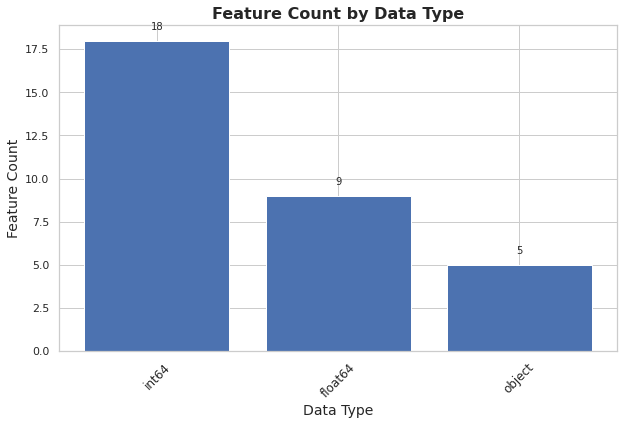

In [8]:
sns.set_theme(style="whitegrid")
data_types = df.dtypes.value_counts()
plt.figure(figsize=(10, 6))
bars = plt.bar(data_types.index.astype(str), data_types.values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom', fontsize=10)
plt.title('Feature Count by Data Type', fontsize=16, fontweight='bold')
plt.xlabel('Data Type', fontsize=14)
plt.ylabel('Feature Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

#### Observation:
Upon reviewing the data type distribution in our dataset, it's apparent that integer-based numerical features predominate, comprising both int64 and float64 types. The int64 type is the most prevalent, suggesting a significant presence of features with discrete numerical values, which could include counts, identifiers, or binary variables, such as "fraud_bool", "credit_risk_score" and so on. The presence of float64 types indicates quantitative features that offer a spectrum of data, possibly representing measurements, probabilities, or other continuously varying quantities like income or velocity.<br>
Meanwhile, the object type typically encompasses categorical or textual data, representing a smaller portion of our features. These categorical features will require encoding to numerical values, as most machine learning models are designed to handle numerical input. This conversion is critical to enable the application of algorithms such as logistic regression and gradient boosting machines, which we aim to compare in our analysis. To facilitate this comparison and maintain model compatibility, we'll convert these object-type features into a numerical format through appropriate encoding techniques.

Checking Missing Value

<AxesSubplot:>

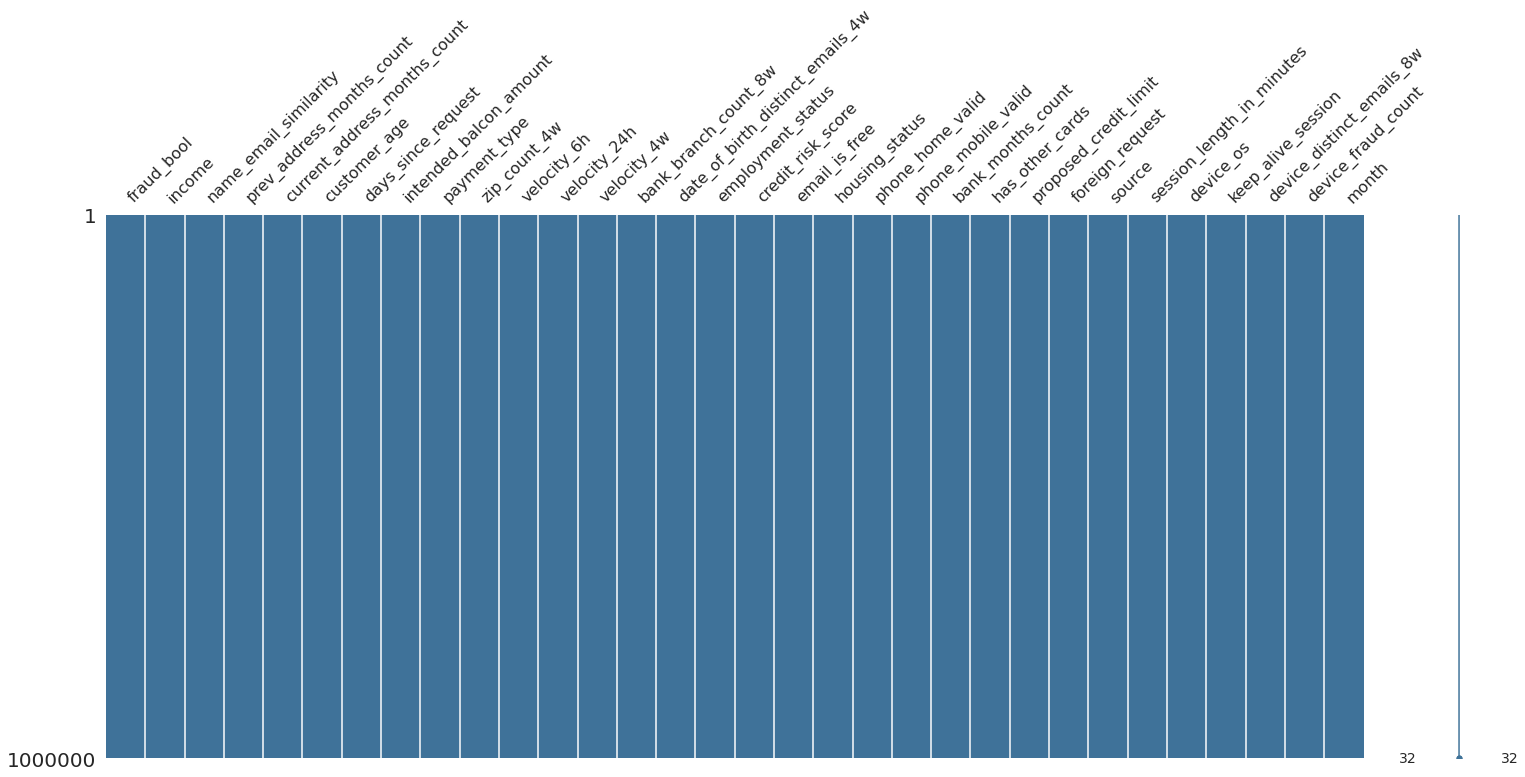

In [9]:
msno.matrix(df, color=(0.25, 0.45, 0.6))

Obviously, our dataset don't have any missing value. Great!!!

## Data Processing

In [10]:
df_copy = df.copy()

### One-Hot Encoding

In [11]:
numerical_features = df.describe().T
num_df = df[numerical_features.index.to_list()]

In [12]:
def get_dummies(df, num_df):
    cate_list = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
    
    for column in cate_list:
        dummies = pd.get_dummies(df[column])
        dummies = dummies.astype(int)
        num_df = pd.concat([num_df, dummies], axis=1)
        num_df = num_df.rename(columns={col: f'{column}_{col.lower()}' for col in dummies.columns})
    
    return num_df
    
df_copy = get_dummies(df_copy, num_df)

During data preprocessing, we conducted one-hot encoding to convert categorical variables into a numerical format suitable for machine learning algorithms. The process began by separating numerical features into a DataFrame, num_df. We defined a function, get_dummies, to process columns like 'payment_type', 'employment_status', 'housing_status', 'source', and 'device_os', generating a new column for each category within these features. Each category was encoded as a series of columns with integer values reflecting the presence of each category in the original data. This expanded num_df maintains clear labeling for interpretability and readies the dataset for machine learning applications.

### Checking Numerical Features Distribution

In [13]:
def visualize_numerical_features(df):
    numerical_features = df.select_dtypes(include=['int64', 'float64'])

    num_cols = len(numerical_features.columns)
    num_rows = (num_cols // 2) + (num_cols % 2)

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 4*num_rows))

    for i, feature in enumerate(numerical_features.columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        sns.histplot(data=df, x=feature, kde=True, ax=ax)
        ax.set_title(f"Distribution of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Frequency")

    # Hide empty subplots if the number of features is odd
    if num_cols % 2 != 0:
        axes[-1, -1].axis("off")

    plt.tight_layout()
    plt.show()

KeyboardInterrupt: 

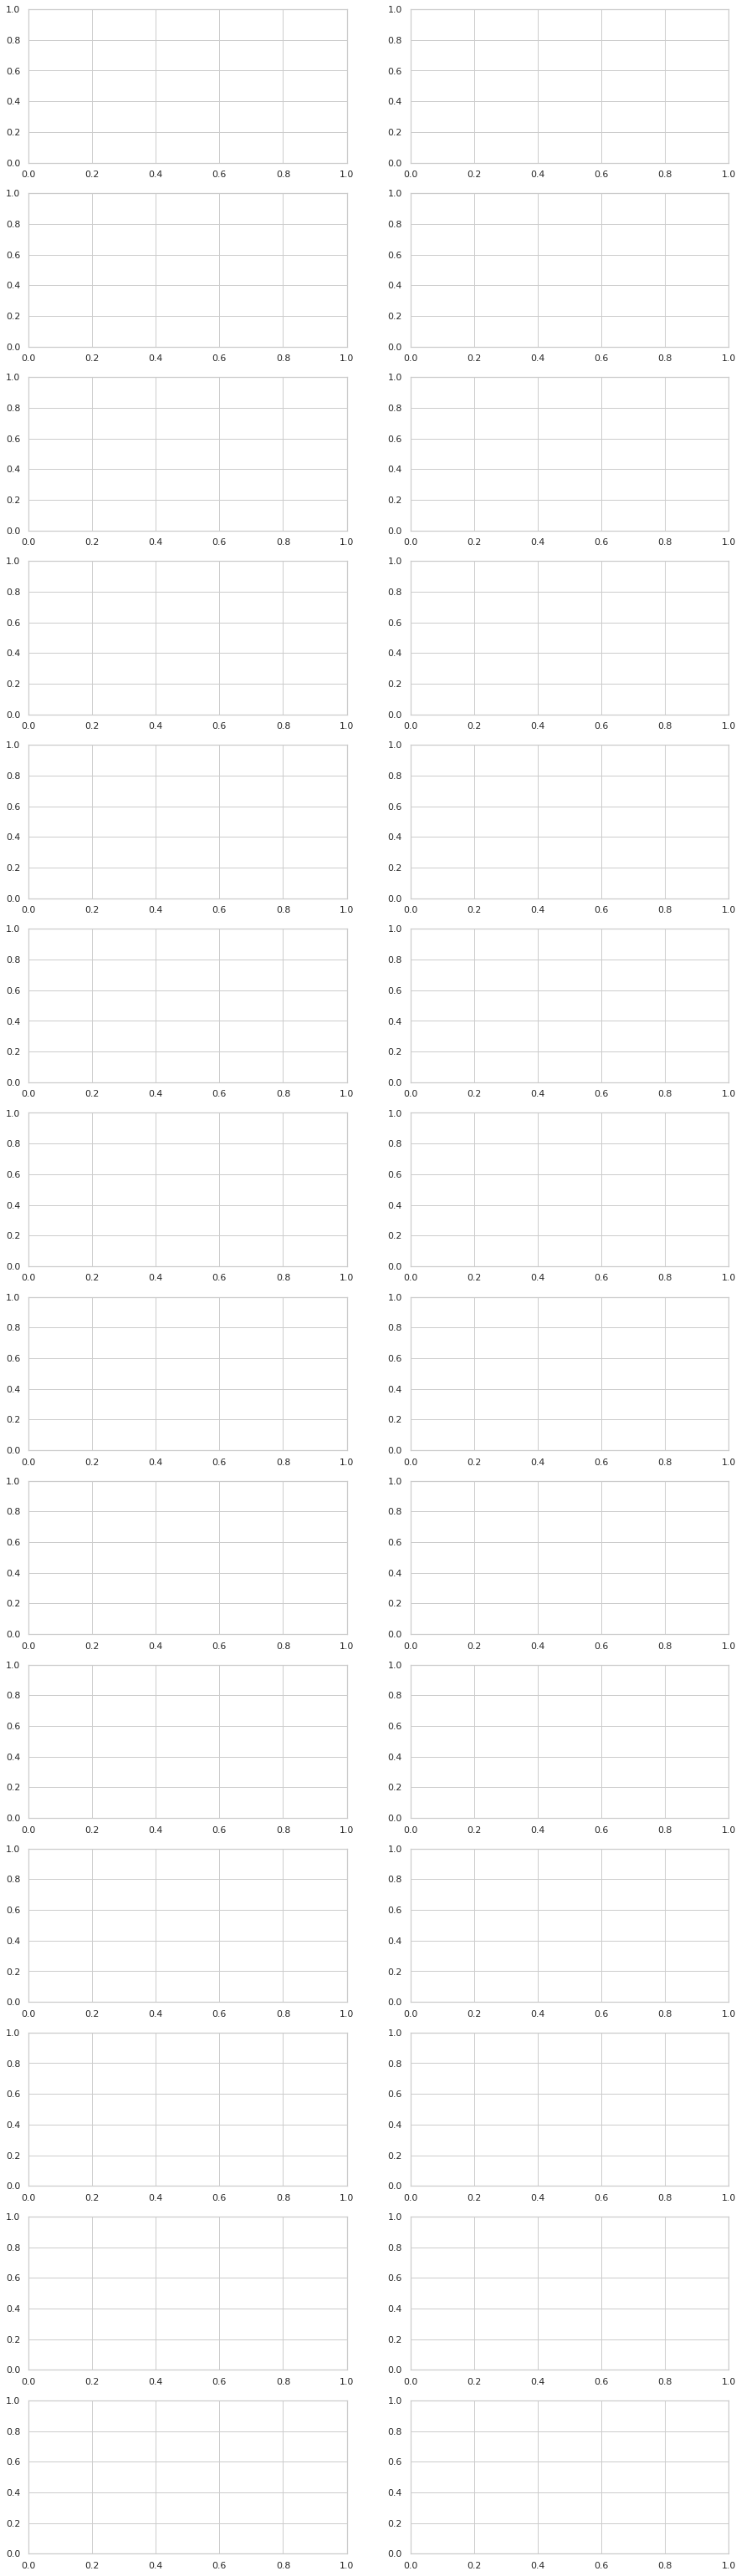

In [14]:
visualize_numerical_features(num_df)

After distribution analysis of the numerical features within our dataset through a series of histograms, we have identified evidence of skewness in several distributions. The histograms, which visually represent the frequency of observations, have shown that not all variables follow a normal distribution; some exhibit a pronounced tail to the right or left.

### Evaluate Skewness

In [14]:
skewness = (num_df.skew().to_frame().
            reset_index(names = ['features'])
            .rename(columns={0: 'skewness'})
         
            .sort_values(by = 'skewness')
            .reset_index(drop = True))

In [15]:
fig = px.bar(skewness, x='skewness', y='features', orientation='h',
             title='Skewness of Numerical Features',
             labels={'Skewness': 'Skewness', 'features': 'Features'})


fig.update_layout(width=800, height=1000)
fig.show()

In [16]:
skewness[(skewness['skewness'] > 1) | (skewness['skewness'] < -1)].reset_index()['features']

0               phone_mobile_valid
1            proposed_credit_limit
2                  has_other_cards
3     current_address_months_count
4                     zip_count_4w
5        device_distinct_emails_8w
6           intended_balcon_amount
7             bank_branch_count_8w
8        session_length_in_minutes
9        prev_address_months_count
10                 foreign_request
11              days_since_request
12                      fraud_bool
Name: features, dtype: object

#### Observation
In the evaluation of skewness for our dataset, we have selected the variables "proposed_credit_limit", "zip_count_4w", and "days_since_request" for logarithmic transformation due to their positively skewed distributions. It is essential to address this characteristic for specific statistical analyses that presume data normality. The chosen variables are suitable for log transformation as they do not contain boolean values or negative numbers, which could complicate the transformation process. Other variables exhibiting substantial skewness are not candidates for this transformation, either due to their boolean nature or the presence of negative values. Correcting skewness through transformations such as logging ensures that the subsequent statistical techniques do not suffer from bias introduced by non-normal distributions and allows us to leverage these variables effectively in our predictive models.

### Logorithm Scaling

In [17]:
columns_to_transform = ['proposed_credit_limit', 'zip_count_4w', 'days_since_request']
df_copy[columns_to_transform] = np.log1p(num_df[columns_to_transform])

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

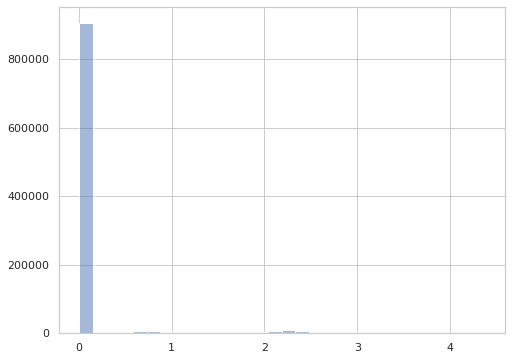

In [18]:
# Define a function to plot histogram and check normality
def plot_hist_and_check_normality(old_df, df, cols):
    for col in cols:
        # Plot histogram
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

        # Check normality
        print(f'Normality test for {col}:')
        print('-------------------------------------')
        print('Prev_Skewness:', skew(old_df[col]))
        print('Skewness:', skew(df[col]))
        print('Kurtosis:', df[col].kurtosis())
        print('-------------------------------------\n')

# Call the function with the desired variables
cols_to_plot = ['days_since_request', 'zip_count_4w', 'proposed_credit_limit']
plot_hist_and_check_normality(num_df, df_copy, cols_to_plot)

By using logrithm scaling, the normality assessment shows that post-logarithmic scaling reveals a marked improvement in the distribution of the data. The skewness value has decreased substantially from the previous one, suggesting a shift toward a more symmetric distribution.

### Drop Highly Correlated Features

after one-hot encoding our categorical variables, we proceeded to address potential multicollinearity in our dataset. Multicollinearity occurs when two or more variables are highly correlated and can introduce redundancy into our predictive models, possibly distorting the results.

We began by constructing a correlation matrix for num_df using the corr function, which computes the Pearson correlation coefficients between every pair of features. To visualize this matrix, we used Seaborn's heatmap function, applying a mask with np.triu to only display the upper triangle of the symmetrical matrix, improving clarity.

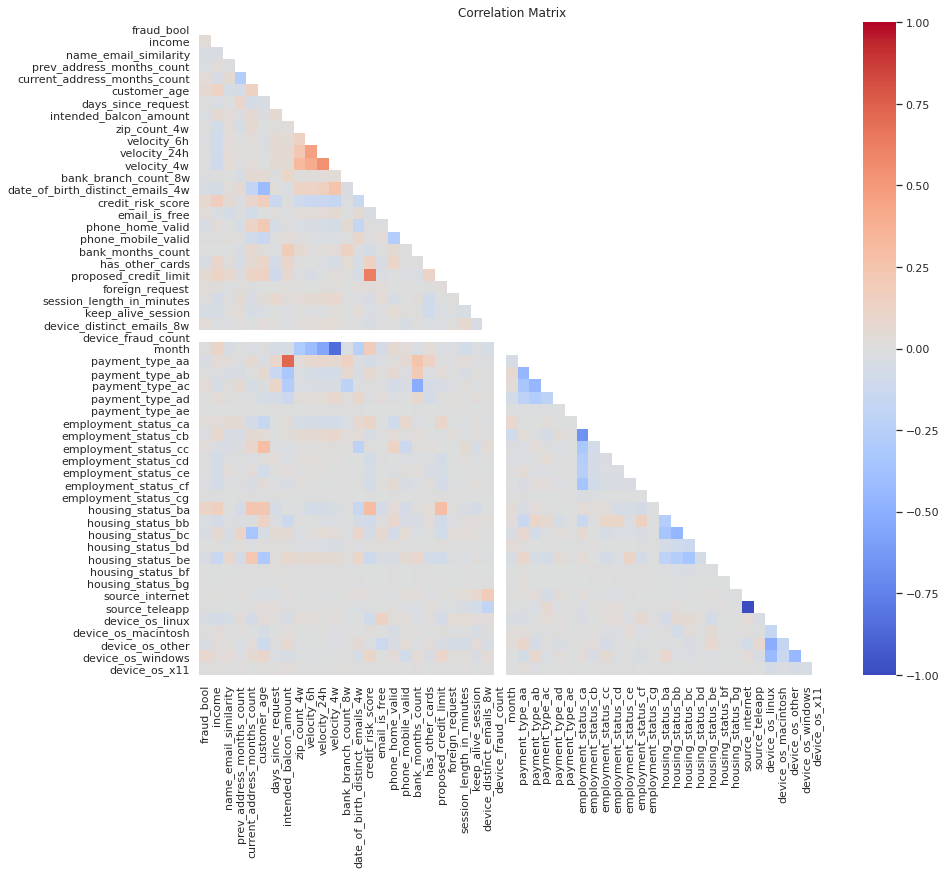

In [19]:
correlation_matrix = df_copy.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

From the heatmap, we observed several features with a correlation higher than our threshold of 0.7. To systematically identify these pairs, we implemented a function, group_related_features, which iterates through the absolute values of the correlation matrix to find and group features with correlations exceeding the threshold.

In [20]:
def group_related_features(correlation_matrix, threshold):
    abs_corr_matrix = correlation_matrix.abs()
    related_features = []
    grouped_features = set()

    for feature1 in abs_corr_matrix.columns:
        for feature2 in abs_corr_matrix.columns:
            if feature1 != feature2 and abs_corr_matrix.loc[feature1, feature2] > threshold:
                if (feature2, feature1) not in grouped_features:
                    related_features.append((feature1, feature2))
                    grouped_features.add((feature1, feature2))

    return related_features

threshold = 0.7

# Get the related features as grouped pairs
related_features = group_related_features(correlation_matrix, threshold)
print(related_features)

[('intended_balcon_amount', 'payment_type_aa'), ('velocity_4w', 'month'), ('source_internet', 'source_teleapp')]


Upon identifying correlated feature pairs, we decided to drop one feature from each pair to reduce redundancy. Additionally, we removed the device_fraud_count feature after noticing it only contained zeros, which would not contribute meaningful information to our models.

In [21]:
df_copy = df_copy.drop(columns = ['payment_type_aa', 'velocity_4w', 'source_teleapp', 'device_fraud_count'])

In [22]:
df_copy.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'zip_count_4w', 'velocity_6h', 'velocity_24h', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'month', 'payment_type_ab',
       'payment_type_ac', 'payment_type_ad', 'payment_type_ae',
       'employment_status_ca', 'employment_status_cb', 'employment_status_cc',
       'employment_status_cd', 'employment_status_ce', 'employment_status_cf',
       'employment_status_cg', 'housing_status_ba', 'housing_status_bb',
       'housing_status_bc', 'housing_status_bd', 'housing_status_be',
       'housing_sta

By eliminating these highly correlated and non-informative features, we aim to enhance the predictive power of our models and ensure that the effects of each independent variable are isolated and interpretable.

### Identify Feature Importance

In [23]:
corr = df_copy.corr()
target_corr = corr['fraud_bool'].abs().sort_values(ascending=False)
target_corr

fraud_bool                          1.000000
housing_status_ba                   0.114428
device_os_windows                   0.078263
credit_risk_score                   0.070624
customer_age                        0.062959
proposed_credit_limit               0.060419
keep_alive_session                  0.050296
income                              0.045079
date_of_birth_distinct_emails_4w    0.043224
device_os_linux                     0.039717
name_email_similarity               0.036720
device_os_other                     0.036433
housing_status_bc                   0.035980
device_distinct_emails_8w           0.035704
has_other_cards                     0.035156
phone_home_valid                    0.035128
current_address_months_count        0.033701
housing_status_be                   0.032781
payment_type_ac                     0.031510
housing_status_bb                   0.028566
email_is_free                       0.027758
prev_address_months_count           0.026031
employment

In [24]:
corr = df_copy.corr()
target_corr = corr['fraud_bool'].abs().sort_values(ascending=False)
strong_corr_features = target_corr.index[1:11] 

print('Top 10 features with highest correlation with target:')
for feature in strong_corr_features:
    print(f"{feature}: {target_corr[feature]}")

Top 10 features with highest correlation with target:
housing_status_ba: 0.11442817716443898
device_os_windows: 0.07826333796376525
credit_risk_score: 0.07062363179619084
customer_age: 0.06295865025001542
proposed_credit_limit: 0.060419022125288546
keep_alive_session: 0.0502964128195964
income: 0.04507917449209994
date_of_birth_distinct_emails_4w: 0.04322370563628376
device_os_linux: 0.03971738420174538
name_email_similarity: 0.03671963583495697


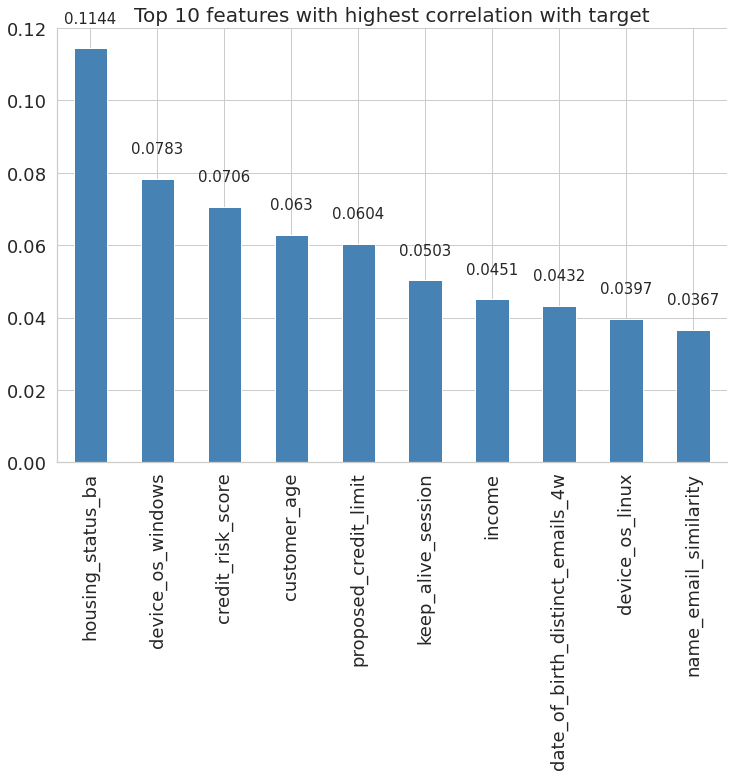

In [25]:
features = [
    "housing_status_ba",
    "device_os_windows",
    "credit_risk_score",
    "customer_age",
    "proposed_credit_limit",
    "keep_alive_session",
    "income",
    "date_of_birth_distinct_emails_4w",
    "device_os_linux",
    "name_email_similarity",
]

plt.figure(figsize=(12,8))
ax = abs(df_copy[features].corrwith(df_copy.fraud_bool)).sort_values(ascending=False).plot(kind='bar',color='SteelBlue',fontsize=18)
for p in ax.patches:
    height = p.get_height().round(4)
    ax.text(p.get_x() + p.get_width() / 2., height+0.007, height, ha = 'center', size = 15)

ax.set_title('Top 10 features with highest correlation with target', fontsize=20)  # Adding the title
sns.despine()

plt.savefig('top10_feature.png', dpi=300, bbox_inches='tight')

It is evident that certain features demonstrate a stronger correlation with the fraud_bool target variable. This implies that these features might have a more significant role in predicting fraudulent bank account applications.<br>
Particularly, "housing_status_BA" and "device_os_windows" show a relatively higher correlation with the target variable. These insights suggest that there may be specific patterns within these features that are associated with fraudulent activity.<br>
For housing_status_BA, it could indicate that the housing status provided by the applicant may contain specific trends or anomalies that correlate with fraudulent behavior. It is advisable to further investigate the nature of these correlations. For instance, applicants from certain housing statuses might be more likely to submit fraudulent applications.<br>
Similarly, device_os_windows indicating a strong correlation suggests that the operating system of the device used for the application might be a factor in fraud. It could imply that applications made from devices with Windows OS have different fraud patterns compared to other operating systems. It is crucial to delve deeper into this feature to understand if there is a particular vulnerability or pattern associated with Windows OS that could be exploited for fraudulent purposes.<br>

### Imbalanced Data

Total Number Of Transactions And Basic Distribution

In [26]:
colors = ['Navy', 'LightBlue']
labels = ['Non-Fraud', 'Fraud']
fraud_proportion = df_copy['fraud_bool'].value_counts() / df_copy['fraud_bool'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=fraud_proportion)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='black', width=0.1)))
fig.update_layout(
    title_text='<b>Credit Card Fraud</b>',
    legend_title='<b>Transaction Type</b>'
)
fig.show()

In [27]:
normal_num = df_copy[df_copy['fraud_bool'] == 0].shape[0]
fraudulent_num = df_copy[df_copy['fraud_bool'] == 1].shape[0]
print(f"Number of non-fraudulent transactions: {normal_num:,}")
print(f"Number of fraudulent transactions: {fraudulent_num:,}")

Number of non-fraudulent transactions: 988,971
Number of fraudulent transactions: 11,029


#### Observation:<br>
The Credit Card Fraud dataset illustrate a pronounced class imbalance, with a explicit contrast in the occurrence of non-fraudulent account applications (988,971) compared to fraudulent account applications (11,029). This significant discrepancy in distribution poses a challenge for predictive modeling, as it can bias the model towards the majority class, leading to poor generalization on the minority class. To address this issue and improve the performance of models, especially in identifying fraudulent account applicatins, our plan is to employ oversampling techniques. Oversampling aims to balance the dataset by increasing the representation of the minority class (in this case, fraudulent account applications) to a level comparable to the majority class. This approach will help in constructing a more balanced dataset, crucial for training a predictive model that is effectively sensitive to both classes and can accurately identify fraudulent activities.

### Randomized Sampling

In [28]:
fraud = df_copy[df_copy['fraud_bool'] == 1]
n = fraud.shape[0]
nonfraud = df_copy[df_copy['fraud_bool'] == 0]

In [30]:
sampled_nonfraud = nonfraud.sample(n=50000 - n, replace=False).reset_index(drop = True)

In [31]:
# concat together, name it as new_df, contains 50000 rows
new_df = pd.concat([sampled_nonfraud, fraud], ignore_index=True)

### select demo data

In [32]:
fraud1 = new_df[new_df['fraud_bool'] == 1]
fraud0 = new_df[new_df['fraud_bool'] == 0]

In [33]:
demo_data = pd.concat([fraud1[:50], fraud0[:50]], ignore_index=True).reset_index(drop = True)

In [34]:
# concat back all others
new_df = pd.concat([fraud1[50:], fraud0[50:]], ignore_index=True).reset_index(drop = True)
# shuffle the sequence
new_df = new_df.sample(frac=1).reset_index(drop=True)

In [35]:
new_df.shape

(49900, 49)

### Check Imbalance Again

In [96]:
colors = ['Navy', 'LightBlue']
labels = ['Non-Fraud', 'Fraud']
fraud_proportion = new_df['fraud_bool'].value_counts() / new_df['fraud_bool'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=fraud_proportion)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='black', width=0.1)))
fig.update_layout(
    title_text='<b>Credit Card Fraud</b>',
    legend_title='<b>Transaction Type</b>'
)
fig.show()

## Baseline Model

### Description

First, a train-test split:

In [36]:
X = new_df.drop(columns = ['fraud_bool'])
y = new_df['fraud_bool']

X_train, X_test, y_train, y_test = (
    train_test_split(X, y, random_state=1)
)

In [37]:
# Feature selection
features = ['income', 'proposed_credit_limit', 'zip_count_4w', 'days_since_request']
X_train_features = X_train[features]
X_test_features = X_test[features]

### Logistic Regression

In [45]:
# Initialize the model
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(X_train_features, y_train)

# Predictions
y_pred = lr.predict(X_test_features)
y_pred_proba = lr.predict_proba(X_test_features)[:, 1]

# Evaluation
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

lr_metrics = pd.DataFrame({
    'Set': 'LogisticRegression Baseline',
    'recall': [recall],
    'f1': [f1],
    'roc_auc': [roc_auc],
})
cm_model_lr = confusion_matrix(y_test, y_pred)

recall, f1, roc_auc

(0.013556903317873707, 0.02661064425770308, 0.6908030418785025)

### Decision Tree 

In [39]:
# Initialize the model
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train_features, y_train)

# Predictions
y_pred_test_dt = dt_model.predict(X_test_features)

# Evaluation
recall_dt = recall_score(y_test, y_pred_test_dt)
f1_dt = f1_score(y_test, y_pred_test_dt)
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test_features)[:, 1])

dt_metrics = pd.DataFrame({
    'Set': 'DecisionTree Baseline',
    'recall': [recall_dt],
    'f1': [f1_dt],
    'roc_auc': [roc_auc_dt],
})
cm_model_dt = confusion_matrix(y_test, y_pred_test_dt)

recall_dt, f1_dt, roc_auc_dt

(0.3160899036746343, 0.31547089193519673, 0.5583758037810723)

### XGB

In [73]:
fraudulent = new_df[new_df['fraud_bool'] == 1]
non_fraudulent = new_df[new_df['fraud_bool'] == 0]

In [29]:
scale_pos_weight = non_fraudulent.shape[0] / fraudulent.shape[0]

In [75]:
scale_pos_weight

3.533502584096473

In [76]:
xgb_model = XGBClassifier(random_state=1, verbosity=0, scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train_features, y_train)

# Predictions
y_pred_test_xgb = xgb_model.predict(X_test_features)

# Evaluation
recall_xgb = recall_score(y_test, y_pred_test_xgb)
f1_xgb = f1_score(y_test, y_pred_test_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test_features)[:, 1])

xgb_metrics = pd.DataFrame({
    'Set': 'XGBoost Baseline',
    'recall': [recall_xgb],
    'f1': [f1_xgb],
    'roc_auc': [roc_auc_xgb],
})
cm_model_xgb = confusion_matrix(y_test, y_pred_test_xgb)

recall_xgb, f1_xgb, roc_auc_xgb

(0.5615412058508741, 0.44633489295335316, 0.6885909748417374)

### Catboost

In [77]:
# Initialize the model
catboost_model = CatBoostClassifier(random_state=1, verbose=False, scale_pos_weight=scale_pos_weight)
catboost_model.fit(X_train_features, y_train)

# Predictions
y_pred_test_catboost = catboost_model.predict(X_test_features)

# Evaluation
recall_catboost = recall_score(y_test, y_pred_test_catboost)
f1_catboost = f1_score(y_test, y_pred_test_catboost)
roc_auc_catboost = roc_auc_score(y_test, catboost_model.predict_proba(X_test_features)[:, 1])

cat_metrics = pd.DataFrame({
    'Set': 'CatBoost Baseline',
    'recall': [recall_catboost],
    'f1': [f1_catboost],
    'roc_auc': [roc_auc_catboost],
})
cm_model_cat = confusion_matrix(y_test, y_pred_test_catboost)

recall_catboost, f1_catboost, roc_auc_catboost

(0.6022119158044952, 0.4645658456034127, 0.7057214044859771)

In [78]:
baseline_metrics = pd.concat([lr_metrics, dt_metrics, xgb_metrics, cat_metrics], ignore_index=True).set_index('Set')
baseline_metrics

recall        f1   roc_auc
Set                                                      
LogisticRegression Baseline  0.013557  0.026611  0.690803
DecisionTree Baseline        0.316090  0.315471  0.558376
XGBoost Baseline             0.561541  0.446335  0.688591
CatBoost Baseline            0.602212  0.464566  0.705721

Text(0.5, 12.5, 'Predicted Label')

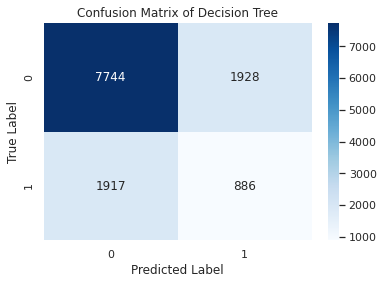

In [79]:
sns.heatmap(cm_model_dt, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

Text(0.5, 12.5, 'Predicted Label')

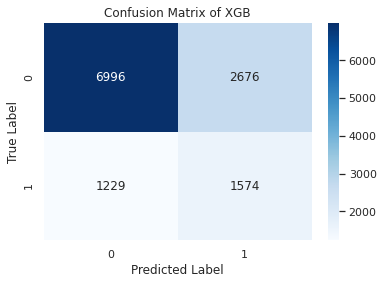

In [80]:
sns.heatmap(cm_model_xgb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of XGB')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

Text(0.5, 12.5, 'Predicted Label')

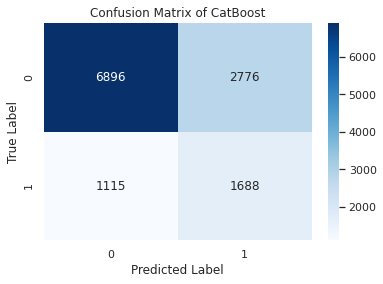

In [82]:
sns.heatmap(cm_model_cat, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix of CatBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

## Final Model

**Feature Selection**

based on the features from baseline model and importance feature ranking

"proposed_credit_limit", "zip_count_4w", "days_since_request" has been log scaling before

In [86]:
final_features = ["income", "proposed_credit_limit", "zip_count_4w", "days_since_request",
                  "housing_status_ba", "device_os_windows", "credit_risk_score", "customer_age",
                  "keep_alive_session", "date_of_birth_distinct_emails_4w", 
                  "device_os_linux", "name_email_similarity"]

In [87]:
X_train_features_final = X_train[final_features]
X_test_features_final = X_test[final_features]

### XGB

**Model Tuning**

In [88]:
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [6, 7],
    'n_estimators': [70, 80, 90],
    'learning_rate': [0.3, 0.4],
    'reg_lambda': [7, 8],
}

# Initialize the XGBoost classifier
xgb_final_tuned = XGBClassifier(random_state=1)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_final_tuned, param_grid=param_grid, cv=5, scoring='recall', verbose=1)
grid_search.fit(X_train_features_final, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 90, 'reg_lambda': 7}


In [89]:
# Use the best hyperparameters to train the final model
xgb_final = XGBClassifier(random_state=1, **best_params, scale_pos_weight = scale_pos_weight)
xgb_final.fit(X_train_features_final, y_train)

# Predictions using the tuned model
y_pred_test_xgb_final = xgb_final.predict(X_test_features_final)

# Evaluation of the tuned model
recall_xgb_final = recall_score(y_test, y_pred_test_xgb_final)
f1_xgb_final = f1_score(y_test, y_pred_test_xgb_final)
roc_auc_xgb_final= roc_auc_score(y_test, xgb_final.predict_proba(X_test_features_final)[:, 1])

xgb_metrics_final = pd.DataFrame({
    'Set': ['XGBoost Final'],
    'recall': [recall_xgb_final],
    'f1': [f1_xgb_final],
    'roc_auc': [roc_auc_xgb_final],
})
cm_model_xgb_final = confusion_matrix(y_test, y_pred_test_xgb_final)

recall_xgb_final, f1_xgb_final, roc_auc_xgb_final

(0.7035319300749198, 0.6009446899283865, 0.8344467348141407)

### CatBoost

**Model Tuning**

In [90]:
# Define the CatBoost classifier
catboost_model = CatBoostClassifier()

# Define the hyperparameters grid for tuning
param_grid = {
    'learning_rate': [0.1, 0.15],
    'depth': [5, 6],
    'iterations': [200,250,300],
    'l2_leaf_reg': [0.5, 0.7]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, scoring='recall', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
recall = recall_score(y_test, y_pred)

print("Best hyperparameters:", best_params)
print("recall on test set:", recall)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0:	learn: 0.6251127	total: 15.6ms	remaining: 3.1s
1:	learn: 0.5724309	total: 30.1ms	remaining: 2.98s
2:	learn: 0.5288972	total: 44.8ms	remaining: 2.94s
3:	learn: 0.4979589	total: 59.6ms	remaining: 2.92s
4:	learn: 0.4709840	total: 72ms	remaining: 2.81s
5:	learn: 0.4530906	total: 82.3ms	remaining: 2.66s
6:	learn: 0.4366604	total: 92ms	remaining: 2.54s
7:	learn: 0.4234867	total: 101ms	remaining: 2.41s
8:	learn: 0.4133483	total: 109ms	remaining: 2.3s
9:	learn: 0.4049249	total: 117ms	remaining: 2.22s
10:	learn: 0.3970469	total: 125ms	remaining: 2.14s
11:	learn: 0.3913401	total: 136ms	remaining: 2.12s
12:	learn: 0.3855312	total: 144ms	remaining: 2.07s
13:	learn: 0.3805330	total: 152ms	remaining: 2.02s
14:	learn: 0.3768608	total: 160ms	remaining: 1.97s
15:	learn: 0.3727300	total: 169ms	remaining: 1.94s
16:	learn: 0.3699866	total: 176ms	remaining: 1.9s
17:	learn: 0.3668908	total: 184ms	remaining: 1.86s
18:	learn: 0.3638672	total: 19

166:	learn: 0.2963815	total: 1.63s	remaining: 323ms
167:	learn: 0.2962405	total: 1.64s	remaining: 313ms
168:	learn: 0.2960181	total: 1.65s	remaining: 303ms
169:	learn: 0.2957995	total: 1.66s	remaining: 294ms
170:	learn: 0.2956256	total: 1.67s	remaining: 284ms
171:	learn: 0.2954220	total: 1.68s	remaining: 274ms
172:	learn: 0.2952396	total: 1.69s	remaining: 264ms
173:	learn: 0.2950638	total: 1.7s	remaining: 254ms
174:	learn: 0.2948804	total: 1.71s	remaining: 244ms
175:	learn: 0.2946614	total: 1.72s	remaining: 234ms
176:	learn: 0.2945192	total: 1.73s	remaining: 224ms
177:	learn: 0.2943633	total: 1.73s	remaining: 214ms
178:	learn: 0.2941372	total: 1.74s	remaining: 205ms
179:	learn: 0.2940324	total: 1.75s	remaining: 195ms
180:	learn: 0.2938249	total: 1.76s	remaining: 185ms
181:	learn: 0.2936280	total: 1.77s	remaining: 175ms
182:	learn: 0.2934110	total: 1.78s	remaining: 165ms
183:	learn: 0.2931844	total: 1.78s	remaining: 155ms
184:	learn: 0.2929963	total: 1.79s	remaining: 145ms
185:	learn: 0

142:	learn: 0.3005251	total: 1.43s	remaining: 569ms
143:	learn: 0.3003213	total: 1.44s	remaining: 561ms
144:	learn: 0.3000999	total: 1.46s	remaining: 554ms
145:	learn: 0.2998903	total: 1.48s	remaining: 546ms
146:	learn: 0.2997151	total: 1.5s	remaining: 540ms
147:	learn: 0.2995122	total: 1.51s	remaining: 530ms
148:	learn: 0.2993214	total: 1.52s	remaining: 520ms
149:	learn: 0.2991000	total: 1.53s	remaining: 511ms
150:	learn: 0.2989102	total: 1.55s	remaining: 502ms
151:	learn: 0.2987359	total: 1.56s	remaining: 492ms
152:	learn: 0.2985516	total: 1.57s	remaining: 482ms
153:	learn: 0.2983604	total: 1.58s	remaining: 472ms
154:	learn: 0.2981289	total: 1.59s	remaining: 462ms
155:	learn: 0.2979463	total: 1.6s	remaining: 452ms
156:	learn: 0.2977552	total: 1.61s	remaining: 442ms
157:	learn: 0.2975849	total: 1.62s	remaining: 431ms
158:	learn: 0.2972883	total: 1.63s	remaining: 421ms
159:	learn: 0.2970968	total: 1.64s	remaining: 410ms
160:	learn: 0.2968817	total: 1.65s	remaining: 400ms
161:	learn: 0.

123:	learn: 0.3054283	total: 1.26s	remaining: 773ms
124:	learn: 0.3051878	total: 1.27s	remaining: 766ms
125:	learn: 0.3049325	total: 1.29s	remaining: 757ms
126:	learn: 0.3047683	total: 1.3s	remaining: 750ms
127:	learn: 0.3045472	total: 1.32s	remaining: 742ms
128:	learn: 0.3042371	total: 1.33s	remaining: 732ms
129:	learn: 0.3040750	total: 1.34s	remaining: 723ms
130:	learn: 0.3037980	total: 1.35s	remaining: 713ms
131:	learn: 0.3035925	total: 1.36s	remaining: 703ms
132:	learn: 0.3033363	total: 1.38s	remaining: 693ms
133:	learn: 0.3031039	total: 1.39s	remaining: 684ms
134:	learn: 0.3028946	total: 1.4s	remaining: 675ms
135:	learn: 0.3026709	total: 1.41s	remaining: 665ms
136:	learn: 0.3024206	total: 1.42s	remaining: 654ms
137:	learn: 0.3021890	total: 1.43s	remaining: 644ms
138:	learn: 0.3019384	total: 1.44s	remaining: 634ms
139:	learn: 0.3016771	total: 1.46s	remaining: 624ms
140:	learn: 0.3014619	total: 1.47s	remaining: 614ms
141:	learn: 0.3012786	total: 1.48s	remaining: 604ms
142:	learn: 0.

86:	learn: 0.3173819	total: 824ms	remaining: 1.07s
87:	learn: 0.3170977	total: 832ms	remaining: 1.06s
88:	learn: 0.3169161	total: 840ms	remaining: 1.05s
89:	learn: 0.3166800	total: 849ms	remaining: 1.04s
90:	learn: 0.3163938	total: 856ms	remaining: 1.02s
91:	learn: 0.3161735	total: 865ms	remaining: 1.01s
92:	learn: 0.3158431	total: 874ms	remaining: 1s
93:	learn: 0.3156368	total: 882ms	remaining: 995ms
94:	learn: 0.3153638	total: 894ms	remaining: 988ms
95:	learn: 0.3150766	total: 906ms	remaining: 981ms
96:	learn: 0.3148206	total: 917ms	remaining: 974ms
97:	learn: 0.3145846	total: 929ms	remaining: 966ms
98:	learn: 0.3143392	total: 940ms	remaining: 959ms
99:	learn: 0.3140406	total: 951ms	remaining: 951ms
100:	learn: 0.3138590	total: 962ms	remaining: 943ms
101:	learn: 0.3136200	total: 976ms	remaining: 938ms
102:	learn: 0.3133717	total: 987ms	remaining: 930ms
103:	learn: 0.3131483	total: 997ms	remaining: 920ms
104:	learn: 0.3128955	total: 1s	remaining: 910ms
105:	learn: 0.3126686	total: 1.0

48:	learn: 0.3280304	total: 415ms	remaining: 1.28s
49:	learn: 0.3274798	total: 424ms	remaining: 1.27s
50:	learn: 0.3269768	total: 435ms	remaining: 1.27s
51:	learn: 0.3264777	total: 443ms	remaining: 1.26s
52:	learn: 0.3259553	total: 454ms	remaining: 1.26s
53:	learn: 0.3254475	total: 464ms	remaining: 1.25s
54:	learn: 0.3250325	total: 473ms	remaining: 1.25s
55:	learn: 0.3246614	total: 480ms	remaining: 1.23s
56:	learn: 0.3242136	total: 487ms	remaining: 1.22s
57:	learn: 0.3237167	total: 494ms	remaining: 1.21s
58:	learn: 0.3232750	total: 502ms	remaining: 1.2s
59:	learn: 0.3228823	total: 510ms	remaining: 1.19s
60:	learn: 0.3224806	total: 518ms	remaining: 1.18s
61:	learn: 0.3221155	total: 524ms	remaining: 1.17s
62:	learn: 0.3217596	total: 532ms	remaining: 1.16s
63:	learn: 0.3212841	total: 540ms	remaining: 1.15s
64:	learn: 0.3209348	total: 548ms	remaining: 1.14s
65:	learn: 0.3206049	total: 556ms	remaining: 1.13s
66:	learn: 0.3200994	total: 564ms	remaining: 1.12s
67:	learn: 0.3197419	total: 572m

22:	learn: 0.3388088	total: 216ms	remaining: 1.66s
23:	learn: 0.3374618	total: 223ms	remaining: 1.63s
24:	learn: 0.3362792	total: 230ms	remaining: 1.61s
25:	learn: 0.3353089	total: 240ms	remaining: 1.6s
26:	learn: 0.3336928	total: 251ms	remaining: 1.61s
27:	learn: 0.3329851	total: 263ms	remaining: 1.61s
28:	learn: 0.3320608	total: 274ms	remaining: 1.61s
29:	learn: 0.3311957	total: 284ms	remaining: 1.61s
30:	learn: 0.3302440	total: 295ms	remaining: 1.61s
31:	learn: 0.3293146	total: 306ms	remaining: 1.61s
32:	learn: 0.3283789	total: 318ms	remaining: 1.61s
33:	learn: 0.3275016	total: 326ms	remaining: 1.59s
34:	learn: 0.3268106	total: 333ms	remaining: 1.57s
35:	learn: 0.3260911	total: 341ms	remaining: 1.55s
36:	learn: 0.3253201	total: 349ms	remaining: 1.54s
37:	learn: 0.3246348	total: 357ms	remaining: 1.52s
38:	learn: 0.3240234	total: 366ms	remaining: 1.51s
39:	learn: 0.3234250	total: 374ms	remaining: 1.5s
40:	learn: 0.3228612	total: 382ms	remaining: 1.48s
41:	learn: 0.3223603	total: 391ms

188:	learn: 0.2769412	total: 1.62s	remaining: 94.5ms
189:	learn: 0.2766499	total: 1.64s	remaining: 86.1ms
190:	learn: 0.2765007	total: 1.64s	remaining: 77.4ms
191:	learn: 0.2762770	total: 1.65s	remaining: 68.8ms
192:	learn: 0.2760586	total: 1.66s	remaining: 60.2ms
193:	learn: 0.2758897	total: 1.67s	remaining: 51.6ms
194:	learn: 0.2757058	total: 1.68s	remaining: 43ms
195:	learn: 0.2754816	total: 1.69s	remaining: 34.4ms
196:	learn: 0.2753011	total: 1.69s	remaining: 25.8ms
197:	learn: 0.2750717	total: 1.7s	remaining: 17.2ms
198:	learn: 0.2748342	total: 1.71s	remaining: 8.6ms
199:	learn: 0.2746489	total: 1.72s	remaining: 0us
0:	learn: 0.5943687	total: 11.7ms	remaining: 2.34s
1:	learn: 0.5245695	total: 22.9ms	remaining: 2.27s
2:	learn: 0.4796065	total: 34.2ms	remaining: 2.25s
3:	learn: 0.4507915	total: 45.3ms	remaining: 2.22s
4:	learn: 0.4277112	total: 55.9ms	remaining: 2.18s
5:	learn: 0.4100040	total: 67.5ms	remaining: 2.18s
6:	learn: 0.3976631	total: 78.1ms	remaining: 2.15s
7:	learn: 0.38

160:	learn: 0.2816396	total: 1.62s	remaining: 393ms
161:	learn: 0.2814426	total: 1.63s	remaining: 383ms
162:	learn: 0.2812201	total: 1.64s	remaining: 372ms
163:	learn: 0.2809910	total: 1.65s	remaining: 362ms
164:	learn: 0.2807811	total: 1.66s	remaining: 352ms
165:	learn: 0.2804722	total: 1.67s	remaining: 341ms
166:	learn: 0.2803560	total: 1.67s	remaining: 331ms
167:	learn: 0.2800930	total: 1.68s	remaining: 320ms
168:	learn: 0.2798720	total: 1.69s	remaining: 310ms
169:	learn: 0.2795896	total: 1.7s	remaining: 300ms
170:	learn: 0.2793291	total: 1.71s	remaining: 290ms
171:	learn: 0.2790844	total: 1.72s	remaining: 279ms
172:	learn: 0.2788524	total: 1.72s	remaining: 269ms
173:	learn: 0.2786731	total: 1.73s	remaining: 259ms
174:	learn: 0.2784837	total: 1.74s	remaining: 248ms
175:	learn: 0.2782131	total: 1.75s	remaining: 238ms
176:	learn: 0.2779973	total: 1.75s	remaining: 228ms
177:	learn: 0.2777961	total: 1.76s	remaining: 218ms
178:	learn: 0.2775781	total: 1.77s	remaining: 208ms
179:	learn: 0

121:	learn: 0.2928600	total: 1.02s	remaining: 652ms
122:	learn: 0.2925371	total: 1.03s	remaining: 643ms
123:	learn: 0.2922726	total: 1.03s	remaining: 634ms
124:	learn: 0.2921052	total: 1.04s	remaining: 626ms
125:	learn: 0.2917714	total: 1.05s	remaining: 619ms
126:	learn: 0.2914909	total: 1.07s	remaining: 614ms
127:	learn: 0.2913055	total: 1.08s	remaining: 606ms
128:	learn: 0.2910067	total: 1.09s	remaining: 600ms
129:	learn: 0.2908265	total: 1.1s	remaining: 593ms
130:	learn: 0.2905558	total: 1.11s	remaining: 585ms
131:	learn: 0.2902754	total: 1.12s	remaining: 578ms
132:	learn: 0.2900525	total: 1.13s	remaining: 570ms
133:	learn: 0.2898986	total: 1.14s	remaining: 562ms
134:	learn: 0.2896528	total: 1.15s	remaining: 553ms
135:	learn: 0.2893934	total: 1.16s	remaining: 545ms
136:	learn: 0.2892033	total: 1.17s	remaining: 536ms
137:	learn: 0.2889794	total: 1.17s	remaining: 528ms
138:	learn: 0.2887280	total: 1.18s	remaining: 519ms
139:	learn: 0.2885970	total: 1.19s	remaining: 510ms
140:	learn: 0

84:	learn: 0.3081297	total: 611ms	remaining: 827ms
85:	learn: 0.3078327	total: 618ms	remaining: 819ms
86:	learn: 0.3075091	total: 626ms	remaining: 812ms
87:	learn: 0.3071867	total: 633ms	remaining: 805ms
88:	learn: 0.3068348	total: 640ms	remaining: 798ms
89:	learn: 0.3065338	total: 647ms	remaining: 791ms
90:	learn: 0.3061562	total: 656ms	remaining: 786ms
91:	learn: 0.3058493	total: 663ms	remaining: 778ms
92:	learn: 0.3054970	total: 670ms	remaining: 771ms
93:	learn: 0.3052054	total: 677ms	remaining: 764ms
94:	learn: 0.3048098	total: 684ms	remaining: 756ms
95:	learn: 0.3044471	total: 692ms	remaining: 749ms
96:	learn: 0.3040789	total: 700ms	remaining: 743ms
97:	learn: 0.3037656	total: 707ms	remaining: 736ms
98:	learn: 0.3034011	total: 716ms	remaining: 730ms
99:	learn: 0.3031905	total: 724ms	remaining: 724ms
100:	learn: 0.3028499	total: 732ms	remaining: 718ms
101:	learn: 0.3026034	total: 739ms	remaining: 710ms
102:	learn: 0.3022832	total: 750ms	remaining: 706ms
103:	learn: 0.3020227	total:

47:	learn: 0.3185783	total: 417ms	remaining: 1.32s
48:	learn: 0.3179768	total: 431ms	remaining: 1.33s
49:	learn: 0.3175555	total: 443ms	remaining: 1.33s
50:	learn: 0.3171285	total: 455ms	remaining: 1.33s
51:	learn: 0.3167052	total: 467ms	remaining: 1.33s
52:	learn: 0.3163822	total: 479ms	remaining: 1.33s
53:	learn: 0.3158574	total: 490ms	remaining: 1.32s
54:	learn: 0.3154871	total: 505ms	remaining: 1.33s
55:	learn: 0.3149243	total: 514ms	remaining: 1.32s
56:	learn: 0.3144568	total: 523ms	remaining: 1.31s
57:	learn: 0.3140744	total: 534ms	remaining: 1.31s
58:	learn: 0.3136610	total: 544ms	remaining: 1.3s
59:	learn: 0.3133465	total: 554ms	remaining: 1.29s
60:	learn: 0.3130326	total: 561ms	remaining: 1.28s
61:	learn: 0.3127799	total: 568ms	remaining: 1.26s
62:	learn: 0.3124480	total: 576ms	remaining: 1.25s
63:	learn: 0.3121376	total: 584ms	remaining: 1.24s
64:	learn: 0.3118047	total: 592ms	remaining: 1.23s
65:	learn: 0.3114396	total: 599ms	remaining: 1.22s
66:	learn: 0.3110479	total: 607m

18:	learn: 0.3634088	total: 212ms	remaining: 2.01s
19:	learn: 0.3605185	total: 220ms	remaining: 1.98s
20:	learn: 0.3583994	total: 227ms	remaining: 1.93s
21:	learn: 0.3565934	total: 233ms	remaining: 1.88s
22:	learn: 0.3547451	total: 243ms	remaining: 1.87s
23:	learn: 0.3530824	total: 253ms	remaining: 1.85s
24:	learn: 0.3512882	total: 265ms	remaining: 1.85s
25:	learn: 0.3497391	total: 276ms	remaining: 1.84s
26:	learn: 0.3483079	total: 286ms	remaining: 1.83s
27:	learn: 0.3471168	total: 295ms	remaining: 1.81s
28:	learn: 0.3457536	total: 305ms	remaining: 1.8s
29:	learn: 0.3446012	total: 315ms	remaining: 1.79s
30:	learn: 0.3432042	total: 327ms	remaining: 1.78s
31:	learn: 0.3422073	total: 336ms	remaining: 1.77s
32:	learn: 0.3411409	total: 347ms	remaining: 1.76s
33:	learn: 0.3402482	total: 357ms	remaining: 1.74s
34:	learn: 0.3393912	total: 368ms	remaining: 1.73s
35:	learn: 0.3383627	total: 378ms	remaining: 1.72s
36:	learn: 0.3374317	total: 387ms	remaining: 1.7s
37:	learn: 0.3367166	total: 394ms

188:	learn: 0.2926354	total: 1.83s	remaining: 107ms
189:	learn: 0.2924597	total: 1.84s	remaining: 96.9ms
190:	learn: 0.2922931	total: 1.85s	remaining: 87.1ms
191:	learn: 0.2921140	total: 1.86s	remaining: 77.4ms
192:	learn: 0.2919853	total: 1.87s	remaining: 67.7ms
193:	learn: 0.2918249	total: 1.88s	remaining: 58ms
194:	learn: 0.2916648	total: 1.88s	remaining: 48.3ms
195:	learn: 0.2914864	total: 1.9s	remaining: 38.7ms
196:	learn: 0.2912413	total: 1.9s	remaining: 29ms
197:	learn: 0.2910857	total: 1.91s	remaining: 19.3ms
198:	learn: 0.2909390	total: 1.92s	remaining: 9.65ms
199:	learn: 0.2906927	total: 1.93s	remaining: 0us
0:	learn: 0.6244718	total: 8.23ms	remaining: 1.64s
1:	learn: 0.5689275	total: 17ms	remaining: 1.68s
2:	learn: 0.5271733	total: 25.5ms	remaining: 1.68s
3:	learn: 0.4966854	total: 37.7ms	remaining: 1.85s
4:	learn: 0.4734214	total: 46.2ms	remaining: 1.8s
5:	learn: 0.4531658	total: 54.6ms	remaining: 1.76s
6:	learn: 0.4385211	total: 63.9ms	remaining: 1.76s
7:	learn: 0.4246438	

166:	learn: 0.2958116	total: 1.64s	remaining: 324ms
167:	learn: 0.2956248	total: 1.68s	remaining: 319ms
168:	learn: 0.2954625	total: 1.68s	remaining: 309ms
169:	learn: 0.2952414	total: 1.69s	remaining: 299ms
170:	learn: 0.2950950	total: 1.7s	remaining: 288ms
171:	learn: 0.2949306	total: 1.71s	remaining: 278ms
172:	learn: 0.2947333	total: 1.72s	remaining: 268ms
173:	learn: 0.2945779	total: 1.73s	remaining: 258ms
174:	learn: 0.2944640	total: 1.73s	remaining: 248ms
175:	learn: 0.2942372	total: 1.75s	remaining: 238ms
176:	learn: 0.2940801	total: 1.76s	remaining: 228ms
177:	learn: 0.2938773	total: 1.77s	remaining: 218ms
178:	learn: 0.2936792	total: 1.78s	remaining: 209ms
179:	learn: 0.2935492	total: 1.79s	remaining: 199ms
180:	learn: 0.2933727	total: 1.8s	remaining: 189ms
181:	learn: 0.2931759	total: 1.81s	remaining: 179ms
182:	learn: 0.2930366	total: 1.82s	remaining: 169ms
183:	learn: 0.2928445	total: 1.83s	remaining: 159ms
184:	learn: 0.2926410	total: 1.84s	remaining: 149ms
185:	learn: 0.

127:	learn: 0.3043981	total: 1.24s	remaining: 697ms
128:	learn: 0.3041235	total: 1.25s	remaining: 688ms
129:	learn: 0.3039266	total: 1.26s	remaining: 676ms
130:	learn: 0.3036250	total: 1.26s	remaining: 666ms
131:	learn: 0.3034075	total: 1.27s	remaining: 655ms
132:	learn: 0.3031708	total: 1.28s	remaining: 644ms
133:	learn: 0.3029511	total: 1.28s	remaining: 633ms
134:	learn: 0.3027096	total: 1.29s	remaining: 623ms
135:	learn: 0.3024571	total: 1.3s	remaining: 612ms
136:	learn: 0.3021892	total: 1.31s	remaining: 601ms
137:	learn: 0.3019829	total: 1.31s	remaining: 591ms
138:	learn: 0.3017031	total: 1.32s	remaining: 580ms
139:	learn: 0.3014216	total: 1.33s	remaining: 569ms
140:	learn: 0.3012013	total: 1.33s	remaining: 559ms
141:	learn: 0.3009496	total: 1.34s	remaining: 548ms
142:	learn: 0.3007390	total: 1.35s	remaining: 538ms
143:	learn: 0.3004722	total: 1.36s	remaining: 528ms
144:	learn: 0.3002538	total: 1.36s	remaining: 517ms
145:	learn: 0.3000343	total: 1.37s	remaining: 507ms
146:	learn: 0

90:	learn: 0.3165823	total: 820ms	remaining: 982ms
91:	learn: 0.3163745	total: 827ms	remaining: 971ms
92:	learn: 0.3160601	total: 836ms	remaining: 961ms
93:	learn: 0.3158025	total: 844ms	remaining: 952ms
94:	learn: 0.3155241	total: 855ms	remaining: 945ms
95:	learn: 0.3152118	total: 866ms	remaining: 938ms
96:	learn: 0.3149774	total: 879ms	remaining: 933ms
97:	learn: 0.3147146	total: 890ms	remaining: 927ms
98:	learn: 0.3144799	total: 902ms	remaining: 920ms
99:	learn: 0.3142809	total: 914ms	remaining: 914ms
100:	learn: 0.3140442	total: 926ms	remaining: 908ms
101:	learn: 0.3138038	total: 939ms	remaining: 902ms
102:	learn: 0.3135870	total: 950ms	remaining: 895ms
103:	learn: 0.3132937	total: 963ms	remaining: 889ms
104:	learn: 0.3129615	total: 976ms	remaining: 883ms
105:	learn: 0.3127010	total: 989ms	remaining: 877ms
106:	learn: 0.3125123	total: 1s	remaining: 872ms
107:	learn: 0.3122429	total: 1.01s	remaining: 865ms
108:	learn: 0.3120067	total: 1.03s	remaining: 857ms
109:	learn: 0.3117413	tot

62:	learn: 0.3217069	total: 615ms	remaining: 1.34s
63:	learn: 0.3213566	total: 627ms	remaining: 1.33s
64:	learn: 0.3209943	total: 638ms	remaining: 1.32s
65:	learn: 0.3207989	total: 648ms	remaining: 1.31s
66:	learn: 0.3203629	total: 659ms	remaining: 1.31s
67:	learn: 0.3199963	total: 670ms	remaining: 1.3s
68:	learn: 0.3195753	total: 681ms	remaining: 1.29s
69:	learn: 0.3192671	total: 690ms	remaining: 1.28s
70:	learn: 0.3188917	total: 701ms	remaining: 1.27s
71:	learn: 0.3185692	total: 710ms	remaining: 1.26s
72:	learn: 0.3182363	total: 719ms	remaining: 1.25s
73:	learn: 0.3179535	total: 727ms	remaining: 1.24s
74:	learn: 0.3176523	total: 735ms	remaining: 1.22s
75:	learn: 0.3172764	total: 743ms	remaining: 1.21s
76:	learn: 0.3170373	total: 751ms	remaining: 1.2s
77:	learn: 0.3166719	total: 760ms	remaining: 1.19s
78:	learn: 0.3162621	total: 768ms	remaining: 1.18s
79:	learn: 0.3159695	total: 777ms	remaining: 1.17s
80:	learn: 0.3157013	total: 786ms	remaining: 1.15s
81:	learn: 0.3153915	total: 795ms

26:	learn: 0.3353915	total: 210ms	remaining: 1.34s
27:	learn: 0.3342718	total: 218ms	remaining: 1.34s
28:	learn: 0.3328706	total: 225ms	remaining: 1.33s
29:	learn: 0.3319849	total: 232ms	remaining: 1.31s
30:	learn: 0.3311669	total: 239ms	remaining: 1.3s
31:	learn: 0.3303823	total: 246ms	remaining: 1.29s
32:	learn: 0.3294493	total: 254ms	remaining: 1.28s
33:	learn: 0.3287165	total: 261ms	remaining: 1.27s
34:	learn: 0.3279431	total: 270ms	remaining: 1.27s
35:	learn: 0.3272502	total: 278ms	remaining: 1.26s
36:	learn: 0.3266392	total: 284ms	remaining: 1.25s
37:	learn: 0.3257137	total: 290ms	remaining: 1.24s
38:	learn: 0.3251632	total: 297ms	remaining: 1.23s
39:	learn: 0.3245715	total: 304ms	remaining: 1.22s
40:	learn: 0.3241150	total: 310ms	remaining: 1.2s
41:	learn: 0.3234272	total: 317ms	remaining: 1.19s
42:	learn: 0.3229280	total: 323ms	remaining: 1.18s
43:	learn: 0.3223631	total: 329ms	remaining: 1.17s
44:	learn: 0.3217648	total: 336ms	remaining: 1.16s
45:	learn: 0.3213619	total: 343ms

193:	learn: 0.2765563	total: 1.42s	remaining: 43.9ms
194:	learn: 0.2763378	total: 1.43s	remaining: 36.6ms
195:	learn: 0.2761445	total: 1.44s	remaining: 29.3ms
196:	learn: 0.2759179	total: 1.44s	remaining: 22ms
197:	learn: 0.2757184	total: 1.45s	remaining: 14.6ms
198:	learn: 0.2754939	total: 1.46s	remaining: 7.31ms
199:	learn: 0.2752833	total: 1.46s	remaining: 0us
0:	learn: 0.5943687	total: 6.25ms	remaining: 1.24s
1:	learn: 0.5245695	total: 12.3ms	remaining: 1.22s
2:	learn: 0.4796080	total: 18.7ms	remaining: 1.23s
3:	learn: 0.4507997	total: 25.4ms	remaining: 1.24s
4:	learn: 0.4277208	total: 31.6ms	remaining: 1.23s
5:	learn: 0.4100128	total: 37.7ms	remaining: 1.22s
6:	learn: 0.3980241	total: 44ms	remaining: 1.21s
7:	learn: 0.3875200	total: 51.3ms	remaining: 1.23s
8:	learn: 0.3802430	total: 57.6ms	remaining: 1.22s
9:	learn: 0.3744868	total: 63.7ms	remaining: 1.21s
10:	learn: 0.3678634	total: 69.8ms	remaining: 1.2s
11:	learn: 0.3627955	total: 75.9ms	remaining: 1.19s
12:	learn: 0.3591094	to

169:	learn: 0.2803575	total: 1.23s	remaining: 216ms
170:	learn: 0.2800787	total: 1.23s	remaining: 209ms
171:	learn: 0.2798246	total: 1.24s	remaining: 202ms
172:	learn: 0.2796062	total: 1.25s	remaining: 195ms
173:	learn: 0.2793663	total: 1.25s	remaining: 187ms
174:	learn: 0.2791269	total: 1.26s	remaining: 180ms
175:	learn: 0.2789142	total: 1.26s	remaining: 173ms
176:	learn: 0.2786493	total: 1.27s	remaining: 165ms
177:	learn: 0.2784342	total: 1.28s	remaining: 158ms
178:	learn: 0.2782481	total: 1.28s	remaining: 151ms
179:	learn: 0.2779941	total: 1.29s	remaining: 143ms
180:	learn: 0.2777756	total: 1.3s	remaining: 136ms
181:	learn: 0.2775562	total: 1.3s	remaining: 129ms
182:	learn: 0.2772508	total: 1.31s	remaining: 122ms
183:	learn: 0.2770385	total: 1.31s	remaining: 114ms
184:	learn: 0.2768510	total: 1.32s	remaining: 107ms
185:	learn: 0.2766238	total: 1.33s	remaining: 100ms
186:	learn: 0.2763824	total: 1.34s	remaining: 93ms
187:	learn: 0.2761067	total: 1.34s	remaining: 85.8ms
188:	learn: 0.

134:	learn: 0.2899571	total: 1.01s	remaining: 488ms
135:	learn: 0.2897360	total: 1.02s	remaining: 480ms
136:	learn: 0.2894022	total: 1.03s	remaining: 472ms
137:	learn: 0.2892061	total: 1.03s	remaining: 464ms
138:	learn: 0.2890515	total: 1.04s	remaining: 456ms
139:	learn: 0.2888554	total: 1.04s	remaining: 448ms
140:	learn: 0.2887473	total: 1.05s	remaining: 440ms
141:	learn: 0.2884108	total: 1.06s	remaining: 432ms
142:	learn: 0.2881137	total: 1.06s	remaining: 424ms
143:	learn: 0.2879163	total: 1.07s	remaining: 416ms
144:	learn: 0.2876543	total: 1.08s	remaining: 410ms
145:	learn: 0.2873616	total: 1.09s	remaining: 402ms
146:	learn: 0.2871193	total: 1.09s	remaining: 394ms
147:	learn: 0.2868444	total: 1.1s	remaining: 386ms
148:	learn: 0.2866743	total: 1.1s	remaining: 378ms
149:	learn: 0.2864663	total: 1.11s	remaining: 371ms
150:	learn: 0.2862433	total: 1.12s	remaining: 363ms
151:	learn: 0.2859792	total: 1.13s	remaining: 356ms
152:	learn: 0.2857431	total: 1.13s	remaining: 348ms
153:	learn: 0.

101:	learn: 0.3014264	total: 822ms	remaining: 790ms
102:	learn: 0.3011849	total: 829ms	remaining: 781ms
103:	learn: 0.3008822	total: 839ms	remaining: 775ms
104:	learn: 0.3005741	total: 848ms	remaining: 767ms
105:	learn: 0.3002510	total: 855ms	remaining: 759ms
106:	learn: 0.2999539	total: 864ms	remaining: 751ms
107:	learn: 0.2996741	total: 871ms	remaining: 742ms
108:	learn: 0.2993982	total: 878ms	remaining: 733ms
109:	learn: 0.2991542	total: 886ms	remaining: 725ms
110:	learn: 0.2988709	total: 894ms	remaining: 717ms
111:	learn: 0.2986455	total: 903ms	remaining: 709ms
112:	learn: 0.2983540	total: 914ms	remaining: 703ms
113:	learn: 0.2980103	total: 924ms	remaining: 697ms
114:	learn: 0.2977508	total: 933ms	remaining: 689ms
115:	learn: 0.2974322	total: 943ms	remaining: 683ms
116:	learn: 0.2971771	total: 954ms	remaining: 677ms
117:	learn: 0.2969078	total: 965ms	remaining: 670ms
118:	learn: 0.2965882	total: 979ms	remaining: 666ms
119:	learn: 0.2962487	total: 989ms	remaining: 660ms
120:	learn: 

70:	learn: 0.3086804	total: 626ms	remaining: 1.14s
71:	learn: 0.3083524	total: 633ms	remaining: 1.13s
72:	learn: 0.3080142	total: 643ms	remaining: 1.12s
73:	learn: 0.3076549	total: 651ms	remaining: 1.11s
74:	learn: 0.3072985	total: 657ms	remaining: 1.09s
75:	learn: 0.3068546	total: 664ms	remaining: 1.08s
76:	learn: 0.3064856	total: 670ms	remaining: 1.07s
77:	learn: 0.3061297	total: 677ms	remaining: 1.06s
78:	learn: 0.3057500	total: 683ms	remaining: 1.05s
79:	learn: 0.3053951	total: 690ms	remaining: 1.03s
80:	learn: 0.3050664	total: 697ms	remaining: 1.02s
81:	learn: 0.3047382	total: 705ms	remaining: 1.01s
82:	learn: 0.3043396	total: 711ms	remaining: 1s
83:	learn: 0.3039313	total: 719ms	remaining: 992ms
84:	learn: 0.3036204	total: 725ms	remaining: 981ms
85:	learn: 0.3033404	total: 732ms	remaining: 970ms
86:	learn: 0.3028598	total: 740ms	remaining: 961ms
87:	learn: 0.3025191	total: 749ms	remaining: 953ms
88:	learn: 0.3021588	total: 755ms	remaining: 942ms
89:	learn: 0.3017717	total: 762ms	

30:	learn: 0.3426501	total: 210ms	remaining: 1.48s
31:	learn: 0.3417539	total: 217ms	remaining: 1.48s
32:	learn: 0.3407206	total: 223ms	remaining: 1.46s
33:	learn: 0.3399514	total: 229ms	remaining: 1.45s
34:	learn: 0.3389806	total: 234ms	remaining: 1.44s
35:	learn: 0.3380096	total: 241ms	remaining: 1.43s
36:	learn: 0.3373134	total: 247ms	remaining: 1.42s
37:	learn: 0.3366002	total: 255ms	remaining: 1.42s
38:	learn: 0.3358523	total: 262ms	remaining: 1.42s
39:	learn: 0.3351398	total: 267ms	remaining: 1.4s
40:	learn: 0.3345959	total: 273ms	remaining: 1.39s
41:	learn: 0.3338771	total: 280ms	remaining: 1.39s
42:	learn: 0.3331939	total: 286ms	remaining: 1.38s
43:	learn: 0.3326529	total: 292ms	remaining: 1.37s
44:	learn: 0.3320202	total: 299ms	remaining: 1.36s
45:	learn: 0.3312493	total: 305ms	remaining: 1.35s
46:	learn: 0.3306563	total: 311ms	remaining: 1.34s
47:	learn: 0.3299880	total: 317ms	remaining: 1.33s
48:	learn: 0.3294467	total: 323ms	remaining: 1.33s
49:	learn: 0.3289011	total: 329m

198:	learn: 0.2904771	total: 1.42s	remaining: 365ms
199:	learn: 0.2902833	total: 1.43s	remaining: 357ms
200:	learn: 0.2901577	total: 1.43s	remaining: 350ms
201:	learn: 0.2899961	total: 1.44s	remaining: 342ms
202:	learn: 0.2898028	total: 1.45s	remaining: 335ms
203:	learn: 0.2896237	total: 1.45s	remaining: 328ms
204:	learn: 0.2894004	total: 1.46s	remaining: 321ms
205:	learn: 0.2891635	total: 1.47s	remaining: 314ms
206:	learn: 0.2890126	total: 1.48s	remaining: 307ms
207:	learn: 0.2888209	total: 1.48s	remaining: 300ms
208:	learn: 0.2886115	total: 1.49s	remaining: 292ms
209:	learn: 0.2884629	total: 1.5s	remaining: 285ms
210:	learn: 0.2882831	total: 1.5s	remaining: 278ms
211:	learn: 0.2881186	total: 1.51s	remaining: 270ms
212:	learn: 0.2879322	total: 1.51s	remaining: 263ms
213:	learn: 0.2878162	total: 1.52s	remaining: 256ms
214:	learn: 0.2875942	total: 1.52s	remaining: 248ms
215:	learn: 0.2874074	total: 1.53s	remaining: 241ms
216:	learn: 0.2871870	total: 1.54s	remaining: 234ms
217:	learn: 0.

122:	learn: 0.3052143	total: 1.02s	remaining: 1.05s
123:	learn: 0.3049915	total: 1.03s	remaining: 1.04s
124:	learn: 0.3047342	total: 1.03s	remaining: 1.03s
125:	learn: 0.3045171	total: 1.04s	remaining: 1.02s
126:	learn: 0.3042631	total: 1.05s	remaining: 1.02s
127:	learn: 0.3039584	total: 1.06s	remaining: 1.01s
128:	learn: 0.3037462	total: 1.06s	remaining: 999ms
129:	learn: 0.3035148	total: 1.07s	remaining: 991ms
130:	learn: 0.3032557	total: 1.08s	remaining: 982ms
131:	learn: 0.3030276	total: 1.09s	remaining: 974ms
132:	learn: 0.3028145	total: 1.1s	remaining: 965ms
133:	learn: 0.3025747	total: 1.1s	remaining: 957ms
134:	learn: 0.3022966	total: 1.11s	remaining: 948ms
135:	learn: 0.3020325	total: 1.12s	remaining: 940ms
136:	learn: 0.3018349	total: 1.13s	remaining: 932ms
137:	learn: 0.3016516	total: 1.14s	remaining: 923ms
138:	learn: 0.3014195	total: 1.15s	remaining: 915ms
139:	learn: 0.3011925	total: 1.16s	remaining: 911ms
140:	learn: 0.3009729	total: 1.18s	remaining: 912ms
141:	learn: 0.

38:	learn: 0.3348981	total: 421ms	remaining: 2.28s
39:	learn: 0.3343604	total: 430ms	remaining: 2.26s
40:	learn: 0.3336351	total: 440ms	remaining: 2.24s
41:	learn: 0.3331001	total: 451ms	remaining: 2.23s
42:	learn: 0.3324447	total: 459ms	remaining: 2.21s
43:	learn: 0.3317925	total: 466ms	remaining: 2.18s
44:	learn: 0.3310949	total: 473ms	remaining: 2.15s
45:	learn: 0.3304189	total: 480ms	remaining: 2.13s
46:	learn: 0.3299141	total: 487ms	remaining: 2.1s
47:	learn: 0.3293307	total: 493ms	remaining: 2.08s
48:	learn: 0.3286476	total: 500ms	remaining: 2.05s
49:	learn: 0.3280158	total: 506ms	remaining: 2.02s
50:	learn: 0.3275490	total: 513ms	remaining: 2s
51:	learn: 0.3270384	total: 519ms	remaining: 1.98s
52:	learn: 0.3265861	total: 525ms	remaining: 1.95s
53:	learn: 0.3260982	total: 532ms	remaining: 1.93s
54:	learn: 0.3256197	total: 538ms	remaining: 1.91s
55:	learn: 0.3252391	total: 545ms	remaining: 1.89s
56:	learn: 0.3248005	total: 552ms	remaining: 1.87s
57:	learn: 0.3242877	total: 559ms	r

209:	learn: 0.2886107	total: 1.62s	remaining: 309ms
210:	learn: 0.2884671	total: 1.63s	remaining: 301ms
211:	learn: 0.2883256	total: 1.63s	remaining: 293ms
212:	learn: 0.2881846	total: 1.64s	remaining: 285ms
213:	learn: 0.2880202	total: 1.65s	remaining: 277ms
214:	learn: 0.2878629	total: 1.65s	remaining: 269ms
215:	learn: 0.2876866	total: 1.66s	remaining: 262ms
216:	learn: 0.2874635	total: 1.67s	remaining: 254ms
217:	learn: 0.2873804	total: 1.67s	remaining: 246ms
218:	learn: 0.2872276	total: 1.68s	remaining: 238ms
219:	learn: 0.2870563	total: 1.69s	remaining: 230ms
220:	learn: 0.2868143	total: 1.69s	remaining: 222ms
221:	learn: 0.2866518	total: 1.7s	remaining: 215ms
222:	learn: 0.2865135	total: 1.71s	remaining: 207ms
223:	learn: 0.2863266	total: 1.72s	remaining: 199ms
224:	learn: 0.2861288	total: 1.72s	remaining: 191ms
225:	learn: 0.2859545	total: 1.73s	remaining: 184ms
226:	learn: 0.2858446	total: 1.74s	remaining: 176ms
227:	learn: 0.2857208	total: 1.74s	remaining: 168ms
228:	learn: 0

142:	learn: 0.3035271	total: 1.02s	remaining: 762ms
143:	learn: 0.3032863	total: 1.02s	remaining: 754ms
144:	learn: 0.3030448	total: 1.03s	remaining: 747ms
145:	learn: 0.3027865	total: 1.04s	remaining: 739ms
146:	learn: 0.3025792	total: 1.04s	remaining: 731ms
147:	learn: 0.3023148	total: 1.05s	remaining: 723ms
148:	learn: 0.3020997	total: 1.06s	remaining: 716ms
149:	learn: 0.3018879	total: 1.06s	remaining: 709ms
150:	learn: 0.3016966	total: 1.07s	remaining: 701ms
151:	learn: 0.3014584	total: 1.07s	remaining: 693ms
152:	learn: 0.3012392	total: 1.08s	remaining: 686ms
153:	learn: 0.3009914	total: 1.09s	remaining: 678ms
154:	learn: 0.3007575	total: 1.09s	remaining: 670ms
155:	learn: 0.3005850	total: 1.1s	remaining: 664ms
156:	learn: 0.3003559	total: 1.11s	remaining: 656ms
157:	learn: 0.3001174	total: 1.11s	remaining: 649ms
158:	learn: 0.2998936	total: 1.12s	remaining: 641ms
159:	learn: 0.2996900	total: 1.13s	remaining: 634ms
160:	learn: 0.2995015	total: 1.13s	remaining: 627ms
161:	learn: 0

57:	learn: 0.3237167	total: 412ms	remaining: 1.36s
58:	learn: 0.3232750	total: 420ms	remaining: 1.36s
59:	learn: 0.3228823	total: 427ms	remaining: 1.35s
60:	learn: 0.3224806	total: 433ms	remaining: 1.34s
61:	learn: 0.3221155	total: 439ms	remaining: 1.33s
62:	learn: 0.3217596	total: 445ms	remaining: 1.32s
63:	learn: 0.3212841	total: 459ms	remaining: 1.33s
64:	learn: 0.3209348	total: 465ms	remaining: 1.32s
65:	learn: 0.3206049	total: 470ms	remaining: 1.31s
66:	learn: 0.3200994	total: 475ms	remaining: 1.3s
67:	learn: 0.3197419	total: 481ms	remaining: 1.29s
68:	learn: 0.3193689	total: 487ms	remaining: 1.28s
69:	learn: 0.3189222	total: 493ms	remaining: 1.27s
70:	learn: 0.3185578	total: 499ms	remaining: 1.26s
71:	learn: 0.3182060	total: 504ms	remaining: 1.25s
72:	learn: 0.3179389	total: 510ms	remaining: 1.24s
73:	learn: 0.3175705	total: 516ms	remaining: 1.23s
74:	learn: 0.3172940	total: 522ms	remaining: 1.22s
75:	learn: 0.3169503	total: 527ms	remaining: 1.21s
76:	learn: 0.3166532	total: 533m

224:	learn: 0.2850623	total: 1.83s	remaining: 203ms
225:	learn: 0.2848358	total: 1.84s	remaining: 195ms
226:	learn: 0.2846452	total: 1.85s	remaining: 187ms
227:	learn: 0.2844824	total: 1.86s	remaining: 179ms
228:	learn: 0.2843523	total: 1.87s	remaining: 171ms
229:	learn: 0.2841282	total: 1.88s	remaining: 163ms
230:	learn: 0.2839468	total: 1.89s	remaining: 155ms
231:	learn: 0.2837307	total: 1.9s	remaining: 147ms
232:	learn: 0.2835546	total: 1.91s	remaining: 139ms
233:	learn: 0.2834112	total: 1.92s	remaining: 131ms
234:	learn: 0.2832704	total: 1.93s	remaining: 123ms
235:	learn: 0.2830987	total: 1.94s	remaining: 115ms
236:	learn: 0.2829390	total: 1.95s	remaining: 107ms
237:	learn: 0.2827839	total: 1.96s	remaining: 98.7ms
238:	learn: 0.2826345	total: 1.97s	remaining: 90.5ms
239:	learn: 0.2824866	total: 1.98s	remaining: 82.3ms
240:	learn: 0.2823449	total: 1.98s	remaining: 74.1ms
241:	learn: 0.2821684	total: 1.99s	remaining: 65.9ms
242:	learn: 0.2820085	total: 2s	remaining: 57.7ms
243:	learn

141:	learn: 0.2879820	total: 1.26s	remaining: 958ms
142:	learn: 0.2878034	total: 1.27s	remaining: 948ms
143:	learn: 0.2876081	total: 1.27s	remaining: 939ms
144:	learn: 0.2873855	total: 1.28s	remaining: 929ms
145:	learn: 0.2870066	total: 1.29s	remaining: 920ms
146:	learn: 0.2868378	total: 1.3s	remaining: 910ms
147:	learn: 0.2865946	total: 1.31s	remaining: 902ms
148:	learn: 0.2863784	total: 1.32s	remaining: 892ms
149:	learn: 0.2861832	total: 1.32s	remaining: 883ms
150:	learn: 0.2859757	total: 1.33s	remaining: 873ms
151:	learn: 0.2857327	total: 1.34s	remaining: 864ms
152:	learn: 0.2855136	total: 1.35s	remaining: 855ms
153:	learn: 0.2851866	total: 1.36s	remaining: 846ms
154:	learn: 0.2850285	total: 1.37s	remaining: 837ms
155:	learn: 0.2847922	total: 1.37s	remaining: 828ms
156:	learn: 0.2845013	total: 1.38s	remaining: 819ms
157:	learn: 0.2843971	total: 1.39s	remaining: 810ms
158:	learn: 0.2841038	total: 1.4s	remaining: 801ms
159:	learn: 0.2840022	total: 1.41s	remaining: 793ms
160:	learn: 0.

71:	learn: 0.3083049	total: 463ms	remaining: 1.14s
72:	learn: 0.3079017	total: 469ms	remaining: 1.14s
73:	learn: 0.3076307	total: 475ms	remaining: 1.13s
74:	learn: 0.3071203	total: 481ms	remaining: 1.12s
75:	learn: 0.3068092	total: 487ms	remaining: 1.11s
76:	learn: 0.3064076	total: 493ms	remaining: 1.11s
77:	learn: 0.3060892	total: 500ms	remaining: 1.1s
78:	learn: 0.3057246	total: 506ms	remaining: 1.09s
79:	learn: 0.3053433	total: 512ms	remaining: 1.09s
80:	learn: 0.3050247	total: 518ms	remaining: 1.08s
81:	learn: 0.3047215	total: 524ms	remaining: 1.07s
82:	learn: 0.3044168	total: 529ms	remaining: 1.06s
83:	learn: 0.3040874	total: 535ms	remaining: 1.06s
84:	learn: 0.3036381	total: 542ms	remaining: 1.05s
85:	learn: 0.3032678	total: 548ms	remaining: 1.04s
86:	learn: 0.3029168	total: 554ms	remaining: 1.04s
87:	learn: 0.3026178	total: 560ms	remaining: 1.03s
88:	learn: 0.3022883	total: 567ms	remaining: 1.02s
89:	learn: 0.3018626	total: 574ms	remaining: 1.02s
90:	learn: 0.3014870	total: 580m

0:	learn: 0.5952700	total: 7ms	remaining: 1.74s
1:	learn: 0.5257974	total: 14.2ms	remaining: 1.76s
2:	learn: 0.4801396	total: 20.6ms	remaining: 1.69s
3:	learn: 0.4508403	total: 29.3ms	remaining: 1.8s
4:	learn: 0.4290704	total: 38.3ms	remaining: 1.88s
5:	learn: 0.4107268	total: 44.9ms	remaining: 1.82s
6:	learn: 0.3974835	total: 50.9ms	remaining: 1.77s
7:	learn: 0.3878946	total: 57.2ms	remaining: 1.73s
8:	learn: 0.3802197	total: 64.2ms	remaining: 1.72s
9:	learn: 0.3743765	total: 71.1ms	remaining: 1.71s
10:	learn: 0.3672964	total: 77ms	remaining: 1.67s
11:	learn: 0.3619364	total: 87ms	remaining: 1.73s
12:	learn: 0.3587542	total: 93.1ms	remaining: 1.7s
13:	learn: 0.3553081	total: 98.6ms	remaining: 1.66s
14:	learn: 0.3528667	total: 105ms	remaining: 1.64s
15:	learn: 0.3498801	total: 111ms	remaining: 1.62s
16:	learn: 0.3481830	total: 117ms	remaining: 1.6s
17:	learn: 0.3464054	total: 123ms	remaining: 1.58s
18:	learn: 0.3443860	total: 129ms	remaining: 1.56s
19:	learn: 0.3428604	total: 135ms	rem

165:	learn: 0.2820514	total: 1.45s	remaining: 735ms
166:	learn: 0.2818426	total: 1.46s	remaining: 726ms
167:	learn: 0.2815721	total: 1.47s	remaining: 718ms
168:	learn: 0.2813465	total: 1.48s	remaining: 709ms
169:	learn: 0.2811242	total: 1.49s	remaining: 699ms
170:	learn: 0.2808514	total: 1.49s	remaining: 690ms
171:	learn: 0.2807026	total: 1.5s	remaining: 681ms
172:	learn: 0.2804797	total: 1.51s	remaining: 673ms
173:	learn: 0.2802261	total: 1.52s	remaining: 664ms
174:	learn: 0.2799936	total: 1.53s	remaining: 657ms
175:	learn: 0.2799080	total: 1.54s	remaining: 648ms
176:	learn: 0.2797888	total: 1.55s	remaining: 639ms
177:	learn: 0.2796101	total: 1.56s	remaining: 630ms
178:	learn: 0.2793866	total: 1.56s	remaining: 621ms
179:	learn: 0.2791105	total: 1.57s	remaining: 612ms
180:	learn: 0.2788555	total: 1.58s	remaining: 604ms
181:	learn: 0.2786602	total: 1.59s	remaining: 595ms
182:	learn: 0.2784356	total: 1.6s	remaining: 586ms
183:	learn: 0.2781965	total: 1.61s	remaining: 577ms
184:	learn: 0.

76:	learn: 0.3109305	total: 611ms	remaining: 1.37s
77:	learn: 0.3105593	total: 620ms	remaining: 1.37s
78:	learn: 0.3102783	total: 627ms	remaining: 1.36s
79:	learn: 0.3099059	total: 635ms	remaining: 1.35s
80:	learn: 0.3095922	total: 644ms	remaining: 1.34s
81:	learn: 0.3091903	total: 651ms	remaining: 1.33s
82:	learn: 0.3088192	total: 659ms	remaining: 1.32s
83:	learn: 0.3084752	total: 666ms	remaining: 1.31s
84:	learn: 0.3081297	total: 671ms	remaining: 1.3s
85:	learn: 0.3078327	total: 676ms	remaining: 1.29s
86:	learn: 0.3075091	total: 682ms	remaining: 1.28s
87:	learn: 0.3071867	total: 688ms	remaining: 1.26s
88:	learn: 0.3068348	total: 693ms	remaining: 1.25s
89:	learn: 0.3065338	total: 699ms	remaining: 1.24s
90:	learn: 0.3061562	total: 705ms	remaining: 1.23s
91:	learn: 0.3058493	total: 711ms	remaining: 1.22s
92:	learn: 0.3054970	total: 717ms	remaining: 1.21s
93:	learn: 0.3052054	total: 722ms	remaining: 1.2s
94:	learn: 0.3048098	total: 728ms	remaining: 1.19s
95:	learn: 0.3044471	total: 734ms

248:	learn: 0.2655015	total: 2.04s	remaining: 8.18ms
249:	learn: 0.2652923	total: 2.04s	remaining: 0us
0:	learn: 0.5951069	total: 12.8ms	remaining: 3.17s
1:	learn: 0.5253869	total: 24.1ms	remaining: 2.99s
2:	learn: 0.4799715	total: 36.3ms	remaining: 2.98s
3:	learn: 0.4495437	total: 47.5ms	remaining: 2.92s
4:	learn: 0.4298940	total: 58.6ms	remaining: 2.87s
5:	learn: 0.4121015	total: 69.5ms	remaining: 2.83s
6:	learn: 0.3992267	total: 82.1ms	remaining: 2.85s
7:	learn: 0.3883809	total: 93.7ms	remaining: 2.83s
8:	learn: 0.3810691	total: 104ms	remaining: 2.77s
9:	learn: 0.3739268	total: 113ms	remaining: 2.71s
10:	learn: 0.3683695	total: 122ms	remaining: 2.66s
11:	learn: 0.3641828	total: 132ms	remaining: 2.62s
12:	learn: 0.3605788	total: 141ms	remaining: 2.57s
13:	learn: 0.3574345	total: 150ms	remaining: 2.53s
14:	learn: 0.3534152	total: 165ms	remaining: 2.58s
15:	learn: 0.3503472	total: 176ms	remaining: 2.57s
16:	learn: 0.3478911	total: 188ms	remaining: 2.57s
17:	learn: 0.3456613	total: 199m

160:	learn: 0.2825719	total: 1.5s	remaining: 829ms
161:	learn: 0.2823903	total: 1.51s	remaining: 821ms
162:	learn: 0.2820936	total: 1.52s	remaining: 811ms
163:	learn: 0.2817516	total: 1.53s	remaining: 802ms
164:	learn: 0.2815296	total: 1.54s	remaining: 792ms
165:	learn: 0.2812590	total: 1.55s	remaining: 784ms
166:	learn: 0.2810048	total: 1.56s	remaining: 774ms
167:	learn: 0.2807438	total: 1.57s	remaining: 765ms
168:	learn: 0.2805045	total: 1.57s	remaining: 755ms
169:	learn: 0.2802376	total: 1.58s	remaining: 745ms
170:	learn: 0.2800005	total: 1.59s	remaining: 736ms
171:	learn: 0.2797867	total: 1.6s	remaining: 726ms
172:	learn: 0.2795382	total: 1.61s	remaining: 717ms
173:	learn: 0.2792952	total: 1.62s	remaining: 707ms
174:	learn: 0.2790885	total: 1.63s	remaining: 697ms
175:	learn: 0.2788058	total: 1.65s	remaining: 692ms
176:	learn: 0.2785719	total: 1.66s	remaining: 684ms
177:	learn: 0.2783216	total: 1.67s	remaining: 675ms
178:	learn: 0.2781091	total: 1.68s	remaining: 666ms
179:	learn: 0.

83:	learn: 0.3167679	total: 607ms	remaining: 1.2s
84:	learn: 0.3164094	total: 614ms	remaining: 1.19s
85:	learn: 0.3161542	total: 623ms	remaining: 1.19s
86:	learn: 0.3158389	total: 629ms	remaining: 1.18s
87:	learn: 0.3154319	total: 635ms	remaining: 1.17s
88:	learn: 0.3151890	total: 642ms	remaining: 1.16s
89:	learn: 0.3149149	total: 648ms	remaining: 1.15s
90:	learn: 0.3146247	total: 654ms	remaining: 1.14s
91:	learn: 0.3142216	total: 661ms	remaining: 1.13s
92:	learn: 0.3139511	total: 667ms	remaining: 1.13s
93:	learn: 0.3137345	total: 673ms	remaining: 1.12s
94:	learn: 0.3134749	total: 679ms	remaining: 1.11s
95:	learn: 0.3131717	total: 685ms	remaining: 1.1s
96:	learn: 0.3129044	total: 691ms	remaining: 1.09s
97:	learn: 0.3127049	total: 697ms	remaining: 1.08s
98:	learn: 0.3125055	total: 707ms	remaining: 1.08s
99:	learn: 0.3122977	total: 713ms	remaining: 1.07s
100:	learn: 0.3120404	total: 719ms	remaining: 1.06s
101:	learn: 0.3118309	total: 726ms	remaining: 1.05s
102:	learn: 0.3116128	total: 73

0:	learn: 0.6244718	total: 15ms	remaining: 3.74s
1:	learn: 0.5689275	total: 27.4ms	remaining: 3.4s
2:	learn: 0.5271733	total: 39.2ms	remaining: 3.22s
3:	learn: 0.4966854	total: 50.5ms	remaining: 3.11s
4:	learn: 0.4734214	total: 61.5ms	remaining: 3.01s
5:	learn: 0.4531658	total: 72.4ms	remaining: 2.94s
6:	learn: 0.4385211	total: 83.7ms	remaining: 2.9s
7:	learn: 0.4246438	total: 94.6ms	remaining: 2.86s
8:	learn: 0.4139777	total: 106ms	remaining: 2.84s
9:	learn: 0.4053764	total: 116ms	remaining: 2.78s
10:	learn: 0.3977930	total: 125ms	remaining: 2.71s
11:	learn: 0.3916788	total: 133ms	remaining: 2.65s
12:	learn: 0.3853075	total: 143ms	remaining: 2.6s
13:	learn: 0.3806759	total: 151ms	remaining: 2.55s
14:	learn: 0.3757167	total: 160ms	remaining: 2.51s
15:	learn: 0.3716644	total: 170ms	remaining: 2.48s
16:	learn: 0.3683922	total: 178ms	remaining: 2.44s
17:	learn: 0.3652058	total: 187ms	remaining: 2.41s
18:	learn: 0.3619623	total: 195ms	remaining: 2.37s
19:	learn: 0.3596619	total: 204ms	rema

161:	learn: 0.2969059	total: 1.44s	remaining: 782ms
162:	learn: 0.2966921	total: 1.45s	remaining: 773ms
163:	learn: 0.2965223	total: 1.46s	remaining: 764ms
164:	learn: 0.2962721	total: 1.46s	remaining: 754ms
165:	learn: 0.2960256	total: 1.47s	remaining: 745ms
166:	learn: 0.2958116	total: 1.48s	remaining: 735ms
167:	learn: 0.2956248	total: 1.49s	remaining: 725ms
168:	learn: 0.2954625	total: 1.49s	remaining: 716ms
169:	learn: 0.2952414	total: 1.5s	remaining: 706ms
170:	learn: 0.2950950	total: 1.51s	remaining: 696ms
171:	learn: 0.2949306	total: 1.51s	remaining: 687ms
172:	learn: 0.2947333	total: 1.52s	remaining: 678ms
173:	learn: 0.2945779	total: 1.53s	remaining: 668ms
174:	learn: 0.2944640	total: 1.54s	remaining: 658ms
175:	learn: 0.2942372	total: 1.54s	remaining: 649ms
176:	learn: 0.2940801	total: 1.55s	remaining: 640ms
177:	learn: 0.2938773	total: 1.56s	remaining: 631ms
178:	learn: 0.2936792	total: 1.57s	remaining: 622ms
179:	learn: 0.2935492	total: 1.58s	remaining: 613ms
180:	learn: 0

72:	learn: 0.3185587	total: 605ms	remaining: 1.47s
73:	learn: 0.3182323	total: 613ms	remaining: 1.46s
74:	learn: 0.3178830	total: 622ms	remaining: 1.45s
75:	learn: 0.3176880	total: 630ms	remaining: 1.44s
76:	learn: 0.3173719	total: 639ms	remaining: 1.44s
77:	learn: 0.3170946	total: 649ms	remaining: 1.43s
78:	learn: 0.3167411	total: 658ms	remaining: 1.42s
79:	learn: 0.3163735	total: 667ms	remaining: 1.42s
80:	learn: 0.3161242	total: 676ms	remaining: 1.41s
81:	learn: 0.3158451	total: 684ms	remaining: 1.4s
82:	learn: 0.3155185	total: 692ms	remaining: 1.39s
83:	learn: 0.3152247	total: 706ms	remaining: 1.4s
84:	learn: 0.3149025	total: 715ms	remaining: 1.39s
85:	learn: 0.3146939	total: 723ms	remaining: 1.38s
86:	learn: 0.3144204	total: 732ms	remaining: 1.37s
87:	learn: 0.3141347	total: 741ms	remaining: 1.36s
88:	learn: 0.3138797	total: 749ms	remaining: 1.35s
89:	learn: 0.3135926	total: 758ms	remaining: 1.35s
90:	learn: 0.3132388	total: 767ms	remaining: 1.34s
91:	learn: 0.3130119	total: 775ms

0:	learn: 0.6255939	total: 6.61ms	remaining: 1.65s
1:	learn: 0.5735211	total: 12.9ms	remaining: 1.6s
2:	learn: 0.5312631	total: 19.5ms	remaining: 1.61s
3:	learn: 0.5000962	total: 26.4ms	remaining: 1.62s
4:	learn: 0.4735399	total: 33.1ms	remaining: 1.62s
5:	learn: 0.4559409	total: 39.3ms	remaining: 1.6s
6:	learn: 0.4403751	total: 46.3ms	remaining: 1.61s
7:	learn: 0.4277702	total: 53ms	remaining: 1.6s
8:	learn: 0.4167009	total: 59.5ms	remaining: 1.59s
9:	learn: 0.4072858	total: 66ms	remaining: 1.58s
10:	learn: 0.3994166	total: 72.9ms	remaining: 1.58s
11:	learn: 0.3947148	total: 80ms	remaining: 1.59s
12:	learn: 0.3881829	total: 88.4ms	remaining: 1.61s
13:	learn: 0.3835337	total: 96.2ms	remaining: 1.62s
14:	learn: 0.3782490	total: 104ms	remaining: 1.62s
15:	learn: 0.3749980	total: 110ms	remaining: 1.61s
16:	learn: 0.3710497	total: 118ms	remaining: 1.61s
17:	learn: 0.3677004	total: 124ms	remaining: 1.6s
18:	learn: 0.3652901	total: 131ms	remaining: 1.6s
19:	learn: 0.3624637	total: 138ms	rema

179:	learn: 0.2962198	total: 1.44s	remaining: 562ms
180:	learn: 0.2960134	total: 1.45s	remaining: 554ms
181:	learn: 0.2958181	total: 1.46s	remaining: 546ms
182:	learn: 0.2956285	total: 1.47s	remaining: 539ms
183:	learn: 0.2954221	total: 1.48s	remaining: 532ms
184:	learn: 0.2952655	total: 1.49s	remaining: 524ms
185:	learn: 0.2951109	total: 1.5s	remaining: 516ms
186:	learn: 0.2948935	total: 1.51s	remaining: 509ms
187:	learn: 0.2946389	total: 1.52s	remaining: 501ms
188:	learn: 0.2944076	total: 1.53s	remaining: 493ms
189:	learn: 0.2942184	total: 1.54s	remaining: 486ms
190:	learn: 0.2940401	total: 1.55s	remaining: 478ms
191:	learn: 0.2938764	total: 1.55s	remaining: 470ms
192:	learn: 0.2937209	total: 1.56s	remaining: 462ms
193:	learn: 0.2935569	total: 1.57s	remaining: 454ms
194:	learn: 0.2933293	total: 1.58s	remaining: 446ms
195:	learn: 0.2931208	total: 1.59s	remaining: 439ms
196:	learn: 0.2929345	total: 1.6s	remaining: 431ms
197:	learn: 0.2927461	total: 1.61s	remaining: 423ms
198:	learn: 0.

112:	learn: 0.3076230	total: 868ms	remaining: 1.05s
113:	learn: 0.3073714	total: 875ms	remaining: 1.04s
114:	learn: 0.3071112	total: 885ms	remaining: 1.04s
115:	learn: 0.3068454	total: 892ms	remaining: 1.03s
116:	learn: 0.3065960	total: 899ms	remaining: 1.02s
117:	learn: 0.3063158	total: 906ms	remaining: 1.01s
118:	learn: 0.3061369	total: 913ms	remaining: 1s
119:	learn: 0.3059001	total: 924ms	remaining: 1s
120:	learn: 0.3056947	total: 931ms	remaining: 992ms
121:	learn: 0.3054195	total: 937ms	remaining: 983ms
122:	learn: 0.3051915	total: 944ms	remaining: 975ms
123:	learn: 0.3048892	total: 951ms	remaining: 966ms
124:	learn: 0.3046877	total: 957ms	remaining: 957ms
125:	learn: 0.3044819	total: 963ms	remaining: 948ms
126:	learn: 0.3042075	total: 971ms	remaining: 940ms
127:	learn: 0.3039555	total: 977ms	remaining: 931ms
128:	learn: 0.3037224	total: 984ms	remaining: 923ms
129:	learn: 0.3034784	total: 991ms	remaining: 915ms
130:	learn: 0.3032918	total: 998ms	remaining: 907ms
131:	learn: 0.3030

24:	learn: 0.3378438	total: 212ms	remaining: 1.91s
25:	learn: 0.3365157	total: 221ms	remaining: 1.9s
26:	learn: 0.3353915	total: 230ms	remaining: 1.9s
27:	learn: 0.3342718	total: 239ms	remaining: 1.89s
28:	learn: 0.3328706	total: 247ms	remaining: 1.89s
29:	learn: 0.3319849	total: 256ms	remaining: 1.88s
30:	learn: 0.3311669	total: 264ms	remaining: 1.86s
31:	learn: 0.3303823	total: 274ms	remaining: 1.87s
32:	learn: 0.3294493	total: 283ms	remaining: 1.86s
33:	learn: 0.3287165	total: 291ms	remaining: 1.85s
34:	learn: 0.3279431	total: 300ms	remaining: 1.84s
35:	learn: 0.3272502	total: 308ms	remaining: 1.83s
36:	learn: 0.3266392	total: 316ms	remaining: 1.82s
37:	learn: 0.3257137	total: 324ms	remaining: 1.81s
38:	learn: 0.3251632	total: 333ms	remaining: 1.8s
39:	learn: 0.3245715	total: 342ms	remaining: 1.79s
40:	learn: 0.3241150	total: 350ms	remaining: 1.79s
41:	learn: 0.3234272	total: 363ms	remaining: 1.8s
42:	learn: 0.3229280	total: 377ms	remaining: 1.81s
43:	learn: 0.3223631	total: 388ms	r

202:	learn: 0.2746707	total: 1.83s	remaining: 424ms
203:	learn: 0.2744096	total: 1.84s	remaining: 415ms
204:	learn: 0.2741835	total: 1.85s	remaining: 406ms
205:	learn: 0.2740391	total: 1.86s	remaining: 396ms
206:	learn: 0.2738652	total: 1.86s	remaining: 387ms
207:	learn: 0.2736032	total: 1.87s	remaining: 378ms
208:	learn: 0.2734309	total: 1.88s	remaining: 369ms
209:	learn: 0.2732680	total: 1.89s	remaining: 360ms
210:	learn: 0.2731260	total: 1.9s	remaining: 351ms
211:	learn: 0.2729219	total: 1.91s	remaining: 342ms
212:	learn: 0.2726998	total: 1.92s	remaining: 334ms
213:	learn: 0.2725219	total: 1.93s	remaining: 325ms
214:	learn: 0.2723654	total: 1.94s	remaining: 316ms
215:	learn: 0.2722402	total: 1.95s	remaining: 307ms
216:	learn: 0.2720051	total: 1.96s	remaining: 298ms
217:	learn: 0.2717290	total: 1.97s	remaining: 289ms
218:	learn: 0.2715096	total: 1.98s	remaining: 280ms
219:	learn: 0.2713966	total: 1.99s	remaining: 271ms
220:	learn: 0.2712894	total: 1.99s	remaining: 262ms
221:	learn: 0

126:	learn: 0.2911861	total: 1.05s	remaining: 1.02s
127:	learn: 0.2908950	total: 1.05s	remaining: 1s
128:	learn: 0.2906328	total: 1.06s	remaining: 996ms
129:	learn: 0.2903442	total: 1.07s	remaining: 988ms
130:	learn: 0.2900760	total: 1.08s	remaining: 978ms
131:	learn: 0.2898306	total: 1.08s	remaining: 968ms
132:	learn: 0.2895066	total: 1.09s	remaining: 959ms
133:	learn: 0.2892779	total: 1.1s	remaining: 949ms
134:	learn: 0.2889722	total: 1.1s	remaining: 939ms
135:	learn: 0.2887358	total: 1.11s	remaining: 933ms
136:	learn: 0.2885170	total: 1.12s	remaining: 924ms
137:	learn: 0.2882781	total: 1.13s	remaining: 916ms
138:	learn: 0.2880267	total: 1.14s	remaining: 907ms
139:	learn: 0.2878120	total: 1.14s	remaining: 898ms
140:	learn: 0.2875122	total: 1.15s	remaining: 889ms
141:	learn: 0.2872052	total: 1.16s	remaining: 880ms
142:	learn: 0.2869077	total: 1.17s	remaining: 872ms
143:	learn: 0.2867051	total: 1.17s	remaining: 863ms
144:	learn: 0.2864344	total: 1.18s	remaining: 854ms
145:	learn: 0.286

43:	learn: 0.3208542	total: 421ms	remaining: 1.97s
44:	learn: 0.3203686	total: 431ms	remaining: 1.97s
45:	learn: 0.3197841	total: 445ms	remaining: 1.97s
46:	learn: 0.3193116	total: 456ms	remaining: 1.97s
47:	learn: 0.3186701	total: 467ms	remaining: 1.97s
48:	learn: 0.3182937	total: 477ms	remaining: 1.96s
49:	learn: 0.3177635	total: 485ms	remaining: 1.94s
50:	learn: 0.3172959	total: 494ms	remaining: 1.93s
51:	learn: 0.3168049	total: 503ms	remaining: 1.91s
52:	learn: 0.3164029	total: 513ms	remaining: 1.91s
53:	learn: 0.3160886	total: 520ms	remaining: 1.89s
54:	learn: 0.3156481	total: 529ms	remaining: 1.87s
55:	learn: 0.3151694	total: 538ms	remaining: 1.86s
56:	learn: 0.3147675	total: 546ms	remaining: 1.85s
57:	learn: 0.3143469	total: 555ms	remaining: 1.84s
58:	learn: 0.3139974	total: 563ms	remaining: 1.82s
59:	learn: 0.3136466	total: 570ms	remaining: 1.8s
60:	learn: 0.3132091	total: 576ms	remaining: 1.78s
61:	learn: 0.3128855	total: 582ms	remaining: 1.76s
62:	learn: 0.3125324	total: 588m

202:	learn: 0.2745964	total: 1.64s	remaining: 379ms
203:	learn: 0.2744328	total: 1.64s	remaining: 371ms
204:	learn: 0.2742629	total: 1.65s	remaining: 362ms
205:	learn: 0.2739986	total: 1.66s	remaining: 354ms
206:	learn: 0.2737649	total: 1.66s	remaining: 346ms
207:	learn: 0.2736218	total: 1.67s	remaining: 337ms
208:	learn: 0.2734062	total: 1.68s	remaining: 329ms
209:	learn: 0.2731572	total: 1.68s	remaining: 321ms
210:	learn: 0.2728905	total: 1.69s	remaining: 312ms
211:	learn: 0.2726447	total: 1.7s	remaining: 304ms
212:	learn: 0.2724610	total: 1.7s	remaining: 296ms
213:	learn: 0.2722044	total: 1.71s	remaining: 288ms
214:	learn: 0.2720031	total: 1.72s	remaining: 279ms
215:	learn: 0.2717415	total: 1.72s	remaining: 271ms
216:	learn: 0.2714761	total: 1.73s	remaining: 263ms
217:	learn: 0.2712661	total: 1.74s	remaining: 255ms
218:	learn: 0.2710196	total: 1.74s	remaining: 247ms
219:	learn: 0.2707538	total: 1.75s	remaining: 239ms
220:	learn: 0.2705634	total: 1.76s	remaining: 231ms
221:	learn: 0.

118:	learn: 0.2965882	total: 826ms	remaining: 909ms
119:	learn: 0.2962487	total: 834ms	remaining: 903ms
120:	learn: 0.2959465	total: 840ms	remaining: 896ms
121:	learn: 0.2956042	total: 847ms	remaining: 889ms
122:	learn: 0.2952724	total: 855ms	remaining: 883ms
123:	learn: 0.2949900	total: 862ms	remaining: 876ms
124:	learn: 0.2946934	total: 869ms	remaining: 869ms
125:	learn: 0.2944321	total: 876ms	remaining: 862ms
126:	learn: 0.2940601	total: 882ms	remaining: 854ms
127:	learn: 0.2938759	total: 889ms	remaining: 847ms
128:	learn: 0.2936100	total: 896ms	remaining: 840ms
129:	learn: 0.2933703	total: 902ms	remaining: 833ms
130:	learn: 0.2930669	total: 909ms	remaining: 826ms
131:	learn: 0.2927335	total: 917ms	remaining: 819ms
132:	learn: 0.2923899	total: 927ms	remaining: 815ms
133:	learn: 0.2922017	total: 934ms	remaining: 808ms
134:	learn: 0.2919003	total: 941ms	remaining: 801ms
135:	learn: 0.2915632	total: 947ms	remaining: 794ms
136:	learn: 0.2913129	total: 954ms	remaining: 787ms
137:	learn: 

41:	learn: 0.3211680	total: 414ms	remaining: 2.05s
42:	learn: 0.3206350	total: 426ms	remaining: 2.05s
43:	learn: 0.3199708	total: 435ms	remaining: 2.04s
44:	learn: 0.3195461	total: 443ms	remaining: 2.02s
45:	learn: 0.3189672	total: 471ms	remaining: 2.09s
46:	learn: 0.3183951	total: 479ms	remaining: 2.07s
47:	learn: 0.3179799	total: 489ms	remaining: 2.06s
48:	learn: 0.3175437	total: 498ms	remaining: 2.04s
49:	learn: 0.3170849	total: 505ms	remaining: 2.02s
50:	learn: 0.3166756	total: 515ms	remaining: 2.01s
51:	learn: 0.3162194	total: 523ms	remaining: 1.99s
52:	learn: 0.3158465	total: 532ms	remaining: 1.98s
53:	learn: 0.3155275	total: 541ms	remaining: 1.96s
54:	learn: 0.3150985	total: 550ms	remaining: 1.95s
55:	learn: 0.3147617	total: 559ms	remaining: 1.94s
56:	learn: 0.3142966	total: 570ms	remaining: 1.93s
57:	learn: 0.3138954	total: 578ms	remaining: 1.91s
58:	learn: 0.3134265	total: 587ms	remaining: 1.9s
59:	learn: 0.3130351	total: 596ms	remaining: 1.89s
60:	learn: 0.3126435	total: 604m

201:	learn: 0.2726356	total: 1.83s	remaining: 435ms
202:	learn: 0.2723857	total: 1.84s	remaining: 426ms
203:	learn: 0.2721194	total: 1.85s	remaining: 417ms
204:	learn: 0.2718489	total: 1.85s	remaining: 407ms
205:	learn: 0.2716443	total: 1.86s	remaining: 398ms
206:	learn: 0.2714820	total: 1.87s	remaining: 389ms
207:	learn: 0.2712446	total: 1.88s	remaining: 380ms
208:	learn: 0.2709512	total: 1.89s	remaining: 371ms
209:	learn: 0.2707896	total: 1.9s	remaining: 361ms
210:	learn: 0.2706639	total: 1.91s	remaining: 352ms
211:	learn: 0.2704579	total: 1.91s	remaining: 343ms
212:	learn: 0.2702555	total: 1.92s	remaining: 334ms
213:	learn: 0.2700511	total: 1.93s	remaining: 324ms
214:	learn: 0.2698762	total: 1.94s	remaining: 315ms
215:	learn: 0.2696482	total: 1.95s	remaining: 306ms
216:	learn: 0.2694802	total: 1.95s	remaining: 297ms
217:	learn: 0.2692939	total: 1.96s	remaining: 288ms
218:	learn: 0.2690984	total: 1.97s	remaining: 279ms
219:	learn: 0.2688309	total: 1.98s	remaining: 270ms
220:	learn: 0

111:	learn: 0.3090412	total: 1.05s	remaining: 1.77s
112:	learn: 0.3087603	total: 1.06s	remaining: 1.76s
113:	learn: 0.3085209	total: 1.07s	remaining: 1.75s
114:	learn: 0.3082908	total: 1.08s	remaining: 1.74s
115:	learn: 0.3080412	total: 1.09s	remaining: 1.73s
116:	learn: 0.3077973	total: 1.1s	remaining: 1.72s
117:	learn: 0.3075387	total: 1.1s	remaining: 1.7s
118:	learn: 0.3071789	total: 1.11s	remaining: 1.7s
119:	learn: 0.3069270	total: 1.12s	remaining: 1.68s
120:	learn: 0.3066718	total: 1.13s	remaining: 1.68s
121:	learn: 0.3064295	total: 1.14s	remaining: 1.67s
122:	learn: 0.3062367	total: 1.15s	remaining: 1.66s
123:	learn: 0.3060142	total: 1.16s	remaining: 1.64s
124:	learn: 0.3058088	total: 1.17s	remaining: 1.63s
125:	learn: 0.3055613	total: 1.18s	remaining: 1.62s
126:	learn: 0.3053055	total: 1.18s	remaining: 1.61s
127:	learn: 0.3050793	total: 1.19s	remaining: 1.6s
128:	learn: 0.3048514	total: 1.2s	remaining: 1.59s
129:	learn: 0.3045982	total: 1.21s	remaining: 1.58s
130:	learn: 0.3043

290:	learn: 0.2751476	total: 2.68s	remaining: 83ms
291:	learn: 0.2750053	total: 2.69s	remaining: 73.8ms
292:	learn: 0.2748787	total: 2.7s	remaining: 64.5ms
293:	learn: 0.2747556	total: 2.71s	remaining: 55.3ms
294:	learn: 0.2746130	total: 2.72s	remaining: 46.1ms
295:	learn: 0.2744498	total: 2.72s	remaining: 36.8ms
296:	learn: 0.2742881	total: 2.73s	remaining: 27.6ms
297:	learn: 0.2741784	total: 2.74s	remaining: 18.4ms
298:	learn: 0.2740142	total: 2.75s	remaining: 9.19ms
299:	learn: 0.2738315	total: 2.75s	remaining: 0us
0:	learn: 0.6244718	total: 10.1ms	remaining: 3.02s
1:	learn: 0.5689275	total: 19.3ms	remaining: 2.88s
2:	learn: 0.5271712	total: 28.7ms	remaining: 2.84s
3:	learn: 0.4966771	total: 38.3ms	remaining: 2.84s
4:	learn: 0.4734101	total: 73.7ms	remaining: 4.35s
5:	learn: 0.4531552	total: 82.9ms	remaining: 4.06s
6:	learn: 0.4381055	total: 91.8ms	remaining: 3.84s
7:	learn: 0.4257758	total: 101ms	remaining: 3.7s
8:	learn: 0.4145366	total: 112ms	remaining: 3.61s
9:	learn: 0.4049491	

172:	learn: 0.2945425	total: 1.64s	remaining: 1.21s
173:	learn: 0.2943238	total: 1.65s	remaining: 1.2s
174:	learn: 0.2941103	total: 1.66s	remaining: 1.19s
175:	learn: 0.2938943	total: 1.67s	remaining: 1.18s
176:	learn: 0.2937493	total: 1.68s	remaining: 1.17s
177:	learn: 0.2936123	total: 1.69s	remaining: 1.16s
178:	learn: 0.2934525	total: 1.7s	remaining: 1.15s
179:	learn: 0.2932714	total: 1.71s	remaining: 1.14s
180:	learn: 0.2931473	total: 1.72s	remaining: 1.13s
181:	learn: 0.2929238	total: 1.73s	remaining: 1.12s
182:	learn: 0.2927370	total: 1.73s	remaining: 1.11s
183:	learn: 0.2924805	total: 1.74s	remaining: 1.1s
184:	learn: 0.2922838	total: 1.75s	remaining: 1.09s
185:	learn: 0.2921511	total: 1.76s	remaining: 1.08s
186:	learn: 0.2919595	total: 1.76s	remaining: 1.06s
187:	learn: 0.2917187	total: 1.77s	remaining: 1.05s
188:	learn: 0.2915759	total: 1.78s	remaining: 1.04s
189:	learn: 0.2914378	total: 1.78s	remaining: 1.03s
190:	learn: 0.2912346	total: 1.79s	remaining: 1.02s
191:	learn: 0.2

37:	learn: 0.3356649	total: 429ms	remaining: 2.96s
38:	learn: 0.3348981	total: 439ms	remaining: 2.93s
39:	learn: 0.3343604	total: 446ms	remaining: 2.9s
40:	learn: 0.3336351	total: 454ms	remaining: 2.87s
41:	learn: 0.3331001	total: 462ms	remaining: 2.83s
42:	learn: 0.3324447	total: 469ms	remaining: 2.8s
43:	learn: 0.3317925	total: 476ms	remaining: 2.77s
44:	learn: 0.3310949	total: 484ms	remaining: 2.74s
45:	learn: 0.3304189	total: 492ms	remaining: 2.71s
46:	learn: 0.3299141	total: 500ms	remaining: 2.69s
47:	learn: 0.3293307	total: 508ms	remaining: 2.67s
48:	learn: 0.3286476	total: 515ms	remaining: 2.64s
49:	learn: 0.3280158	total: 523ms	remaining: 2.62s
50:	learn: 0.3275490	total: 530ms	remaining: 2.59s
51:	learn: 0.3270384	total: 538ms	remaining: 2.56s
52:	learn: 0.3265861	total: 545ms	remaining: 2.54s
53:	learn: 0.3260982	total: 553ms	remaining: 2.52s
54:	learn: 0.3256197	total: 560ms	remaining: 2.49s
55:	learn: 0.3252391	total: 568ms	remaining: 2.48s
56:	learn: 0.3248005	total: 576ms

214:	learn: 0.2878629	total: 2.06s	remaining: 814ms
215:	learn: 0.2876866	total: 2.07s	remaining: 804ms
216:	learn: 0.2874635	total: 2.08s	remaining: 795ms
217:	learn: 0.2873804	total: 2.09s	remaining: 785ms
218:	learn: 0.2872276	total: 2.1s	remaining: 776ms
219:	learn: 0.2870563	total: 2.11s	remaining: 766ms
220:	learn: 0.2868143	total: 2.12s	remaining: 757ms
221:	learn: 0.2866518	total: 2.13s	remaining: 748ms
222:	learn: 0.2865135	total: 2.14s	remaining: 739ms
223:	learn: 0.2863266	total: 2.15s	remaining: 729ms
224:	learn: 0.2861288	total: 2.16s	remaining: 720ms
225:	learn: 0.2859545	total: 2.17s	remaining: 711ms
226:	learn: 0.2858446	total: 2.18s	remaining: 701ms
227:	learn: 0.2857208	total: 2.19s	remaining: 692ms
228:	learn: 0.2855366	total: 2.2s	remaining: 682ms
229:	learn: 0.2853436	total: 2.21s	remaining: 672ms
230:	learn: 0.2851659	total: 2.24s	remaining: 668ms
231:	learn: 0.2849879	total: 2.25s	remaining: 658ms
232:	learn: 0.2848254	total: 2.25s	remaining: 648ms
233:	learn: 0.

88:	learn: 0.3169161	total: 852ms	remaining: 2.02s
89:	learn: 0.3166800	total: 860ms	remaining: 2.01s
90:	learn: 0.3163938	total: 867ms	remaining: 1.99s
91:	learn: 0.3161735	total: 878ms	remaining: 1.98s
92:	learn: 0.3158431	total: 886ms	remaining: 1.97s
93:	learn: 0.3156368	total: 893ms	remaining: 1.96s
94:	learn: 0.3153638	total: 900ms	remaining: 1.94s
95:	learn: 0.3150766	total: 907ms	remaining: 1.93s
96:	learn: 0.3148206	total: 915ms	remaining: 1.91s
97:	learn: 0.3145846	total: 923ms	remaining: 1.9s
98:	learn: 0.3143392	total: 930ms	remaining: 1.89s
99:	learn: 0.3140406	total: 937ms	remaining: 1.87s
100:	learn: 0.3138590	total: 945ms	remaining: 1.86s
101:	learn: 0.3136200	total: 953ms	remaining: 1.85s
102:	learn: 0.3133717	total: 960ms	remaining: 1.84s
103:	learn: 0.3131483	total: 968ms	remaining: 1.82s
104:	learn: 0.3128955	total: 974ms	remaining: 1.81s
105:	learn: 0.3126686	total: 982ms	remaining: 1.8s
106:	learn: 0.3123529	total: 989ms	remaining: 1.78s
107:	learn: 0.3120794	tota

258:	learn: 0.2820089	total: 2.26s	remaining: 357ms
259:	learn: 0.2818415	total: 2.26s	remaining: 348ms
260:	learn: 0.2817139	total: 2.27s	remaining: 339ms
261:	learn: 0.2815238	total: 2.28s	remaining: 330ms
262:	learn: 0.2813680	total: 2.29s	remaining: 322ms
263:	learn: 0.2811988	total: 2.29s	remaining: 313ms
264:	learn: 0.2810435	total: 2.3s	remaining: 304ms
265:	learn: 0.2808424	total: 2.31s	remaining: 295ms
266:	learn: 0.2807076	total: 2.31s	remaining: 286ms
267:	learn: 0.2805489	total: 2.32s	remaining: 277ms
268:	learn: 0.2803988	total: 2.33s	remaining: 269ms
269:	learn: 0.2802405	total: 2.34s	remaining: 260ms
270:	learn: 0.2800790	total: 2.34s	remaining: 251ms
271:	learn: 0.2799067	total: 2.35s	remaining: 242ms
272:	learn: 0.2796958	total: 2.36s	remaining: 233ms
273:	learn: 0.2795887	total: 2.37s	remaining: 225ms
274:	learn: 0.2794456	total: 2.38s	remaining: 216ms
275:	learn: 0.2792629	total: 2.38s	remaining: 207ms
276:	learn: 0.2790763	total: 2.39s	remaining: 198ms
277:	learn: 0

124:	learn: 0.3043372	total: 1.02s	remaining: 1.43s
125:	learn: 0.3040984	total: 1.03s	remaining: 1.42s
126:	learn: 0.3038144	total: 1.04s	remaining: 1.41s
127:	learn: 0.3034782	total: 1.04s	remaining: 1.4s
128:	learn: 0.3032267	total: 1.05s	remaining: 1.39s
129:	learn: 0.3030504	total: 1.06s	remaining: 1.39s
130:	learn: 0.3028390	total: 1.07s	remaining: 1.38s
131:	learn: 0.3026837	total: 1.07s	remaining: 1.36s
132:	learn: 0.3024821	total: 1.08s	remaining: 1.35s
133:	learn: 0.3022397	total: 1.09s	remaining: 1.35s
134:	learn: 0.3020149	total: 1.1s	remaining: 1.34s
135:	learn: 0.3018430	total: 1.11s	remaining: 1.34s
136:	learn: 0.3016757	total: 1.12s	remaining: 1.33s
137:	learn: 0.3014598	total: 1.13s	remaining: 1.33s
138:	learn: 0.3012060	total: 1.14s	remaining: 1.33s
139:	learn: 0.3009699	total: 1.16s	remaining: 1.32s
140:	learn: 0.3007327	total: 1.17s	remaining: 1.31s
141:	learn: 0.3005707	total: 1.18s	remaining: 1.31s
142:	learn: 0.3003605	total: 1.19s	remaining: 1.3s
143:	learn: 0.3

0:	learn: 0.5952604	total: 7.54ms	remaining: 2.25s
1:	learn: 0.5268153	total: 14.3ms	remaining: 2.14s
2:	learn: 0.4796808	total: 21.9ms	remaining: 2.17s
3:	learn: 0.4521438	total: 28.9ms	remaining: 2.14s
4:	learn: 0.4309636	total: 35.8ms	remaining: 2.11s
5:	learn: 0.4127108	total: 43.5ms	remaining: 2.13s
6:	learn: 0.3988559	total: 50.7ms	remaining: 2.12s
7:	learn: 0.3901166	total: 61.7ms	remaining: 2.25s
8:	learn: 0.3817666	total: 72ms	remaining: 2.33s
9:	learn: 0.3754074	total: 81.9ms	remaining: 2.37s
10:	learn: 0.3691567	total: 92.7ms	remaining: 2.44s
11:	learn: 0.3653021	total: 102ms	remaining: 2.45s
12:	learn: 0.3612944	total: 112ms	remaining: 2.47s
13:	learn: 0.3574444	total: 121ms	remaining: 2.48s
14:	learn: 0.3547222	total: 131ms	remaining: 2.48s
15:	learn: 0.3517824	total: 140ms	remaining: 2.48s
16:	learn: 0.3497924	total: 149ms	remaining: 2.48s
17:	learn: 0.3472885	total: 159ms	remaining: 2.49s
18:	learn: 0.3454465	total: 167ms	remaining: 2.48s
19:	learn: 0.3439792	total: 177m

173:	learn: 0.2803835	total: 1.42s	remaining: 1.03s
174:	learn: 0.2801648	total: 1.43s	remaining: 1.02s
175:	learn: 0.2799381	total: 1.43s	remaining: 1.01s
176:	learn: 0.2797470	total: 1.45s	remaining: 1s
177:	learn: 0.2795188	total: 1.46s	remaining: 998ms
178:	learn: 0.2793238	total: 1.46s	remaining: 989ms
179:	learn: 0.2791333	total: 1.47s	remaining: 980ms
180:	learn: 0.2788993	total: 1.48s	remaining: 971ms
181:	learn: 0.2787045	total: 1.49s	remaining: 966ms
182:	learn: 0.2784632	total: 1.5s	remaining: 960ms
183:	learn: 0.2782106	total: 1.51s	remaining: 953ms
184:	learn: 0.2779482	total: 1.52s	remaining: 947ms
185:	learn: 0.2777134	total: 1.53s	remaining: 940ms
186:	learn: 0.2774381	total: 1.55s	remaining: 934ms
187:	learn: 0.2771903	total: 1.56s	remaining: 928ms
188:	learn: 0.2769412	total: 1.57s	remaining: 924ms
189:	learn: 0.2766499	total: 1.58s	remaining: 916ms
190:	learn: 0.2765007	total: 1.59s	remaining: 908ms
191:	learn: 0.2762770	total: 1.6s	remaining: 900ms
192:	learn: 0.276

59:	learn: 0.3127639	total: 410ms	remaining: 1.64s
60:	learn: 0.3124182	total: 417ms	remaining: 1.63s
61:	learn: 0.3119557	total: 423ms	remaining: 1.63s
62:	learn: 0.3115816	total: 430ms	remaining: 1.62s
63:	learn: 0.3111562	total: 437ms	remaining: 1.61s
64:	learn: 0.3108752	total: 444ms	remaining: 1.6s
65:	learn: 0.3105505	total: 450ms	remaining: 1.6s
66:	learn: 0.3102427	total: 460ms	remaining: 1.6s
67:	learn: 0.3099087	total: 467ms	remaining: 1.59s
68:	learn: 0.3094995	total: 474ms	remaining: 1.59s
69:	learn: 0.3091610	total: 481ms	remaining: 1.58s
70:	learn: 0.3087977	total: 487ms	remaining: 1.57s
71:	learn: 0.3083049	total: 494ms	remaining: 1.56s
72:	learn: 0.3079017	total: 501ms	remaining: 1.56s
73:	learn: 0.3076307	total: 508ms	remaining: 1.55s
74:	learn: 0.3071203	total: 515ms	remaining: 1.54s
75:	learn: 0.3068092	total: 522ms	remaining: 1.54s
76:	learn: 0.3064076	total: 529ms	remaining: 1.53s
77:	learn: 0.3060892	total: 536ms	remaining: 1.52s
78:	learn: 0.3057246	total: 543ms	

224:	learn: 0.2670215	total: 1.62s	remaining: 541ms
225:	learn: 0.2667916	total: 1.63s	remaining: 534ms
226:	learn: 0.2665795	total: 1.64s	remaining: 527ms
227:	learn: 0.2663253	total: 1.65s	remaining: 521ms
228:	learn: 0.2661252	total: 1.66s	remaining: 513ms
229:	learn: 0.2659623	total: 1.66s	remaining: 506ms
230:	learn: 0.2658059	total: 1.67s	remaining: 499ms
231:	learn: 0.2655460	total: 1.68s	remaining: 492ms
232:	learn: 0.2653302	total: 1.69s	remaining: 485ms
233:	learn: 0.2651092	total: 1.69s	remaining: 478ms
234:	learn: 0.2648786	total: 1.7s	remaining: 470ms
235:	learn: 0.2646388	total: 1.71s	remaining: 463ms
236:	learn: 0.2643663	total: 1.72s	remaining: 456ms
237:	learn: 0.2642295	total: 1.72s	remaining: 449ms
238:	learn: 0.2640716	total: 1.73s	remaining: 442ms
239:	learn: 0.2639075	total: 1.74s	remaining: 434ms
240:	learn: 0.2636309	total: 1.74s	remaining: 427ms
241:	learn: 0.2633099	total: 1.75s	remaining: 420ms
242:	learn: 0.2631071	total: 1.76s	remaining: 413ms
243:	learn: 0

98:	learn: 0.2998597	total: 818ms	remaining: 1.66s
99:	learn: 0.2995363	total: 826ms	remaining: 1.65s
100:	learn: 0.2992259	total: 832ms	remaining: 1.64s
101:	learn: 0.2989895	total: 839ms	remaining: 1.63s
102:	learn: 0.2986279	total: 845ms	remaining: 1.62s
103:	learn: 0.2983766	total: 857ms	remaining: 1.61s
104:	learn: 0.2980701	total: 863ms	remaining: 1.6s
105:	learn: 0.2976755	total: 870ms	remaining: 1.59s
106:	learn: 0.2972898	total: 876ms	remaining: 1.58s
107:	learn: 0.2969399	total: 883ms	remaining: 1.57s
108:	learn: 0.2966781	total: 889ms	remaining: 1.56s
109:	learn: 0.2964359	total: 896ms	remaining: 1.55s
110:	learn: 0.2960883	total: 903ms	remaining: 1.54s
111:	learn: 0.2958000	total: 911ms	remaining: 1.53s
112:	learn: 0.2955748	total: 917ms	remaining: 1.52s
113:	learn: 0.2952033	total: 925ms	remaining: 1.51s
114:	learn: 0.2947999	total: 932ms	remaining: 1.5s
115:	learn: 0.2944657	total: 938ms	remaining: 1.49s
116:	learn: 0.2941625	total: 945ms	remaining: 1.48s
117:	learn: 0.29

265:	learn: 0.2609910	total: 2.02s	remaining: 259ms
266:	learn: 0.2607454	total: 2.03s	remaining: 251ms
267:	learn: 0.2606173	total: 2.04s	remaining: 244ms
268:	learn: 0.2604503	total: 2.05s	remaining: 236ms
269:	learn: 0.2603067	total: 2.06s	remaining: 229ms
270:	learn: 0.2600697	total: 2.06s	remaining: 221ms
271:	learn: 0.2598933	total: 2.07s	remaining: 213ms
272:	learn: 0.2597181	total: 2.08s	remaining: 206ms
273:	learn: 0.2595181	total: 2.09s	remaining: 198ms
274:	learn: 0.2594222	total: 2.09s	remaining: 190ms
275:	learn: 0.2592089	total: 2.1s	remaining: 183ms
276:	learn: 0.2590440	total: 2.11s	remaining: 175ms
277:	learn: 0.2588591	total: 2.11s	remaining: 167ms
278:	learn: 0.2587001	total: 2.12s	remaining: 160ms
279:	learn: 0.2585008	total: 2.13s	remaining: 152ms
280:	learn: 0.2582601	total: 2.14s	remaining: 145ms
281:	learn: 0.2581061	total: 2.15s	remaining: 137ms
282:	learn: 0.2579489	total: 2.15s	remaining: 129ms
283:	learn: 0.2577303	total: 2.16s	remaining: 122ms
284:	learn: 0

136:	learn: 0.2924764	total: 1.05s	remaining: 1.25s
137:	learn: 0.2921577	total: 1.06s	remaining: 1.24s
138:	learn: 0.2919573	total: 1.06s	remaining: 1.23s
139:	learn: 0.2917042	total: 1.07s	remaining: 1.23s
140:	learn: 0.2913575	total: 1.08s	remaining: 1.22s
141:	learn: 0.2910350	total: 1.09s	remaining: 1.21s
142:	learn: 0.2907356	total: 1.1s	remaining: 1.2s
143:	learn: 0.2904645	total: 1.1s	remaining: 1.2s
144:	learn: 0.2902074	total: 1.11s	remaining: 1.19s
145:	learn: 0.2899962	total: 1.12s	remaining: 1.19s
146:	learn: 0.2897190	total: 1.13s	remaining: 1.18s
147:	learn: 0.2894886	total: 1.14s	remaining: 1.17s
148:	learn: 0.2892572	total: 1.15s	remaining: 1.17s
149:	learn: 0.2890234	total: 1.16s	remaining: 1.16s
150:	learn: 0.2887485	total: 1.17s	remaining: 1.16s
151:	learn: 0.2885087	total: 1.18s	remaining: 1.15s
152:	learn: 0.2882470	total: 1.19s	remaining: 1.14s
153:	learn: 0.2879650	total: 1.2s	remaining: 1.14s
154:	learn: 0.2877698	total: 1.21s	remaining: 1.13s
155:	learn: 0.287

1:	learn: 0.5253869	total: 37.3ms	remaining: 5.55s
2:	learn: 0.4799715	total: 46.3ms	remaining: 4.59s
3:	learn: 0.4495437	total: 57.5ms	remaining: 4.25s
4:	learn: 0.4298940	total: 68.7ms	remaining: 4.05s
5:	learn: 0.4121015	total: 78.9ms	remaining: 3.87s
6:	learn: 0.3992267	total: 90ms	remaining: 3.77s
7:	learn: 0.3883809	total: 101ms	remaining: 3.67s
8:	learn: 0.3810691	total: 111ms	remaining: 3.58s
9:	learn: 0.3739268	total: 121ms	remaining: 3.5s
10:	learn: 0.3683695	total: 131ms	remaining: 3.45s
11:	learn: 0.3641828	total: 141ms	remaining: 3.38s
12:	learn: 0.3605788	total: 151ms	remaining: 3.34s
13:	learn: 0.3574345	total: 158ms	remaining: 3.23s
14:	learn: 0.3534152	total: 166ms	remaining: 3.15s
15:	learn: 0.3503472	total: 173ms	remaining: 3.07s
16:	learn: 0.3478911	total: 180ms	remaining: 3s
17:	learn: 0.3456613	total: 188ms	remaining: 2.95s
18:	learn: 0.3441028	total: 196ms	remaining: 2.9s
19:	learn: 0.3421142	total: 204ms	remaining: 2.85s
20:	learn: 0.3405502	total: 211ms	remaini

181:	learn: 0.2773340	total: 1.45s	remaining: 938ms
182:	learn: 0.2771227	total: 1.46s	remaining: 930ms
183:	learn: 0.2769023	total: 1.47s	remaining: 925ms
184:	learn: 0.2766871	total: 1.48s	remaining: 917ms
185:	learn: 0.2764432	total: 1.48s	remaining: 909ms
186:	learn: 0.2762383	total: 1.49s	remaining: 900ms
187:	learn: 0.2760754	total: 1.5s	remaining: 892ms
188:	learn: 0.2759107	total: 1.5s	remaining: 884ms
189:	learn: 0.2757509	total: 1.51s	remaining: 875ms
190:	learn: 0.2755233	total: 1.52s	remaining: 868ms
191:	learn: 0.2753026	total: 1.53s	remaining: 859ms
192:	learn: 0.2750743	total: 1.53s	remaining: 851ms
193:	learn: 0.2748417	total: 1.54s	remaining: 844ms
194:	learn: 0.2746409	total: 1.55s	remaining: 835ms
195:	learn: 0.2744338	total: 1.56s	remaining: 827ms
196:	learn: 0.2741348	total: 1.57s	remaining: 819ms
197:	learn: 0.2739435	total: 1.57s	remaining: 811ms
198:	learn: 0.2737061	total: 1.58s	remaining: 803ms
199:	learn: 0.2735332	total: 1.59s	remaining: 794ms
200:	learn: 0.

60:	learn: 0.3238835	total: 619ms	remaining: 2.42s
61:	learn: 0.3234112	total: 629ms	remaining: 2.42s
62:	learn: 0.3229797	total: 638ms	remaining: 2.4s
63:	learn: 0.3226879	total: 648ms	remaining: 2.39s
64:	learn: 0.3223632	total: 659ms	remaining: 2.38s
65:	learn: 0.3220121	total: 671ms	remaining: 2.38s
66:	learn: 0.3216500	total: 678ms	remaining: 2.36s
67:	learn: 0.3213092	total: 685ms	remaining: 2.34s
68:	learn: 0.3210364	total: 692ms	remaining: 2.31s
69:	learn: 0.3206997	total: 698ms	remaining: 2.29s
70:	learn: 0.3204676	total: 706ms	remaining: 2.28s
71:	learn: 0.3202283	total: 713ms	remaining: 2.26s
72:	learn: 0.3198708	total: 720ms	remaining: 2.24s
73:	learn: 0.3195913	total: 726ms	remaining: 2.22s
74:	learn: 0.3192743	total: 733ms	remaining: 2.2s
75:	learn: 0.3190389	total: 740ms	remaining: 2.18s
76:	learn: 0.3186418	total: 747ms	remaining: 2.16s
77:	learn: 0.3183137	total: 754ms	remaining: 2.14s
78:	learn: 0.3180408	total: 762ms	remaining: 2.13s
79:	learn: 0.3177994	total: 772ms

229:	learn: 0.2855228	total: 2.04s	remaining: 620ms
230:	learn: 0.2852784	total: 2.05s	remaining: 612ms
231:	learn: 0.2851079	total: 2.06s	remaining: 603ms
232:	learn: 0.2849217	total: 2.06s	remaining: 594ms
233:	learn: 0.2847663	total: 2.07s	remaining: 585ms
234:	learn: 0.2846212	total: 2.08s	remaining: 576ms
235:	learn: 0.2844409	total: 2.09s	remaining: 567ms
236:	learn: 0.2843386	total: 2.1s	remaining: 557ms
237:	learn: 0.2841397	total: 2.1s	remaining: 548ms
238:	learn: 0.2840157	total: 2.11s	remaining: 539ms
239:	learn: 0.2838449	total: 2.12s	remaining: 530ms
240:	learn: 0.2836532	total: 2.13s	remaining: 521ms
241:	learn: 0.2834889	total: 2.14s	remaining: 512ms
242:	learn: 0.2833123	total: 2.14s	remaining: 503ms
243:	learn: 0.2831760	total: 2.15s	remaining: 494ms
244:	learn: 0.2830068	total: 2.16s	remaining: 485ms
245:	learn: 0.2828495	total: 2.17s	remaining: 476ms
246:	learn: 0.2826060	total: 2.18s	remaining: 467ms
247:	learn: 0.2824600	total: 2.18s	remaining: 458ms
248:	learn: 0.

102:	learn: 0.3106274	total: 819ms	remaining: 1.56s
103:	learn: 0.3104052	total: 828ms	remaining: 1.56s
104:	learn: 0.3100715	total: 840ms	remaining: 1.56s
105:	learn: 0.3098108	total: 851ms	remaining: 1.56s
106:	learn: 0.3096018	total: 862ms	remaining: 1.55s
107:	learn: 0.3093468	total: 873ms	remaining: 1.55s
108:	learn: 0.3090718	total: 886ms	remaining: 1.55s
109:	learn: 0.3088387	total: 897ms	remaining: 1.55s
110:	learn: 0.3085992	total: 907ms	remaining: 1.54s
111:	learn: 0.3083643	total: 916ms	remaining: 1.54s
112:	learn: 0.3082014	total: 924ms	remaining: 1.53s
113:	learn: 0.3079438	total: 933ms	remaining: 1.52s
114:	learn: 0.3076348	total: 941ms	remaining: 1.51s
115:	learn: 0.3073696	total: 949ms	remaining: 1.5s
116:	learn: 0.3070741	total: 960ms	remaining: 1.5s
117:	learn: 0.3067846	total: 968ms	remaining: 1.49s
118:	learn: 0.3064919	total: 977ms	remaining: 1.49s
119:	learn: 0.3062476	total: 985ms	remaining: 1.48s
120:	learn: 0.3060405	total: 993ms	remaining: 1.47s
121:	learn: 0.

283:	learn: 0.2756085	total: 2.42s	remaining: 137ms
284:	learn: 0.2754280	total: 2.43s	remaining: 128ms
285:	learn: 0.2753178	total: 2.44s	remaining: 119ms
286:	learn: 0.2750906	total: 2.45s	remaining: 111ms
287:	learn: 0.2749018	total: 2.45s	remaining: 102ms
288:	learn: 0.2747837	total: 2.46s	remaining: 93.7ms
289:	learn: 0.2746081	total: 2.47s	remaining: 85.1ms
290:	learn: 0.2744944	total: 2.48s	remaining: 76.6ms
291:	learn: 0.2743204	total: 2.48s	remaining: 68.1ms
292:	learn: 0.2741744	total: 2.49s	remaining: 59.5ms
293:	learn: 0.2740064	total: 2.5s	remaining: 51ms
294:	learn: 0.2738112	total: 2.5s	remaining: 42.5ms
295:	learn: 0.2736632	total: 2.51s	remaining: 33.9ms
296:	learn: 0.2734984	total: 2.52s	remaining: 25.4ms
297:	learn: 0.2733594	total: 2.52s	remaining: 17ms
298:	learn: 0.2732279	total: 2.53s	remaining: 8.47ms
299:	learn: 0.2731166	total: 2.54s	remaining: 0us
0:	learn: 0.6250833	total: 9.71ms	remaining: 2.9s
1:	learn: 0.5697918	total: 19ms	remaining: 2.83s
2:	learn: 0.52

156:	learn: 0.2979817	total: 1.21s	remaining: 1.1s
157:	learn: 0.2977730	total: 1.22s	remaining: 1.09s
158:	learn: 0.2975708	total: 1.22s	remaining: 1.09s
159:	learn: 0.2974276	total: 1.23s	remaining: 1.08s
160:	learn: 0.2972155	total: 1.24s	remaining: 1.07s
161:	learn: 0.2969724	total: 1.25s	remaining: 1.06s
162:	learn: 0.2967859	total: 1.26s	remaining: 1.06s
163:	learn: 0.2965471	total: 1.27s	remaining: 1.05s
164:	learn: 0.2963162	total: 1.28s	remaining: 1.05s
165:	learn: 0.2961215	total: 1.29s	remaining: 1.04s
166:	learn: 0.2959692	total: 1.3s	remaining: 1.03s
167:	learn: 0.2958305	total: 1.31s	remaining: 1.03s
168:	learn: 0.2956317	total: 1.32s	remaining: 1.02s
169:	learn: 0.2954442	total: 1.33s	remaining: 1.01s
170:	learn: 0.2952166	total: 1.34s	remaining: 1.01s
171:	learn: 0.2950622	total: 1.35s	remaining: 1s
172:	learn: 0.2949014	total: 1.36s	remaining: 996ms
173:	learn: 0.2947320	total: 1.36s	remaining: 988ms
174:	learn: 0.2945361	total: 1.37s	remaining: 979ms
175:	learn: 0.294

19:	learn: 0.3624637	total: 211ms	remaining: 2.96s
20:	learn: 0.3600929	total: 221ms	remaining: 2.94s
21:	learn: 0.3580516	total: 232ms	remaining: 2.93s
22:	learn: 0.3561954	total: 242ms	remaining: 2.91s
23:	learn: 0.3540511	total: 252ms	remaining: 2.9s
24:	learn: 0.3520812	total: 262ms	remaining: 2.88s
25:	learn: 0.3505607	total: 272ms	remaining: 2.87s
26:	learn: 0.3492830	total: 282ms	remaining: 2.85s
27:	learn: 0.3480855	total: 292ms	remaining: 2.84s
28:	learn: 0.3471944	total: 302ms	remaining: 2.82s
29:	learn: 0.3458580	total: 313ms	remaining: 2.81s
30:	learn: 0.3445475	total: 324ms	remaining: 2.81s
31:	learn: 0.3434567	total: 333ms	remaining: 2.79s
32:	learn: 0.3427373	total: 343ms	remaining: 2.78s
33:	learn: 0.3417100	total: 353ms	remaining: 2.77s
34:	learn: 0.3406344	total: 364ms	remaining: 2.75s
35:	learn: 0.3398874	total: 374ms	remaining: 2.74s
36:	learn: 0.3387984	total: 385ms	remaining: 2.74s
37:	learn: 0.3378757	total: 394ms	remaining: 2.72s
38:	learn: 0.3370909	total: 403m

196:	learn: 0.2929345	total: 1.84s	remaining: 962ms
197:	learn: 0.2927461	total: 1.85s	remaining: 952ms
198:	learn: 0.2925839	total: 1.86s	remaining: 942ms
199:	learn: 0.2923632	total: 1.86s	remaining: 932ms
200:	learn: 0.2922001	total: 1.87s	remaining: 923ms
201:	learn: 0.2920210	total: 1.88s	remaining: 913ms
202:	learn: 0.2918597	total: 1.89s	remaining: 903ms
203:	learn: 0.2916737	total: 1.9s	remaining: 892ms
204:	learn: 0.2915650	total: 1.9s	remaining: 882ms
205:	learn: 0.2913306	total: 1.91s	remaining: 872ms
206:	learn: 0.2911740	total: 1.92s	remaining: 863ms
207:	learn: 0.2910189	total: 1.93s	remaining: 853ms
208:	learn: 0.2907896	total: 1.94s	remaining: 843ms
209:	learn: 0.2906221	total: 1.94s	remaining: 833ms
210:	learn: 0.2904251	total: 1.95s	remaining: 822ms
211:	learn: 0.2902246	total: 1.96s	remaining: 812ms
212:	learn: 0.2900840	total: 1.96s	remaining: 802ms
213:	learn: 0.2899171	total: 1.97s	remaining: 792ms
214:	learn: 0.2897172	total: 1.98s	remaining: 782ms
215:	learn: 0.

56:	learn: 0.3239939	total: 636ms	remaining: 2.71s
57:	learn: 0.3236077	total: 645ms	remaining: 2.69s
58:	learn: 0.3232553	total: 653ms	remaining: 2.67s
59:	learn: 0.3229607	total: 663ms	remaining: 2.65s
60:	learn: 0.3225743	total: 672ms	remaining: 2.63s
61:	learn: 0.3220953	total: 682ms	remaining: 2.62s
62:	learn: 0.3217069	total: 691ms	remaining: 2.6s
63:	learn: 0.3213566	total: 701ms	remaining: 2.59s
64:	learn: 0.3209943	total: 712ms	remaining: 2.57s
65:	learn: 0.3207989	total: 753ms	remaining: 2.67s
66:	learn: 0.3203629	total: 764ms	remaining: 2.66s
67:	learn: 0.3199963	total: 776ms	remaining: 2.65s
68:	learn: 0.3195753	total: 787ms	remaining: 2.63s
69:	learn: 0.3192671	total: 799ms	remaining: 2.63s
70:	learn: 0.3188917	total: 810ms	remaining: 2.61s
71:	learn: 0.3185692	total: 822ms	remaining: 2.6s
72:	learn: 0.3182363	total: 834ms	remaining: 2.59s
73:	learn: 0.3179535	total: 853ms	remaining: 2.61s
74:	learn: 0.3176523	total: 867ms	remaining: 2.6s
75:	learn: 0.3172764	total: 881ms	

219:	learn: 0.2856355	total: 2.24s	remaining: 815ms
220:	learn: 0.2854671	total: 2.25s	remaining: 806ms
221:	learn: 0.2852940	total: 2.26s	remaining: 796ms
222:	learn: 0.2851194	total: 2.27s	remaining: 785ms
223:	learn: 0.2849050	total: 2.28s	remaining: 774ms
224:	learn: 0.2847630	total: 2.29s	remaining: 764ms
225:	learn: 0.2845624	total: 2.3s	remaining: 753ms
226:	learn: 0.2844547	total: 2.31s	remaining: 743ms
227:	learn: 0.2842508	total: 2.32s	remaining: 732ms
228:	learn: 0.2840931	total: 2.33s	remaining: 722ms
229:	learn: 0.2839133	total: 2.34s	remaining: 713ms
230:	learn: 0.2837395	total: 2.35s	remaining: 703ms
231:	learn: 0.2835675	total: 2.36s	remaining: 693ms
232:	learn: 0.2834129	total: 2.37s	remaining: 682ms
233:	learn: 0.2832459	total: 2.38s	remaining: 672ms
234:	learn: 0.2830417	total: 2.39s	remaining: 661ms
235:	learn: 0.2828651	total: 2.4s	remaining: 651ms
236:	learn: 0.2827377	total: 2.41s	remaining: 640ms
237:	learn: 0.2825702	total: 2.42s	remaining: 630ms
238:	learn: 0.

90:	learn: 0.3035864	total: 824ms	remaining: 1.89s
91:	learn: 0.3032757	total: 833ms	remaining: 1.88s
92:	learn: 0.3030057	total: 842ms	remaining: 1.87s
93:	learn: 0.3025820	total: 850ms	remaining: 1.86s
94:	learn: 0.3022229	total: 863ms	remaining: 1.86s
95:	learn: 0.3018668	total: 872ms	remaining: 1.85s
96:	learn: 0.3016025	total: 881ms	remaining: 1.84s
97:	learn: 0.3012103	total: 890ms	remaining: 1.83s
98:	learn: 0.3009394	total: 899ms	remaining: 1.82s
99:	learn: 0.3006275	total: 909ms	remaining: 1.82s
100:	learn: 0.3002730	total: 944ms	remaining: 1.86s
101:	learn: 0.2999486	total: 952ms	remaining: 1.85s
102:	learn: 0.2996446	total: 961ms	remaining: 1.84s
103:	learn: 0.2993634	total: 970ms	remaining: 1.83s
104:	learn: 0.2990384	total: 979ms	remaining: 1.82s
105:	learn: 0.2987100	total: 988ms	remaining: 1.81s
106:	learn: 0.2984519	total: 996ms	remaining: 1.8s
107:	learn: 0.2981228	total: 1s	remaining: 1.79s
108:	learn: 0.2978674	total: 1.01s	remaining: 1.78s
109:	learn: 0.2976126	tota

274:	learn: 0.2603874	total: 2.44s	remaining: 222ms
275:	learn: 0.2602353	total: 2.45s	remaining: 213ms
276:	learn: 0.2600213	total: 2.45s	remaining: 204ms
277:	learn: 0.2599335	total: 2.46s	remaining: 195ms
278:	learn: 0.2597800	total: 2.47s	remaining: 186ms
279:	learn: 0.2596929	total: 2.47s	remaining: 177ms
280:	learn: 0.2595390	total: 2.48s	remaining: 168ms
281:	learn: 0.2593613	total: 2.49s	remaining: 159ms
282:	learn: 0.2592288	total: 2.5s	remaining: 150ms
283:	learn: 0.2590944	total: 2.5s	remaining: 141ms
284:	learn: 0.2588418	total: 2.51s	remaining: 132ms
285:	learn: 0.2586640	total: 2.52s	remaining: 123ms
286:	learn: 0.2584077	total: 2.56s	remaining: 116ms
287:	learn: 0.2581755	total: 2.57s	remaining: 107ms
288:	learn: 0.2579912	total: 2.58s	remaining: 98.2ms
289:	learn: 0.2578167	total: 2.59s	remaining: 89.3ms
290:	learn: 0.2576846	total: 2.6s	remaining: 80.4ms
291:	learn: 0.2574993	total: 2.61s	remaining: 71.5ms
292:	learn: 0.2573054	total: 2.62s	remaining: 62.6ms
293:	learn

149:	learn: 0.2851424	total: 1.45s	remaining: 1.45s
150:	learn: 0.2849100	total: 1.46s	remaining: 1.44s
151:	learn: 0.2845935	total: 1.47s	remaining: 1.43s
152:	learn: 0.2843533	total: 1.48s	remaining: 1.42s
153:	learn: 0.2842013	total: 1.49s	remaining: 1.41s
154:	learn: 0.2839764	total: 1.5s	remaining: 1.4s
155:	learn: 0.2837360	total: 1.5s	remaining: 1.39s
156:	learn: 0.2834773	total: 1.51s	remaining: 1.38s
157:	learn: 0.2832336	total: 1.52s	remaining: 1.37s
158:	learn: 0.2829663	total: 1.53s	remaining: 1.35s
159:	learn: 0.2827395	total: 1.53s	remaining: 1.34s
160:	learn: 0.2824822	total: 1.54s	remaining: 1.33s
161:	learn: 0.2822024	total: 1.55s	remaining: 1.32s
162:	learn: 0.2819121	total: 1.56s	remaining: 1.31s
163:	learn: 0.2817636	total: 1.57s	remaining: 1.3s
164:	learn: 0.2814844	total: 1.57s	remaining: 1.29s
165:	learn: 0.2812690	total: 1.58s	remaining: 1.28s
166:	learn: 0.2809382	total: 1.59s	remaining: 1.27s
167:	learn: 0.2807395	total: 1.6s	remaining: 1.26s
168:	learn: 0.280

20:	learn: 0.3397400	total: 212ms	remaining: 2.82s
21:	learn: 0.3381006	total: 225ms	remaining: 2.84s
22:	learn: 0.3368348	total: 238ms	remaining: 2.86s
23:	learn: 0.3356387	total: 246ms	remaining: 2.83s
24:	learn: 0.3346436	total: 256ms	remaining: 2.81s
25:	learn: 0.3336024	total: 266ms	remaining: 2.81s
26:	learn: 0.3327331	total: 275ms	remaining: 2.78s
27:	learn: 0.3316101	total: 283ms	remaining: 2.75s
28:	learn: 0.3309287	total: 292ms	remaining: 2.73s
29:	learn: 0.3300666	total: 300ms	remaining: 2.7s
30:	learn: 0.3290798	total: 307ms	remaining: 2.67s
31:	learn: 0.3284351	total: 316ms	remaining: 2.64s
32:	learn: 0.3277557	total: 324ms	remaining: 2.62s
33:	learn: 0.3270108	total: 332ms	remaining: 2.6s
34:	learn: 0.3262338	total: 340ms	remaining: 2.58s
35:	learn: 0.3255859	total: 349ms	remaining: 2.56s
36:	learn: 0.3247157	total: 360ms	remaining: 2.56s
37:	learn: 0.3241404	total: 369ms	remaining: 2.54s
38:	learn: 0.3235613	total: 379ms	remaining: 2.53s
39:	learn: 0.3229367	total: 388ms

187:	learn: 0.2777854	total: 1.61s	remaining: 961ms
188:	learn: 0.2775652	total: 1.62s	remaining: 952ms
189:	learn: 0.2773414	total: 1.63s	remaining: 943ms
190:	learn: 0.2771705	total: 1.64s	remaining: 934ms
191:	learn: 0.2768542	total: 1.64s	remaining: 925ms
192:	learn: 0.2766165	total: 1.65s	remaining: 916ms
193:	learn: 0.2764260	total: 1.66s	remaining: 907ms
194:	learn: 0.2761694	total: 1.67s	remaining: 900ms
195:	learn: 0.2759189	total: 1.68s	remaining: 891ms
196:	learn: 0.2757291	total: 1.69s	remaining: 882ms
197:	learn: 0.2755496	total: 1.69s	remaining: 872ms
198:	learn: 0.2752977	total: 1.7s	remaining: 863ms
199:	learn: 0.2750989	total: 1.71s	remaining: 854ms
200:	learn: 0.2749593	total: 1.72s	remaining: 845ms
201:	learn: 0.2748171	total: 1.72s	remaining: 835ms
202:	learn: 0.2745964	total: 1.73s	remaining: 826ms
203:	learn: 0.2744328	total: 1.74s	remaining: 817ms
204:	learn: 0.2742629	total: 1.74s	remaining: 808ms
205:	learn: 0.2739986	total: 1.75s	remaining: 799ms
206:	learn: 0

63:	learn: 0.3149787	total: 620ms	remaining: 2.29s
64:	learn: 0.3146284	total: 630ms	remaining: 2.28s
65:	learn: 0.3142479	total: 640ms	remaining: 2.27s
66:	learn: 0.3138945	total: 650ms	remaining: 2.26s
67:	learn: 0.3134879	total: 660ms	remaining: 2.25s
68:	learn: 0.3131244	total: 668ms	remaining: 2.24s
69:	learn: 0.3127893	total: 679ms	remaining: 2.23s
70:	learn: 0.3124280	total: 688ms	remaining: 2.22s
71:	learn: 0.3119888	total: 696ms	remaining: 2.2s
72:	learn: 0.3115806	total: 705ms	remaining: 2.19s
73:	learn: 0.3112411	total: 715ms	remaining: 2.18s
74:	learn: 0.3108699	total: 725ms	remaining: 2.17s
75:	learn: 0.3104536	total: 734ms	remaining: 2.16s
76:	learn: 0.3101781	total: 744ms	remaining: 2.15s
77:	learn: 0.3097889	total: 754ms	remaining: 2.15s
78:	learn: 0.3095016	total: 763ms	remaining: 2.13s
79:	learn: 0.3091246	total: 773ms	remaining: 2.13s
80:	learn: 0.3087571	total: 784ms	remaining: 2.12s
81:	learn: 0.3084374	total: 795ms	remaining: 2.11s
82:	learn: 0.3080791	total: 804m

238:	learn: 0.2676583	total: 2.24s	remaining: 571ms
239:	learn: 0.2674597	total: 2.25s	remaining: 561ms
240:	learn: 0.2672044	total: 2.25s	remaining: 552ms
241:	learn: 0.2669705	total: 2.26s	remaining: 542ms
242:	learn: 0.2667550	total: 2.27s	remaining: 532ms
243:	learn: 0.2664960	total: 2.28s	remaining: 523ms
244:	learn: 0.2662264	total: 2.29s	remaining: 514ms
245:	learn: 0.2660427	total: 2.3s	remaining: 504ms
246:	learn: 0.2658467	total: 2.31s	remaining: 495ms
247:	learn: 0.2656561	total: 2.31s	remaining: 485ms
248:	learn: 0.2654465	total: 2.32s	remaining: 476ms
249:	learn: 0.2652724	total: 2.33s	remaining: 466ms
250:	learn: 0.2651143	total: 2.34s	remaining: 457ms
251:	learn: 0.2649130	total: 2.35s	remaining: 447ms
252:	learn: 0.2647307	total: 2.36s	remaining: 438ms
253:	learn: 0.2645272	total: 2.37s	remaining: 428ms
254:	learn: 0.2643301	total: 2.37s	remaining: 419ms
255:	learn: 0.2641563	total: 2.38s	remaining: 410ms
256:	learn: 0.2639645	total: 2.39s	remaining: 400ms
257:	learn: 0

111:	learn: 0.2950821	total: 1.03s	remaining: 1.73s
112:	learn: 0.2947697	total: 1.04s	remaining: 1.72s
113:	learn: 0.2944627	total: 1.05s	remaining: 1.71s
114:	learn: 0.2941967	total: 1.06s	remaining: 1.7s
115:	learn: 0.2940135	total: 1.07s	remaining: 1.69s
116:	learn: 0.2937718	total: 1.07s	remaining: 1.68s
117:	learn: 0.2935190	total: 1.08s	remaining: 1.67s
118:	learn: 0.2932195	total: 1.09s	remaining: 1.66s
119:	learn: 0.2930025	total: 1.1s	remaining: 1.65s
120:	learn: 0.2926431	total: 1.11s	remaining: 1.64s
121:	learn: 0.2924599	total: 1.12s	remaining: 1.63s
122:	learn: 0.2921426	total: 1.13s	remaining: 1.62s
123:	learn: 0.2918524	total: 1.14s	remaining: 1.61s
124:	learn: 0.2916484	total: 1.14s	remaining: 1.6s
125:	learn: 0.2914159	total: 1.15s	remaining: 1.59s
126:	learn: 0.2911119	total: 1.16s	remaining: 1.58s
127:	learn: 0.2908613	total: 1.17s	remaining: 1.57s
128:	learn: 0.2907114	total: 1.18s	remaining: 1.56s
129:	learn: 0.2903599	total: 1.19s	remaining: 1.55s
130:	learn: 0.2

288:	learn: 0.2550689	total: 2.65s	remaining: 101ms
289:	learn: 0.2549155	total: 2.65s	remaining: 91.6ms
290:	learn: 0.2547491	total: 2.66s	remaining: 82.4ms
291:	learn: 0.2545911	total: 2.67s	remaining: 73.2ms
292:	learn: 0.2543493	total: 2.68s	remaining: 64.1ms
293:	learn: 0.2541050	total: 2.69s	remaining: 55ms
294:	learn: 0.2539441	total: 2.7s	remaining: 45.8ms
295:	learn: 0.2537199	total: 2.71s	remaining: 36.7ms
296:	learn: 0.2535230	total: 2.72s	remaining: 27.5ms
297:	learn: 0.2533053	total: 2.73s	remaining: 18.3ms
298:	learn: 0.2530852	total: 2.74s	remaining: 9.16ms
299:	learn: 0.2530041	total: 2.75s	remaining: 0us
0:	learn: 0.6248855	total: 14.8ms	remaining: 2.94s
1:	learn: 0.5723058	total: 27.3ms	remaining: 2.71s
2:	learn: 0.5281830	total: 45.3ms	remaining: 2.98s
3:	learn: 0.4961724	total: 59.6ms	remaining: 2.92s
4:	learn: 0.4682317	total: 73.1ms	remaining: 2.85s
5:	learn: 0.4466687	total: 88ms	remaining: 2.85s
6:	learn: 0.4302505	total: 101ms	remaining: 2.8s
7:	learn: 0.416661

163:	learn: 0.2823785	total: 1.86s	remaining: 409ms
164:	learn: 0.2820905	total: 1.87s	remaining: 397ms
165:	learn: 0.2818508	total: 1.88s	remaining: 386ms
166:	learn: 0.2815987	total: 1.89s	remaining: 374ms
167:	learn: 0.2814406	total: 1.9s	remaining: 362ms
168:	learn: 0.2812185	total: 1.91s	remaining: 351ms
169:	learn: 0.2809216	total: 1.92s	remaining: 340ms
170:	learn: 0.2806221	total: 1.93s	remaining: 328ms
171:	learn: 0.2802383	total: 1.94s	remaining: 316ms
172:	learn: 0.2799852	total: 1.95s	remaining: 305ms
173:	learn: 0.2797400	total: 1.96s	remaining: 293ms
174:	learn: 0.2794371	total: 1.97s	remaining: 282ms
175:	learn: 0.2791544	total: 1.98s	remaining: 270ms
176:	learn: 0.2789165	total: 1.99s	remaining: 258ms
177:	learn: 0.2786659	total: 2s	remaining: 247ms
178:	learn: 0.2784783	total: 2.01s	remaining: 236ms
179:	learn: 0.2781219	total: 2.02s	remaining: 225ms
180:	learn: 0.2778466	total: 2.03s	remaining: 213ms
181:	learn: 0.2775837	total: 2.04s	remaining: 202ms
182:	learn: 0.27

138:	learn: 0.2888878	total: 1.64s	remaining: 721ms
139:	learn: 0.2886762	total: 1.66s	remaining: 711ms
140:	learn: 0.2883576	total: 1.67s	remaining: 701ms
141:	learn: 0.2881066	total: 1.69s	remaining: 691ms
142:	learn: 0.2878445	total: 1.71s	remaining: 681ms
143:	learn: 0.2874589	total: 1.72s	remaining: 669ms
144:	learn: 0.2871624	total: 1.73s	remaining: 657ms
145:	learn: 0.2870161	total: 1.74s	remaining: 645ms
146:	learn: 0.2867129	total: 1.75s	remaining: 633ms
147:	learn: 0.2864193	total: 1.77s	remaining: 621ms
148:	learn: 0.2861245	total: 1.78s	remaining: 609ms
149:	learn: 0.2858791	total: 1.79s	remaining: 598ms
150:	learn: 0.2855827	total: 1.8s	remaining: 586ms
151:	learn: 0.2852393	total: 1.82s	remaining: 574ms
152:	learn: 0.2849516	total: 1.83s	remaining: 561ms
153:	learn: 0.2846344	total: 1.83s	remaining: 548ms
154:	learn: 0.2843044	total: 1.84s	remaining: 536ms
155:	learn: 0.2840493	total: 1.85s	remaining: 523ms
156:	learn: 0.2837619	total: 1.86s	remaining: 510ms
157:	learn: 0

119:	learn: 0.2944490	total: 1.26s	remaining: 841ms
120:	learn: 0.2941221	total: 1.27s	remaining: 830ms
121:	learn: 0.2938595	total: 1.28s	remaining: 818ms
122:	learn: 0.2935505	total: 1.29s	remaining: 806ms
123:	learn: 0.2932149	total: 1.3s	remaining: 795ms
124:	learn: 0.2930011	total: 1.3s	remaining: 783ms
125:	learn: 0.2926411	total: 1.31s	remaining: 772ms
126:	learn: 0.2923048	total: 1.32s	remaining: 761ms
127:	learn: 0.2918813	total: 1.34s	remaining: 753ms
128:	learn: 0.2915555	total: 1.35s	remaining: 743ms
129:	learn: 0.2912103	total: 1.36s	remaining: 735ms
130:	learn: 0.2910063	total: 1.38s	remaining: 725ms
131:	learn: 0.2907074	total: 1.39s	remaining: 716ms
132:	learn: 0.2903491	total: 1.4s	remaining: 706ms
133:	learn: 0.2900743	total: 1.41s	remaining: 696ms
134:	learn: 0.2897953	total: 1.42s	remaining: 686ms
135:	learn: 0.2894789	total: 1.44s	remaining: 676ms
136:	learn: 0.2891826	total: 1.45s	remaining: 667ms
137:	learn: 0.2889979	total: 1.46s	remaining: 657ms
138:	learn: 0.2

82:	learn: 0.3094233	total: 818ms	remaining: 1.15s
83:	learn: 0.3091719	total: 827ms	remaining: 1.14s
84:	learn: 0.3088740	total: 835ms	remaining: 1.13s
85:	learn: 0.3085237	total: 844ms	remaining: 1.12s
86:	learn: 0.3081999	total: 852ms	remaining: 1.11s
87:	learn: 0.3078924	total: 861ms	remaining: 1.09s
88:	learn: 0.3075683	total: 870ms	remaining: 1.08s
89:	learn: 0.3071755	total: 879ms	remaining: 1.07s
90:	learn: 0.3069211	total: 887ms	remaining: 1.06s
91:	learn: 0.3065338	total: 899ms	remaining: 1.05s
92:	learn: 0.3061890	total: 911ms	remaining: 1.05s
93:	learn: 0.3059657	total: 919ms	remaining: 1.04s
94:	learn: 0.3056392	total: 928ms	remaining: 1.02s
95:	learn: 0.3053983	total: 936ms	remaining: 1.01s
96:	learn: 0.3050672	total: 945ms	remaining: 1s
97:	learn: 0.3046693	total: 954ms	remaining: 993ms
98:	learn: 0.3043885	total: 962ms	remaining: 982ms
99:	learn: 0.3040890	total: 970ms	remaining: 970ms
100:	learn: 0.3037131	total: 979ms	remaining: 960ms
101:	learn: 0.3033065	total: 988m

52:	learn: 0.3181996	total: 616ms	remaining: 1.71s
53:	learn: 0.3176807	total: 627ms	remaining: 1.69s
54:	learn: 0.3171573	total: 637ms	remaining: 1.68s
55:	learn: 0.3166345	total: 647ms	remaining: 1.66s
56:	learn: 0.3161359	total: 657ms	remaining: 1.65s
57:	learn: 0.3156685	total: 666ms	remaining: 1.63s
58:	learn: 0.3151952	total: 675ms	remaining: 1.61s
59:	learn: 0.3147785	total: 684ms	remaining: 1.59s
60:	learn: 0.3143498	total: 694ms	remaining: 1.58s
61:	learn: 0.3137526	total: 703ms	remaining: 1.56s
62:	learn: 0.3132114	total: 713ms	remaining: 1.55s
63:	learn: 0.3128651	total: 723ms	remaining: 1.54s
64:	learn: 0.3123995	total: 732ms	remaining: 1.52s
65:	learn: 0.3121509	total: 742ms	remaining: 1.51s
66:	learn: 0.3117449	total: 751ms	remaining: 1.49s
67:	learn: 0.3112922	total: 761ms	remaining: 1.48s
68:	learn: 0.3109190	total: 772ms	remaining: 1.47s
69:	learn: 0.3105713	total: 785ms	remaining: 1.46s
70:	learn: 0.3101933	total: 794ms	remaining: 1.44s
71:	learn: 0.3099063	total: 803

17:	learn: 0.3416912	total: 217ms	remaining: 2.19s
18:	learn: 0.3398763	total: 229ms	remaining: 2.19s
19:	learn: 0.3377813	total: 242ms	remaining: 2.17s
20:	learn: 0.3360677	total: 258ms	remaining: 2.19s
21:	learn: 0.3343596	total: 271ms	remaining: 2.19s
22:	learn: 0.3330569	total: 283ms	remaining: 2.18s
23:	learn: 0.3315078	total: 296ms	remaining: 2.17s
24:	learn: 0.3299947	total: 309ms	remaining: 2.16s
25:	learn: 0.3287412	total: 322ms	remaining: 2.15s
26:	learn: 0.3276872	total: 333ms	remaining: 2.13s
27:	learn: 0.3264224	total: 343ms	remaining: 2.11s
28:	learn: 0.3253665	total: 389ms	remaining: 2.29s
29:	learn: 0.3241149	total: 398ms	remaining: 2.25s
30:	learn: 0.3231742	total: 409ms	remaining: 2.23s
31:	learn: 0.3221907	total: 420ms	remaining: 2.2s
32:	learn: 0.3214479	total: 430ms	remaining: 2.17s
33:	learn: 0.3204765	total: 441ms	remaining: 2.15s
34:	learn: 0.3195683	total: 450ms	remaining: 2.12s
35:	learn: 0.3189241	total: 459ms	remaining: 2.09s
36:	learn: 0.3181876	total: 468m

188:	learn: 0.2563361	total: 2.05s	remaining: 119ms
189:	learn: 0.2558806	total: 2.06s	remaining: 108ms
190:	learn: 0.2556082	total: 2.07s	remaining: 97.6ms
191:	learn: 0.2552291	total: 2.08s	remaining: 86.8ms
192:	learn: 0.2548454	total: 2.09s	remaining: 76ms
193:	learn: 0.2544940	total: 2.11s	remaining: 65.1ms
194:	learn: 0.2540934	total: 2.12s	remaining: 54.3ms
195:	learn: 0.2538793	total: 2.13s	remaining: 43.4ms
196:	learn: 0.2535088	total: 2.13s	remaining: 32.5ms
197:	learn: 0.2532571	total: 2.15s	remaining: 21.7ms
198:	learn: 0.2529156	total: 2.15s	remaining: 10.8ms
199:	learn: 0.2525724	total: 2.17s	remaining: 0us
0:	learn: 0.5925902	total: 20.6ms	remaining: 4.1s
1:	learn: 0.5202575	total: 39.1ms	remaining: 3.87s
2:	learn: 0.4723091	total: 57.7ms	remaining: 3.79s
3:	learn: 0.4450800	total: 74.8ms	remaining: 3.67s
4:	learn: 0.4241313	total: 92.4ms	remaining: 3.6s
5:	learn: 0.4058174	total: 108ms	remaining: 3.49s
6:	learn: 0.3923040	total: 122ms	remaining: 3.37s
7:	learn: 0.381402

159:	learn: 0.2618899	total: 2.1s	remaining: 524ms
160:	learn: 0.2614866	total: 2.11s	remaining: 512ms
161:	learn: 0.2611085	total: 2.13s	remaining: 500ms
162:	learn: 0.2609051	total: 2.15s	remaining: 487ms
163:	learn: 0.2606096	total: 2.16s	remaining: 475ms
164:	learn: 0.2603078	total: 2.18s	remaining: 462ms
165:	learn: 0.2599425	total: 2.19s	remaining: 450ms
166:	learn: 0.2595387	total: 2.21s	remaining: 437ms
167:	learn: 0.2591456	total: 2.23s	remaining: 424ms
168:	learn: 0.2587587	total: 2.24s	remaining: 411ms
169:	learn: 0.2583681	total: 2.25s	remaining: 398ms
170:	learn: 0.2580360	total: 2.27s	remaining: 385ms
171:	learn: 0.2576541	total: 2.28s	remaining: 371ms
172:	learn: 0.2573824	total: 2.29s	remaining: 358ms
173:	learn: 0.2569849	total: 2.31s	remaining: 345ms
174:	learn: 0.2566592	total: 2.32s	remaining: 331ms
175:	learn: 0.2564111	total: 2.33s	remaining: 318ms
176:	learn: 0.2561954	total: 2.34s	remaining: 304ms
177:	learn: 0.2558005	total: 2.35s	remaining: 291ms
178:	learn: 0

126:	learn: 0.2745372	total: 1.44s	remaining: 829ms
127:	learn: 0.2741903	total: 1.46s	remaining: 819ms
128:	learn: 0.2737411	total: 1.47s	remaining: 807ms
129:	learn: 0.2732481	total: 1.48s	remaining: 796ms
130:	learn: 0.2728854	total: 1.49s	remaining: 784ms
131:	learn: 0.2725450	total: 1.5s	remaining: 771ms
132:	learn: 0.2721270	total: 1.51s	remaining: 760ms
133:	learn: 0.2717540	total: 1.52s	remaining: 748ms
134:	learn: 0.2714794	total: 1.53s	remaining: 737ms
135:	learn: 0.2711118	total: 1.54s	remaining: 725ms
136:	learn: 0.2706523	total: 1.55s	remaining: 714ms
137:	learn: 0.2702173	total: 1.56s	remaining: 702ms
138:	learn: 0.2699216	total: 1.57s	remaining: 690ms
139:	learn: 0.2695885	total: 1.58s	remaining: 678ms
140:	learn: 0.2692342	total: 1.59s	remaining: 667ms
141:	learn: 0.2689145	total: 1.6s	remaining: 655ms
142:	learn: 0.2686071	total: 1.61s	remaining: 643ms
143:	learn: 0.2682277	total: 1.62s	remaining: 632ms
144:	learn: 0.2678489	total: 1.64s	remaining: 620ms
145:	learn: 0.

92:	learn: 0.2908001	total: 1.05s	remaining: 1.21s
93:	learn: 0.2902644	total: 1.06s	remaining: 1.2s
94:	learn: 0.2898071	total: 1.07s	remaining: 1.19s
95:	learn: 0.2893453	total: 1.08s	remaining: 1.18s
96:	learn: 0.2889637	total: 1.09s	remaining: 1.16s
97:	learn: 0.2886042	total: 1.11s	remaining: 1.16s
98:	learn: 0.2881405	total: 1.12s	remaining: 1.14s
99:	learn: 0.2875496	total: 1.13s	remaining: 1.13s
100:	learn: 0.2871705	total: 1.14s	remaining: 1.12s
101:	learn: 0.2868365	total: 1.15s	remaining: 1.1s
102:	learn: 0.2863491	total: 1.16s	remaining: 1.09s
103:	learn: 0.2859905	total: 1.17s	remaining: 1.08s
104:	learn: 0.2856781	total: 1.18s	remaining: 1.06s
105:	learn: 0.2852194	total: 1.19s	remaining: 1.05s
106:	learn: 0.2847895	total: 1.19s	remaining: 1.04s
107:	learn: 0.2844168	total: 1.2s	remaining: 1.02s
108:	learn: 0.2840695	total: 1.21s	remaining: 1.01s
109:	learn: 0.2836944	total: 1.22s	remaining: 1s
110:	learn: 0.2832167	total: 1.23s	remaining: 988ms
111:	learn: 0.2827595	tota

53:	learn: 0.3073370	total: 625ms	remaining: 1.69s
54:	learn: 0.3067913	total: 644ms	remaining: 1.7s
55:	learn: 0.3063560	total: 657ms	remaining: 1.69s
56:	learn: 0.3058339	total: 670ms	remaining: 1.68s
57:	learn: 0.3052056	total: 684ms	remaining: 1.67s
58:	learn: 0.3047982	total: 696ms	remaining: 1.66s
59:	learn: 0.3043579	total: 709ms	remaining: 1.65s
60:	learn: 0.3039726	total: 721ms	remaining: 1.64s
61:	learn: 0.3034926	total: 734ms	remaining: 1.63s
62:	learn: 0.3029365	total: 748ms	remaining: 1.63s
63:	learn: 0.3025074	total: 760ms	remaining: 1.61s
64:	learn: 0.3019784	total: 775ms	remaining: 1.61s
65:	learn: 0.3015550	total: 787ms	remaining: 1.6s
66:	learn: 0.3010233	total: 799ms	remaining: 1.59s
67:	learn: 0.3004658	total: 811ms	remaining: 1.57s
68:	learn: 0.2999374	total: 825ms	remaining: 1.57s
69:	learn: 0.2995227	total: 838ms	remaining: 1.55s
70:	learn: 0.2991217	total: 848ms	remaining: 1.54s
71:	learn: 0.2985793	total: 860ms	remaining: 1.53s
72:	learn: 0.2981366	total: 872ms

18:	learn: 0.3555284	total: 211ms	remaining: 2.01s
19:	learn: 0.3527387	total: 222ms	remaining: 1.99s
20:	learn: 0.3506151	total: 232ms	remaining: 1.98s
21:	learn: 0.3485212	total: 243ms	remaining: 1.97s
22:	learn: 0.3470592	total: 253ms	remaining: 1.95s
23:	learn: 0.3453228	total: 265ms	remaining: 1.94s
24:	learn: 0.3438256	total: 275ms	remaining: 1.93s
25:	learn: 0.3418885	total: 286ms	remaining: 1.92s
26:	learn: 0.3405776	total: 297ms	remaining: 1.9s
27:	learn: 0.3393917	total: 307ms	remaining: 1.89s
28:	learn: 0.3382301	total: 318ms	remaining: 1.87s
29:	learn: 0.3370193	total: 329ms	remaining: 1.86s
30:	learn: 0.3361778	total: 339ms	remaining: 1.84s
31:	learn: 0.3351221	total: 350ms	remaining: 1.84s
32:	learn: 0.3340987	total: 362ms	remaining: 1.83s
33:	learn: 0.3331046	total: 373ms	remaining: 1.82s
34:	learn: 0.3321757	total: 384ms	remaining: 1.81s
35:	learn: 0.3311320	total: 395ms	remaining: 1.8s
36:	learn: 0.3301677	total: 405ms	remaining: 1.78s
37:	learn: 0.3296436	total: 416ms

188:	learn: 0.2768665	total: 2.07s	remaining: 120ms
189:	learn: 0.2766794	total: 2.08s	remaining: 109ms
190:	learn: 0.2764203	total: 2.08s	remaining: 98.2ms
191:	learn: 0.2761773	total: 2.1s	remaining: 87.4ms
192:	learn: 0.2758738	total: 2.11s	remaining: 76.5ms
193:	learn: 0.2755690	total: 2.12s	remaining: 65.5ms
194:	learn: 0.2752971	total: 2.13s	remaining: 54.6ms
195:	learn: 0.2751644	total: 2.14s	remaining: 43.6ms
196:	learn: 0.2749607	total: 2.15s	remaining: 32.7ms
197:	learn: 0.2746894	total: 2.16s	remaining: 21.8ms
198:	learn: 0.2744964	total: 2.17s	remaining: 10.9ms
199:	learn: 0.2743250	total: 2.17s	remaining: 0us
0:	learn: 0.6232272	total: 9.78ms	remaining: 1.95s
1:	learn: 0.5648528	total: 19.6ms	remaining: 1.94s
2:	learn: 0.5237848	total: 28.7ms	remaining: 1.89s
3:	learn: 0.4915840	total: 38.4ms	remaining: 1.88s
4:	learn: 0.4653653	total: 49.2ms	remaining: 1.92s
5:	learn: 0.4455189	total: 59.2ms	remaining: 1.91s
6:	learn: 0.4301946	total: 68.4ms	remaining: 1.89s
7:	learn: 0.4

156:	learn: 0.2827670	total: 1.64s	remaining: 449ms
157:	learn: 0.2825261	total: 1.65s	remaining: 438ms
158:	learn: 0.2822089	total: 1.66s	remaining: 427ms
159:	learn: 0.2819403	total: 1.66s	remaining: 416ms
160:	learn: 0.2816865	total: 1.67s	remaining: 405ms
161:	learn: 0.2814441	total: 1.68s	remaining: 394ms
162:	learn: 0.2811017	total: 1.69s	remaining: 383ms
163:	learn: 0.2807467	total: 1.7s	remaining: 373ms
164:	learn: 0.2804973	total: 1.71s	remaining: 362ms
165:	learn: 0.2802151	total: 1.71s	remaining: 351ms
166:	learn: 0.2799328	total: 1.72s	remaining: 341ms
167:	learn: 0.2797255	total: 1.73s	remaining: 330ms
168:	learn: 0.2794810	total: 1.74s	remaining: 319ms
169:	learn: 0.2791495	total: 1.75s	remaining: 309ms
170:	learn: 0.2790083	total: 1.76s	remaining: 299ms
171:	learn: 0.2787491	total: 1.77s	remaining: 289ms
172:	learn: 0.2784570	total: 1.79s	remaining: 279ms
173:	learn: 0.2781968	total: 1.8s	remaining: 269ms
174:	learn: 0.2779485	total: 1.81s	remaining: 259ms
175:	learn: 0.

125:	learn: 0.2926524	total: 1.45s	remaining: 854ms
126:	learn: 0.2923611	total: 1.46s	remaining: 842ms
127:	learn: 0.2921237	total: 1.48s	remaining: 830ms
128:	learn: 0.2918985	total: 1.49s	remaining: 818ms
129:	learn: 0.2915827	total: 1.5s	remaining: 805ms
130:	learn: 0.2913067	total: 1.5s	remaining: 793ms
131:	learn: 0.2910268	total: 1.51s	remaining: 781ms
132:	learn: 0.2907220	total: 1.53s	remaining: 769ms
133:	learn: 0.2903213	total: 1.54s	remaining: 757ms
134:	learn: 0.2900438	total: 1.55s	remaining: 746ms
135:	learn: 0.2897122	total: 1.56s	remaining: 734ms
136:	learn: 0.2893782	total: 1.57s	remaining: 723ms
137:	learn: 0.2890632	total: 1.58s	remaining: 711ms
138:	learn: 0.2887518	total: 1.59s	remaining: 699ms
139:	learn: 0.2885006	total: 1.6s	remaining: 688ms
140:	learn: 0.2882700	total: 1.61s	remaining: 676ms
141:	learn: 0.2879624	total: 1.63s	remaining: 664ms
142:	learn: 0.2876328	total: 1.64s	remaining: 652ms
143:	learn: 0.2873215	total: 1.65s	remaining: 640ms
144:	learn: 0.2

101:	learn: 0.3032493	total: 1.03s	remaining: 995ms
102:	learn: 0.3029936	total: 1.04s	remaining: 984ms
103:	learn: 0.3026175	total: 1.05s	remaining: 973ms
104:	learn: 0.3022770	total: 1.06s	remaining: 961ms
105:	learn: 0.3020137	total: 1.07s	remaining: 950ms
106:	learn: 0.3016877	total: 1.08s	remaining: 938ms
107:	learn: 0.3013448	total: 1.09s	remaining: 926ms
108:	learn: 0.3009574	total: 1.1s	remaining: 915ms
109:	learn: 0.3005469	total: 1.1s	remaining: 904ms
110:	learn: 0.3002672	total: 1.11s	remaining: 893ms
111:	learn: 0.2998896	total: 1.12s	remaining: 882ms
112:	learn: 0.2994481	total: 1.13s	remaining: 871ms
113:	learn: 0.2990838	total: 1.14s	remaining: 860ms
114:	learn: 0.2987591	total: 1.15s	remaining: 853ms
115:	learn: 0.2984187	total: 1.16s	remaining: 842ms
116:	learn: 0.2981413	total: 1.17s	remaining: 830ms
117:	learn: 0.2977985	total: 1.18s	remaining: 819ms
118:	learn: 0.2975568	total: 1.19s	remaining: 808ms
119:	learn: 0.2971770	total: 1.2s	remaining: 797ms
120:	learn: 0.2

73:	learn: 0.3088152	total: 834ms	remaining: 1.42s
74:	learn: 0.3084746	total: 844ms	remaining: 1.41s
75:	learn: 0.3080410	total: 852ms	remaining: 1.39s
76:	learn: 0.3076458	total: 861ms	remaining: 1.38s
77:	learn: 0.3073181	total: 870ms	remaining: 1.36s
78:	learn: 0.3069386	total: 879ms	remaining: 1.34s
79:	learn: 0.3065810	total: 888ms	remaining: 1.33s
80:	learn: 0.3063124	total: 897ms	remaining: 1.32s
81:	learn: 0.3060263	total: 905ms	remaining: 1.3s
82:	learn: 0.3056824	total: 916ms	remaining: 1.29s
83:	learn: 0.3053372	total: 925ms	remaining: 1.28s
84:	learn: 0.3050995	total: 934ms	remaining: 1.26s
85:	learn: 0.3047687	total: 943ms	remaining: 1.25s
86:	learn: 0.3044124	total: 952ms	remaining: 1.24s
87:	learn: 0.3040841	total: 961ms	remaining: 1.22s
88:	learn: 0.3037626	total: 970ms	remaining: 1.21s
89:	learn: 0.3033979	total: 980ms	remaining: 1.2s
90:	learn: 0.3030377	total: 988ms	remaining: 1.18s
91:	learn: 0.3026838	total: 997ms	remaining: 1.17s
92:	learn: 0.3024271	total: 1s	re

41:	learn: 0.3152277	total: 424ms	remaining: 1.59s
42:	learn: 0.3145420	total: 438ms	remaining: 1.6s
43:	learn: 0.3140688	total: 452ms	remaining: 1.6s
44:	learn: 0.3133771	total: 465ms	remaining: 1.6s
45:	learn: 0.3127441	total: 477ms	remaining: 1.6s
46:	learn: 0.3120647	total: 490ms	remaining: 1.59s
47:	learn: 0.3114501	total: 503ms	remaining: 1.59s
48:	learn: 0.3108329	total: 516ms	remaining: 1.59s
49:	learn: 0.3103552	total: 525ms	remaining: 1.57s
50:	learn: 0.3097428	total: 534ms	remaining: 1.56s
51:	learn: 0.3094968	total: 542ms	remaining: 1.54s
52:	learn: 0.3089156	total: 550ms	remaining: 1.53s
53:	learn: 0.3084668	total: 560ms	remaining: 1.51s
54:	learn: 0.3081091	total: 570ms	remaining: 1.5s
55:	learn: 0.3075260	total: 580ms	remaining: 1.49s
56:	learn: 0.3069326	total: 590ms	remaining: 1.48s
57:	learn: 0.3064204	total: 601ms	remaining: 1.47s
58:	learn: 0.3059604	total: 610ms	remaining: 1.46s
59:	learn: 0.3054349	total: 619ms	remaining: 1.44s
60:	learn: 0.3049506	total: 629ms	re

20:	learn: 0.3341199	total: 220ms	remaining: 1.88s
21:	learn: 0.3327636	total: 229ms	remaining: 1.85s
22:	learn: 0.3312640	total: 241ms	remaining: 1.85s
23:	learn: 0.3298998	total: 254ms	remaining: 1.86s
24:	learn: 0.3287131	total: 264ms	remaining: 1.85s
25:	learn: 0.3273823	total: 274ms	remaining: 1.83s
26:	learn: 0.3264236	total: 283ms	remaining: 1.81s
27:	learn: 0.3251970	total: 294ms	remaining: 1.8s
28:	learn: 0.3243325	total: 306ms	remaining: 1.8s
29:	learn: 0.3235470	total: 316ms	remaining: 1.79s
30:	learn: 0.3226471	total: 325ms	remaining: 1.77s
31:	learn: 0.3218174	total: 335ms	remaining: 1.76s
32:	learn: 0.3209880	total: 345ms	remaining: 1.74s
33:	learn: 0.3199702	total: 357ms	remaining: 1.74s
34:	learn: 0.3191468	total: 366ms	remaining: 1.73s
35:	learn: 0.3183842	total: 376ms	remaining: 1.71s
36:	learn: 0.3176768	total: 384ms	remaining: 1.69s
37:	learn: 0.3169625	total: 394ms	remaining: 1.68s
38:	learn: 0.3162382	total: 402ms	remaining: 1.66s
39:	learn: 0.3155523	total: 412ms

182:	learn: 0.2566307	total: 1.84s	remaining: 171ms
183:	learn: 0.2563084	total: 1.85s	remaining: 161ms
184:	learn: 0.2560246	total: 1.86s	remaining: 151ms
185:	learn: 0.2557968	total: 1.87s	remaining: 141ms
186:	learn: 0.2555268	total: 1.88s	remaining: 131ms
187:	learn: 0.2552241	total: 1.89s	remaining: 121ms
188:	learn: 0.2548519	total: 1.9s	remaining: 110ms
189:	learn: 0.2545114	total: 1.91s	remaining: 100ms
190:	learn: 0.2541610	total: 1.92s	remaining: 90.4ms
191:	learn: 0.2539008	total: 1.93s	remaining: 80.3ms
192:	learn: 0.2535587	total: 1.94s	remaining: 70.2ms
193:	learn: 0.2533327	total: 1.94s	remaining: 60.1ms
194:	learn: 0.2530423	total: 1.96s	remaining: 50.1ms
195:	learn: 0.2526376	total: 1.97s	remaining: 40.1ms
196:	learn: 0.2523633	total: 1.98s	remaining: 30.1ms
197:	learn: 0.2520653	total: 1.98s	remaining: 20ms
198:	learn: 0.2517575	total: 1.99s	remaining: 10ms
199:	learn: 0.2514830	total: 2s	remaining: 0us
0:	learn: 0.5949253	total: 9.7ms	remaining: 1.93s
1:	learn: 0.524

152:	learn: 0.2672289	total: 1.44s	remaining: 443ms
153:	learn: 0.2668792	total: 1.45s	remaining: 434ms
154:	learn: 0.2664241	total: 1.46s	remaining: 425ms
155:	learn: 0.2661815	total: 1.47s	remaining: 415ms
156:	learn: 0.2658826	total: 1.48s	remaining: 406ms
157:	learn: 0.2656599	total: 1.49s	remaining: 397ms
158:	learn: 0.2652897	total: 1.5s	remaining: 388ms
159:	learn: 0.2649485	total: 1.51s	remaining: 378ms
160:	learn: 0.2646260	total: 1.52s	remaining: 369ms
161:	learn: 0.2643384	total: 1.53s	remaining: 360ms
162:	learn: 0.2641325	total: 1.54s	remaining: 350ms
163:	learn: 0.2637457	total: 1.55s	remaining: 341ms
164:	learn: 0.2634707	total: 1.56s	remaining: 332ms
165:	learn: 0.2629952	total: 1.57s	remaining: 322ms
166:	learn: 0.2626397	total: 1.58s	remaining: 313ms
167:	learn: 0.2622379	total: 1.59s	remaining: 304ms
168:	learn: 0.2619267	total: 1.6s	remaining: 294ms
169:	learn: 0.2615731	total: 1.61s	remaining: 285ms
170:	learn: 0.2612021	total: 1.63s	remaining: 276ms
171:	learn: 0.

118:	learn: 0.2815403	total: 1.24s	remaining: 843ms
119:	learn: 0.2811775	total: 1.25s	remaining: 833ms
120:	learn: 0.2807999	total: 1.26s	remaining: 822ms
121:	learn: 0.2803468	total: 1.27s	remaining: 812ms
122:	learn: 0.2800033	total: 1.28s	remaining: 802ms
123:	learn: 0.2795849	total: 1.29s	remaining: 793ms
124:	learn: 0.2791987	total: 1.3s	remaining: 782ms
125:	learn: 0.2788200	total: 1.31s	remaining: 771ms
126:	learn: 0.2783496	total: 1.32s	remaining: 760ms
127:	learn: 0.2780020	total: 1.33s	remaining: 750ms
128:	learn: 0.2776307	total: 1.34s	remaining: 739ms
129:	learn: 0.2770995	total: 1.35s	remaining: 729ms
130:	learn: 0.2767306	total: 1.36s	remaining: 719ms
131:	learn: 0.2763253	total: 1.37s	remaining: 708ms
132:	learn: 0.2759180	total: 1.39s	remaining: 698ms
133:	learn: 0.2754751	total: 1.4s	remaining: 688ms
134:	learn: 0.2751451	total: 1.41s	remaining: 677ms
135:	learn: 0.2748849	total: 1.42s	remaining: 666ms
136:	learn: 0.2744799	total: 1.43s	remaining: 656ms
137:	learn: 0.

85:	learn: 0.2911929	total: 833ms	remaining: 1.1s
86:	learn: 0.2907022	total: 844ms	remaining: 1.1s
87:	learn: 0.2902450	total: 853ms	remaining: 1.08s
88:	learn: 0.2897823	total: 861ms	remaining: 1.07s
89:	learn: 0.2893415	total: 870ms	remaining: 1.06s
90:	learn: 0.2888845	total: 878ms	remaining: 1.05s
91:	learn: 0.2885427	total: 887ms	remaining: 1.04s
92:	learn: 0.2879775	total: 895ms	remaining: 1.03s
93:	learn: 0.2875486	total: 904ms	remaining: 1.02s
94:	learn: 0.2870895	total: 913ms	remaining: 1.01s
95:	learn: 0.2865914	total: 922ms	remaining: 999ms
96:	learn: 0.2861153	total: 928ms	remaining: 986ms
97:	learn: 0.2856459	total: 935ms	remaining: 973ms
98:	learn: 0.2852601	total: 942ms	remaining: 961ms
99:	learn: 0.2848456	total: 949ms	remaining: 949ms
100:	learn: 0.2843149	total: 955ms	remaining: 936ms
101:	learn: 0.2838049	total: 961ms	remaining: 923ms
102:	learn: 0.2834498	total: 967ms	remaining: 911ms
103:	learn: 0.2831674	total: 974ms	remaining: 899ms
104:	learn: 0.2825726	total: 

59:	learn: 0.3158625	total: 627ms	remaining: 1.98s
60:	learn: 0.3153894	total: 637ms	remaining: 1.97s
61:	learn: 0.3148860	total: 647ms	remaining: 1.96s
62:	learn: 0.3144580	total: 657ms	remaining: 1.95s
63:	learn: 0.3139754	total: 671ms	remaining: 1.95s
64:	learn: 0.3135405	total: 681ms	remaining: 1.94s
65:	learn: 0.3131577	total: 692ms	remaining: 1.93s
66:	learn: 0.3126271	total: 702ms	remaining: 1.92s
67:	learn: 0.3121068	total: 712ms	remaining: 1.91s
68:	learn: 0.3117430	total: 722ms	remaining: 1.89s
69:	learn: 0.3114072	total: 732ms	remaining: 1.88s
70:	learn: 0.3109546	total: 742ms	remaining: 1.87s
71:	learn: 0.3105771	total: 752ms	remaining: 1.86s
72:	learn: 0.3102262	total: 762ms	remaining: 1.85s
73:	learn: 0.3098312	total: 776ms	remaining: 1.84s
74:	learn: 0.3095518	total: 786ms	remaining: 1.83s
75:	learn: 0.3092533	total: 799ms	remaining: 1.83s
76:	learn: 0.3089754	total: 809ms	remaining: 1.82s
77:	learn: 0.3086401	total: 819ms	remaining: 1.8s
78:	learn: 0.3082854	total: 828m

224:	learn: 0.2668535	total: 2.26s	remaining: 251ms
225:	learn: 0.2665936	total: 2.27s	remaining: 241ms
226:	learn: 0.2663114	total: 2.29s	remaining: 232ms
227:	learn: 0.2660403	total: 2.3s	remaining: 222ms
228:	learn: 0.2658535	total: 2.31s	remaining: 212ms
229:	learn: 0.2656118	total: 2.32s	remaining: 202ms
230:	learn: 0.2653003	total: 2.33s	remaining: 192ms
231:	learn: 0.2651775	total: 2.35s	remaining: 182ms
232:	learn: 0.2649340	total: 2.36s	remaining: 172ms
233:	learn: 0.2646788	total: 2.37s	remaining: 162ms
234:	learn: 0.2644192	total: 2.38s	remaining: 152ms
235:	learn: 0.2642059	total: 2.39s	remaining: 142ms
236:	learn: 0.2639875	total: 2.4s	remaining: 132ms
237:	learn: 0.2637793	total: 2.41s	remaining: 121ms
238:	learn: 0.2634841	total: 2.42s	remaining: 111ms
239:	learn: 0.2632705	total: 2.42s	remaining: 101ms
240:	learn: 0.2630846	total: 2.43s	remaining: 90.9ms
241:	learn: 0.2628298	total: 2.44s	remaining: 80.8ms
242:	learn: 0.2626331	total: 2.45s	remaining: 70.6ms
243:	learn:

148:	learn: 0.2861245	total: 1.65s	remaining: 1.12s
149:	learn: 0.2858791	total: 1.66s	remaining: 1.11s
150:	learn: 0.2855827	total: 1.67s	remaining: 1.09s
151:	learn: 0.2852393	total: 1.68s	remaining: 1.08s
152:	learn: 0.2849516	total: 1.69s	remaining: 1.07s
153:	learn: 0.2846344	total: 1.7s	remaining: 1.06s
154:	learn: 0.2843044	total: 1.71s	remaining: 1.05s
155:	learn: 0.2840493	total: 1.72s	remaining: 1.04s
156:	learn: 0.2837619	total: 1.73s	remaining: 1.03s
157:	learn: 0.2833593	total: 1.74s	remaining: 1.01s
158:	learn: 0.2830697	total: 1.75s	remaining: 1s
159:	learn: 0.2826891	total: 1.76s	remaining: 993ms
160:	learn: 0.2824041	total: 1.77s	remaining: 981ms
161:	learn: 0.2821336	total: 1.78s	remaining: 969ms
162:	learn: 0.2818548	total: 1.79s	remaining: 958ms
163:	learn: 0.2815286	total: 1.8s	remaining: 946ms
164:	learn: 0.2812103	total: 1.81s	remaining: 935ms
165:	learn: 0.2808860	total: 1.82s	remaining: 923ms
166:	learn: 0.2805870	total: 1.83s	remaining: 912ms
167:	learn: 0.280

72:	learn: 0.3097076	total: 826ms	remaining: 2s
73:	learn: 0.3092826	total: 836ms	remaining: 1.99s
74:	learn: 0.3089867	total: 844ms	remaining: 1.97s
75:	learn: 0.3087201	total: 853ms	remaining: 1.95s
76:	learn: 0.3082237	total: 862ms	remaining: 1.94s
77:	learn: 0.3078876	total: 874ms	remaining: 1.93s
78:	learn: 0.3075016	total: 885ms	remaining: 1.92s
79:	learn: 0.3072184	total: 896ms	remaining: 1.9s
80:	learn: 0.3067429	total: 907ms	remaining: 1.89s
81:	learn: 0.3064809	total: 918ms	remaining: 1.88s
82:	learn: 0.3061228	total: 928ms	remaining: 1.87s
83:	learn: 0.3058132	total: 939ms	remaining: 1.85s
84:	learn: 0.3055476	total: 949ms	remaining: 1.84s
85:	learn: 0.3052283	total: 959ms	remaining: 1.83s
86:	learn: 0.3048996	total: 970ms	remaining: 1.82s
87:	learn: 0.3045758	total: 981ms	remaining: 1.8s
88:	learn: 0.3041818	total: 992ms	remaining: 1.79s
89:	learn: 0.3039206	total: 1s	remaining: 1.78s
90:	learn: 0.3036185	total: 1.01s	remaining: 1.77s
91:	learn: 0.3033953	total: 1.02s	remai

0:	learn: 0.6212367	total: 14.1ms	remaining: 3.51s
1:	learn: 0.5669829	total: 37.9ms	remaining: 4.7s
2:	learn: 0.5255742	total: 60.3ms	remaining: 4.96s
3:	learn: 0.4941496	total: 78ms	remaining: 4.8s
4:	learn: 0.4680485	total: 89.8ms	remaining: 4.4s
5:	learn: 0.4473330	total: 98.9ms	remaining: 4.02s
6:	learn: 0.4295890	total: 108ms	remaining: 3.74s
7:	learn: 0.4188541	total: 116ms	remaining: 3.52s
8:	learn: 0.4070892	total: 125ms	remaining: 3.35s
9:	learn: 0.3988874	total: 133ms	remaining: 3.2s
10:	learn: 0.3924190	total: 141ms	remaining: 3.07s
11:	learn: 0.3855858	total: 150ms	remaining: 2.98s
12:	learn: 0.3794476	total: 159ms	remaining: 2.9s
13:	learn: 0.3754906	total: 170ms	remaining: 2.87s
14:	learn: 0.3711617	total: 179ms	remaining: 2.81s
15:	learn: 0.3664640	total: 188ms	remaining: 2.75s
16:	learn: 0.3628738	total: 196ms	remaining: 2.69s
17:	learn: 0.3605289	total: 204ms	remaining: 2.63s
18:	learn: 0.3574878	total: 213ms	remaining: 2.58s
19:	learn: 0.3548250	total: 222ms	remainin

175:	learn: 0.2812089	total: 1.85s	remaining: 779ms
176:	learn: 0.2809335	total: 1.86s	remaining: 769ms
177:	learn: 0.2806671	total: 1.88s	remaining: 758ms
178:	learn: 0.2803575	total: 1.89s	remaining: 748ms
179:	learn: 0.2801603	total: 1.9s	remaining: 738ms
180:	learn: 0.2799383	total: 1.91s	remaining: 728ms
181:	learn: 0.2795900	total: 1.92s	remaining: 717ms
182:	learn: 0.2792790	total: 1.93s	remaining: 708ms
183:	learn: 0.2790262	total: 1.94s	remaining: 698ms
184:	learn: 0.2788507	total: 1.95s	remaining: 687ms
185:	learn: 0.2786486	total: 1.97s	remaining: 676ms
186:	learn: 0.2784099	total: 1.98s	remaining: 666ms
187:	learn: 0.2781529	total: 1.99s	remaining: 655ms
188:	learn: 0.2778534	total: 2s	remaining: 644ms
189:	learn: 0.2776326	total: 2.01s	remaining: 634ms
190:	learn: 0.2774809	total: 2.02s	remaining: 623ms
191:	learn: 0.2771881	total: 2.03s	remaining: 612ms
192:	learn: 0.2768579	total: 2.04s	remaining: 602ms
193:	learn: 0.2766145	total: 2.04s	remaining: 590ms
194:	learn: 0.27

104:	learn: 0.2988630	total: 1.04s	remaining: 1.44s
105:	learn: 0.2985085	total: 1.05s	remaining: 1.43s
106:	learn: 0.2981230	total: 1.06s	remaining: 1.41s
107:	learn: 0.2977988	total: 1.07s	remaining: 1.4s
108:	learn: 0.2975428	total: 1.08s	remaining: 1.39s
109:	learn: 0.2972399	total: 1.09s	remaining: 1.38s
110:	learn: 0.2970114	total: 1.09s	remaining: 1.37s
111:	learn: 0.2966690	total: 1.1s	remaining: 1.36s
112:	learn: 0.2963783	total: 1.11s	remaining: 1.35s
113:	learn: 0.2960977	total: 1.12s	remaining: 1.34s
114:	learn: 0.2957264	total: 1.13s	remaining: 1.32s
115:	learn: 0.2953782	total: 1.14s	remaining: 1.31s
116:	learn: 0.2950773	total: 1.15s	remaining: 1.3s
117:	learn: 0.2947615	total: 1.16s	remaining: 1.29s
118:	learn: 0.2943961	total: 1.17s	remaining: 1.28s
119:	learn: 0.2940366	total: 1.18s	remaining: 1.27s
120:	learn: 0.2937510	total: 1.18s	remaining: 1.26s
121:	learn: 0.2934566	total: 1.19s	remaining: 1.25s
122:	learn: 0.2931710	total: 1.2s	remaining: 1.24s
123:	learn: 0.29

19:	learn: 0.3377813	total: 215ms	remaining: 2.47s
20:	learn: 0.3360677	total: 226ms	remaining: 2.46s
21:	learn: 0.3343596	total: 236ms	remaining: 2.44s
22:	learn: 0.3330569	total: 246ms	remaining: 2.42s
23:	learn: 0.3315078	total: 256ms	remaining: 2.41s
24:	learn: 0.3299947	total: 268ms	remaining: 2.41s
25:	learn: 0.3287412	total: 279ms	remaining: 2.41s
26:	learn: 0.3276872	total: 289ms	remaining: 2.38s
27:	learn: 0.3264224	total: 300ms	remaining: 2.38s
28:	learn: 0.3253665	total: 311ms	remaining: 2.37s
29:	learn: 0.3241149	total: 321ms	remaining: 2.36s
30:	learn: 0.3231742	total: 331ms	remaining: 2.34s
31:	learn: 0.3221907	total: 341ms	remaining: 2.33s
32:	learn: 0.3214479	total: 351ms	remaining: 2.31s
33:	learn: 0.3204765	total: 363ms	remaining: 2.31s
34:	learn: 0.3195683	total: 377ms	remaining: 2.32s
35:	learn: 0.3189241	total: 387ms	remaining: 2.3s
36:	learn: 0.3181876	total: 398ms	remaining: 2.29s
37:	learn: 0.3176396	total: 408ms	remaining: 2.28s
38:	learn: 0.3168894	total: 419m

185:	learn: 0.2572308	total: 2.04s	remaining: 702ms
186:	learn: 0.2570238	total: 2.05s	remaining: 691ms
187:	learn: 0.2566547	total: 2.06s	remaining: 681ms
188:	learn: 0.2563361	total: 2.08s	remaining: 670ms
189:	learn: 0.2558806	total: 2.09s	remaining: 659ms
190:	learn: 0.2556082	total: 2.1s	remaining: 649ms
191:	learn: 0.2552291	total: 2.11s	remaining: 638ms
192:	learn: 0.2548454	total: 2.13s	remaining: 629ms
193:	learn: 0.2544940	total: 2.14s	remaining: 618ms
194:	learn: 0.2540934	total: 2.15s	remaining: 607ms
195:	learn: 0.2538793	total: 2.16s	remaining: 596ms
196:	learn: 0.2535088	total: 2.18s	remaining: 586ms
197:	learn: 0.2532571	total: 2.19s	remaining: 575ms
198:	learn: 0.2529156	total: 2.2s	remaining: 564ms
199:	learn: 0.2525724	total: 2.21s	remaining: 553ms
200:	learn: 0.2523631	total: 2.22s	remaining: 542ms
201:	learn: 0.2521553	total: 2.23s	remaining: 531ms
202:	learn: 0.2519031	total: 2.25s	remaining: 520ms
203:	learn: 0.2516301	total: 2.26s	remaining: 509ms
204:	learn: 0.

102:	learn: 0.2835904	total: 1.23s	remaining: 1.76s
103:	learn: 0.2832610	total: 1.24s	remaining: 1.74s
104:	learn: 0.2827569	total: 1.25s	remaining: 1.73s
105:	learn: 0.2824706	total: 1.26s	remaining: 1.72s
106:	learn: 0.2820198	total: 1.27s	remaining: 1.7s
107:	learn: 0.2815239	total: 1.29s	remaining: 1.69s
108:	learn: 0.2809619	total: 1.3s	remaining: 1.68s
109:	learn: 0.2805702	total: 1.31s	remaining: 1.67s
110:	learn: 0.2801111	total: 1.32s	remaining: 1.65s
111:	learn: 0.2796702	total: 1.33s	remaining: 1.64s
112:	learn: 0.2793013	total: 1.34s	remaining: 1.63s
113:	learn: 0.2789443	total: 1.35s	remaining: 1.61s
114:	learn: 0.2784819	total: 1.36s	remaining: 1.6s
115:	learn: 0.2780229	total: 1.37s	remaining: 1.59s
116:	learn: 0.2776597	total: 1.38s	remaining: 1.57s
117:	learn: 0.2772307	total: 1.4s	remaining: 1.56s
118:	learn: 0.2766889	total: 1.41s	remaining: 1.55s
119:	learn: 0.2762438	total: 1.42s	remaining: 1.54s
120:	learn: 0.2757359	total: 1.43s	remaining: 1.53s
121:	learn: 0.27

19:	learn: 0.3353504	total: 214ms	remaining: 2.46s
20:	learn: 0.3340508	total: 227ms	remaining: 2.47s
21:	learn: 0.3327382	total: 241ms	remaining: 2.49s
22:	learn: 0.3314881	total: 254ms	remaining: 2.51s
23:	learn: 0.3299368	total: 267ms	remaining: 2.51s
24:	learn: 0.3288605	total: 280ms	remaining: 2.52s
25:	learn: 0.3275400	total: 292ms	remaining: 2.51s
26:	learn: 0.3262828	total: 303ms	remaining: 2.5s
27:	learn: 0.3252115	total: 315ms	remaining: 2.49s
28:	learn: 0.3241703	total: 326ms	remaining: 2.49s
29:	learn: 0.3233853	total: 339ms	remaining: 2.48s
30:	learn: 0.3222801	total: 350ms	remaining: 2.47s
31:	learn: 0.3216367	total: 362ms	remaining: 2.46s
32:	learn: 0.3207251	total: 370ms	remaining: 2.43s
33:	learn: 0.3196898	total: 380ms	remaining: 2.41s
34:	learn: 0.3188623	total: 389ms	remaining: 2.39s
35:	learn: 0.3183728	total: 398ms	remaining: 2.37s
36:	learn: 0.3176061	total: 407ms	remaining: 2.34s
37:	learn: 0.3169095	total: 416ms	remaining: 2.32s
38:	learn: 0.3160810	total: 426m

197:	learn: 0.2513955	total: 2.05s	remaining: 538ms
198:	learn: 0.2511458	total: 2.06s	remaining: 528ms
199:	learn: 0.2509500	total: 2.07s	remaining: 517ms
200:	learn: 0.2507101	total: 2.08s	remaining: 507ms
201:	learn: 0.2504337	total: 2.09s	remaining: 497ms
202:	learn: 0.2501076	total: 2.1s	remaining: 486ms
203:	learn: 0.2497232	total: 2.11s	remaining: 476ms
204:	learn: 0.2493610	total: 2.12s	remaining: 466ms
205:	learn: 0.2490541	total: 2.13s	remaining: 455ms
206:	learn: 0.2488860	total: 2.14s	remaining: 445ms
207:	learn: 0.2486144	total: 2.15s	remaining: 434ms
208:	learn: 0.2483757	total: 2.16s	remaining: 424ms
209:	learn: 0.2480847	total: 2.17s	remaining: 414ms
210:	learn: 0.2478392	total: 2.18s	remaining: 403ms
211:	learn: 0.2475458	total: 2.19s	remaining: 393ms
212:	learn: 0.2472907	total: 2.2s	remaining: 382ms
213:	learn: 0.2468606	total: 2.21s	remaining: 372ms
214:	learn: 0.2465995	total: 2.22s	remaining: 362ms
215:	learn: 0.2462240	total: 2.23s	remaining: 351ms
216:	learn: 0.

129:	learn: 0.2754645	total: 1.45s	remaining: 1.33s
130:	learn: 0.2751098	total: 1.46s	remaining: 1.32s
131:	learn: 0.2747000	total: 1.46s	remaining: 1.31s
132:	learn: 0.2743643	total: 1.47s	remaining: 1.29s
133:	learn: 0.2739797	total: 1.48s	remaining: 1.28s
134:	learn: 0.2736771	total: 1.49s	remaining: 1.27s
135:	learn: 0.2732971	total: 1.5s	remaining: 1.25s
136:	learn: 0.2730278	total: 1.51s	remaining: 1.24s
137:	learn: 0.2726397	total: 1.52s	remaining: 1.23s
138:	learn: 0.2723388	total: 1.52s	remaining: 1.22s
139:	learn: 0.2720046	total: 1.53s	remaining: 1.21s
140:	learn: 0.2715310	total: 1.54s	remaining: 1.19s
141:	learn: 0.2712835	total: 1.55s	remaining: 1.18s
142:	learn: 0.2710211	total: 1.56s	remaining: 1.17s
143:	learn: 0.2705440	total: 1.57s	remaining: 1.15s
144:	learn: 0.2701951	total: 1.58s	remaining: 1.14s
145:	learn: 0.2698962	total: 1.58s	remaining: 1.13s
146:	learn: 0.2696286	total: 1.59s	remaining: 1.12s
147:	learn: 0.2692304	total: 1.6s	remaining: 1.1s
148:	learn: 0.2

52:	learn: 0.3078750	total: 636ms	remaining: 2.36s
53:	learn: 0.3073370	total: 648ms	remaining: 2.35s
54:	learn: 0.3067913	total: 658ms	remaining: 2.33s
55:	learn: 0.3063560	total: 668ms	remaining: 2.31s
56:	learn: 0.3058339	total: 680ms	remaining: 2.3s
57:	learn: 0.3052056	total: 692ms	remaining: 2.29s
58:	learn: 0.3047982	total: 703ms	remaining: 2.28s
59:	learn: 0.3043579	total: 715ms	remaining: 2.26s
60:	learn: 0.3039726	total: 729ms	remaining: 2.26s
61:	learn: 0.3034926	total: 740ms	remaining: 2.24s
62:	learn: 0.3029365	total: 752ms	remaining: 2.23s
63:	learn: 0.3025074	total: 761ms	remaining: 2.21s
64:	learn: 0.3019784	total: 773ms	remaining: 2.2s
65:	learn: 0.3015550	total: 783ms	remaining: 2.18s
66:	learn: 0.3010233	total: 795ms	remaining: 2.17s
67:	learn: 0.3004658	total: 806ms	remaining: 2.16s
68:	learn: 0.2999374	total: 816ms	remaining: 2.14s
69:	learn: 0.2995227	total: 827ms	remaining: 2.13s
70:	learn: 0.2991217	total: 837ms	remaining: 2.11s
71:	learn: 0.2985793	total: 849ms

222:	learn: 0.2436592	total: 2.68s	remaining: 324ms
223:	learn: 0.2432918	total: 2.69s	remaining: 313ms
224:	learn: 0.2430003	total: 2.73s	remaining: 304ms
225:	learn: 0.2427633	total: 2.74s	remaining: 291ms
226:	learn: 0.2423804	total: 2.75s	remaining: 279ms
227:	learn: 0.2419884	total: 2.76s	remaining: 267ms
228:	learn: 0.2417333	total: 2.77s	remaining: 255ms
229:	learn: 0.2414752	total: 2.79s	remaining: 242ms
230:	learn: 0.2411431	total: 2.8s	remaining: 230ms
231:	learn: 0.2410224	total: 2.81s	remaining: 218ms
232:	learn: 0.2406468	total: 2.82s	remaining: 206ms
233:	learn: 0.2404511	total: 2.83s	remaining: 194ms
234:	learn: 0.2401202	total: 2.84s	remaining: 181ms
235:	learn: 0.2398145	total: 2.85s	remaining: 169ms
236:	learn: 0.2395724	total: 2.86s	remaining: 157ms
237:	learn: 0.2392182	total: 2.87s	remaining: 145ms
238:	learn: 0.2389091	total: 2.89s	remaining: 133ms
239:	learn: 0.2386330	total: 2.9s	remaining: 121ms
240:	learn: 0.2383173	total: 2.91s	remaining: 109ms
241:	learn: 0.

153:	learn: 0.2856622	total: 1.64s	remaining: 1.02s
154:	learn: 0.2853949	total: 1.65s	remaining: 1.01s
155:	learn: 0.2850931	total: 1.66s	remaining: 1000ms
156:	learn: 0.2848124	total: 1.67s	remaining: 988ms
157:	learn: 0.2845636	total: 1.68s	remaining: 976ms
158:	learn: 0.2843009	total: 1.68s	remaining: 964ms
159:	learn: 0.2840214	total: 1.69s	remaining: 952ms
160:	learn: 0.2837608	total: 1.7s	remaining: 941ms
161:	learn: 0.2835251	total: 1.71s	remaining: 930ms
162:	learn: 0.2832702	total: 1.72s	remaining: 919ms
163:	learn: 0.2830213	total: 1.73s	remaining: 907ms
164:	learn: 0.2827954	total: 1.74s	remaining: 895ms
165:	learn: 0.2825633	total: 1.75s	remaining: 884ms
166:	learn: 0.2823541	total: 1.75s	remaining: 872ms
167:	learn: 0.2820917	total: 1.76s	remaining: 861ms
168:	learn: 0.2818363	total: 1.77s	remaining: 850ms
169:	learn: 0.2816085	total: 1.78s	remaining: 838ms
170:	learn: 0.2813430	total: 1.79s	remaining: 827ms
171:	learn: 0.2811326	total: 1.8s	remaining: 816ms
172:	learn: 0

72:	learn: 0.3093231	total: 817ms	remaining: 1.98s
73:	learn: 0.3089166	total: 829ms	remaining: 1.97s
74:	learn: 0.3085603	total: 840ms	remaining: 1.96s
75:	learn: 0.3082513	total: 850ms	remaining: 1.95s
76:	learn: 0.3079011	total: 861ms	remaining: 1.93s
77:	learn: 0.3074618	total: 872ms	remaining: 1.92s
78:	learn: 0.3071065	total: 882ms	remaining: 1.91s
79:	learn: 0.3067440	total: 892ms	remaining: 1.9s
80:	learn: 0.3063694	total: 903ms	remaining: 1.88s
81:	learn: 0.3060806	total: 914ms	remaining: 1.87s
82:	learn: 0.3057051	total: 924ms	remaining: 1.86s
83:	learn: 0.3053355	total: 935ms	remaining: 1.85s
84:	learn: 0.3050059	total: 947ms	remaining: 1.84s
85:	learn: 0.3046584	total: 961ms	remaining: 1.83s
86:	learn: 0.3043982	total: 974ms	remaining: 1.82s
87:	learn: 0.3041482	total: 989ms	remaining: 1.82s
88:	learn: 0.3037673	total: 1s	remaining: 1.81s
89:	learn: 0.3034898	total: 1.01s	remaining: 1.8s
90:	learn: 0.3031767	total: 1.03s	remaining: 1.79s
91:	learn: 0.3028410	total: 1.04s	re

249:	learn: 0.2597722	total: 2.65s	remaining: 0us
0:	learn: 0.6248699	total: 11.4ms	remaining: 2.85s
1:	learn: 0.5707289	total: 20.5ms	remaining: 2.54s
2:	learn: 0.5283201	total: 29.8ms	remaining: 2.45s
3:	learn: 0.4961315	total: 38.8ms	remaining: 2.39s
4:	learn: 0.4693456	total: 48.6ms	remaining: 2.38s
5:	learn: 0.4478515	total: 58.9ms	remaining: 2.39s
6:	learn: 0.4304211	total: 68.8ms	remaining: 2.39s
7:	learn: 0.4189650	total: 78.1ms	remaining: 2.36s
8:	learn: 0.4066643	total: 88.4ms	remaining: 2.37s
9:	learn: 0.3978230	total: 101ms	remaining: 2.43s
10:	learn: 0.3908236	total: 111ms	remaining: 2.4s
11:	learn: 0.3838890	total: 120ms	remaining: 2.38s
12:	learn: 0.3781988	total: 129ms	remaining: 2.35s
13:	learn: 0.3734604	total: 139ms	remaining: 2.34s
14:	learn: 0.3693036	total: 147ms	remaining: 2.31s
15:	learn: 0.3654969	total: 157ms	remaining: 2.29s
16:	learn: 0.3613335	total: 166ms	remaining: 2.27s
17:	learn: 0.3584360	total: 175ms	remaining: 2.25s
18:	learn: 0.3554763	total: 183ms	

163:	learn: 0.2824160	total: 1.67s	remaining: 876ms
164:	learn: 0.2821666	total: 1.69s	remaining: 869ms
165:	learn: 0.2818854	total: 1.7s	remaining: 859ms
166:	learn: 0.2815903	total: 1.71s	remaining: 848ms
167:	learn: 0.2813604	total: 1.72s	remaining: 838ms
168:	learn: 0.2810791	total: 1.73s	remaining: 828ms
169:	learn: 0.2808180	total: 1.74s	remaining: 818ms
170:	learn: 0.2805795	total: 1.75s	remaining: 809ms
171:	learn: 0.2802648	total: 1.76s	remaining: 799ms
172:	learn: 0.2799836	total: 1.77s	remaining: 789ms
173:	learn: 0.2797124	total: 1.78s	remaining: 779ms
174:	learn: 0.2794820	total: 1.79s	remaining: 768ms
175:	learn: 0.2792936	total: 1.8s	remaining: 758ms
176:	learn: 0.2790954	total: 1.81s	remaining: 748ms
177:	learn: 0.2788266	total: 1.82s	remaining: 738ms
178:	learn: 0.2785575	total: 1.83s	remaining: 728ms
179:	learn: 0.2783117	total: 1.85s	remaining: 719ms
180:	learn: 0.2781087	total: 1.86s	remaining: 708ms
181:	learn: 0.2778615	total: 1.87s	remaining: 698ms
182:	learn: 0.

88:	learn: 0.3073126	total: 1.05s	remaining: 1.9s
89:	learn: 0.3070018	total: 1.06s	remaining: 1.89s
90:	learn: 0.3067121	total: 1.07s	remaining: 1.87s
91:	learn: 0.3064096	total: 1.08s	remaining: 1.85s
92:	learn: 0.3061592	total: 1.09s	remaining: 1.84s
93:	learn: 0.3058132	total: 1.1s	remaining: 1.83s
94:	learn: 0.3054546	total: 1.11s	remaining: 1.81s
95:	learn: 0.3051954	total: 1.12s	remaining: 1.8s
96:	learn: 0.3048677	total: 1.13s	remaining: 1.78s
97:	learn: 0.3045576	total: 1.14s	remaining: 1.77s
98:	learn: 0.3041659	total: 1.15s	remaining: 1.75s
99:	learn: 0.3038365	total: 1.16s	remaining: 1.73s
100:	learn: 0.3035169	total: 1.16s	remaining: 1.71s
101:	learn: 0.3032493	total: 1.17s	remaining: 1.7s
102:	learn: 0.3029936	total: 1.17s	remaining: 1.68s
103:	learn: 0.3026175	total: 1.18s	remaining: 1.66s
104:	learn: 0.3022770	total: 1.19s	remaining: 1.64s
105:	learn: 0.3020137	total: 1.19s	remaining: 1.62s
106:	learn: 0.3016877	total: 1.2s	remaining: 1.61s
107:	learn: 0.3013448	total: 

247:	learn: 0.2631622	total: 2.67s	remaining: 21.6ms
248:	learn: 0.2629372	total: 2.69s	remaining: 10.8ms
249:	learn: 0.2627489	total: 2.7s	remaining: 0us
0:	learn: 0.6238609	total: 10.1ms	remaining: 2.51s
1:	learn: 0.5695342	total: 21.7ms	remaining: 2.69s
2:	learn: 0.5262681	total: 33.5ms	remaining: 2.76s
3:	learn: 0.4918113	total: 45ms	remaining: 2.77s
4:	learn: 0.4673555	total: 56.2ms	remaining: 2.75s
5:	learn: 0.4474296	total: 67.5ms	remaining: 2.75s
6:	learn: 0.4295737	total: 79.4ms	remaining: 2.76s
7:	learn: 0.4168132	total: 90.1ms	remaining: 2.73s
8:	learn: 0.4056449	total: 99.8ms	remaining: 2.67s
9:	learn: 0.3952630	total: 111ms	remaining: 2.67s
10:	learn: 0.3870596	total: 122ms	remaining: 2.64s
11:	learn: 0.3807754	total: 132ms	remaining: 2.62s
12:	learn: 0.3763691	total: 142ms	remaining: 2.59s
13:	learn: 0.3706408	total: 153ms	remaining: 2.58s
14:	learn: 0.3669548	total: 163ms	remaining: 2.55s
15:	learn: 0.3625192	total: 177ms	remaining: 2.59s
16:	learn: 0.3591868	total: 191m

171:	learn: 0.2790894	total: 1.87s	remaining: 850ms
172:	learn: 0.2788229	total: 1.89s	remaining: 841ms
173:	learn: 0.2785858	total: 1.9s	remaining: 832ms
174:	learn: 0.2783123	total: 1.92s	remaining: 822ms
175:	learn: 0.2780057	total: 1.93s	remaining: 812ms
176:	learn: 0.2776970	total: 1.95s	remaining: 802ms
177:	learn: 0.2774835	total: 1.96s	remaining: 793ms
178:	learn: 0.2771942	total: 1.97s	remaining: 782ms
179:	learn: 0.2769249	total: 1.98s	remaining: 771ms
180:	learn: 0.2766136	total: 2s	remaining: 761ms
181:	learn: 0.2763100	total: 2.01s	remaining: 750ms
182:	learn: 0.2760766	total: 2.02s	remaining: 739ms
183:	learn: 0.2757811	total: 2.03s	remaining: 728ms
184:	learn: 0.2754850	total: 2.04s	remaining: 718ms
185:	learn: 0.2752109	total: 2.06s	remaining: 708ms
186:	learn: 0.2750793	total: 2.07s	remaining: 698ms
187:	learn: 0.2747485	total: 2.08s	remaining: 688ms
188:	learn: 0.2744769	total: 2.1s	remaining: 678ms
189:	learn: 0.2743099	total: 2.11s	remaining: 667ms
190:	learn: 0.274

88:	learn: 0.2918775	total: 819ms	remaining: 1.48s
89:	learn: 0.2914922	total: 833ms	remaining: 1.48s
90:	learn: 0.2908416	total: 844ms	remaining: 1.47s
91:	learn: 0.2904089	total: 856ms	remaining: 1.47s
92:	learn: 0.2899360	total: 867ms	remaining: 1.46s
93:	learn: 0.2895300	total: 878ms	remaining: 1.46s
94:	learn: 0.2890688	total: 890ms	remaining: 1.45s
95:	learn: 0.2886957	total: 901ms	remaining: 1.45s
96:	learn: 0.2883775	total: 912ms	remaining: 1.44s
97:	learn: 0.2878883	total: 920ms	remaining: 1.43s
98:	learn: 0.2875078	total: 928ms	remaining: 1.42s
99:	learn: 0.2870133	total: 937ms	remaining: 1.4s
100:	learn: 0.2865727	total: 945ms	remaining: 1.39s
101:	learn: 0.2862040	total: 952ms	remaining: 1.38s
102:	learn: 0.2859157	total: 960ms	remaining: 1.37s
103:	learn: 0.2854846	total: 968ms	remaining: 1.36s
104:	learn: 0.2851344	total: 977ms	remaining: 1.35s
105:	learn: 0.2846749	total: 985ms	remaining: 1.34s
106:	learn: 0.2842731	total: 994ms	remaining: 1.33s
107:	learn: 0.2838775	tot

0:	learn: 0.5925902	total: 13.6ms	remaining: 3.38s
1:	learn: 0.5202673	total: 28.7ms	remaining: 3.56s
2:	learn: 0.4723213	total: 43ms	remaining: 3.54s
3:	learn: 0.4451124	total: 56.5ms	remaining: 3.47s
4:	learn: 0.4238363	total: 70.9ms	remaining: 3.48s
5:	learn: 0.4045305	total: 82.7ms	remaining: 3.36s
6:	learn: 0.3897690	total: 93.9ms	remaining: 3.26s
7:	learn: 0.3798663	total: 107ms	remaining: 3.24s
8:	learn: 0.3718434	total: 121ms	remaining: 3.23s
9:	learn: 0.3660020	total: 134ms	remaining: 3.21s
10:	learn: 0.3609529	total: 146ms	remaining: 3.16s
11:	learn: 0.3563058	total: 157ms	remaining: 3.12s
12:	learn: 0.3525728	total: 169ms	remaining: 3.07s
13:	learn: 0.3491097	total: 180ms	remaining: 3.04s
14:	learn: 0.3464213	total: 193ms	remaining: 3.02s
15:	learn: 0.3436015	total: 204ms	remaining: 2.99s
16:	learn: 0.3413453	total: 223ms	remaining: 3.05s
17:	learn: 0.3390535	total: 235ms	remaining: 3.03s
18:	learn: 0.3373245	total: 245ms	remaining: 2.98s
19:	learn: 0.3360609	total: 254ms	re

172:	learn: 0.2597398	total: 1.65s	remaining: 735ms
173:	learn: 0.2593133	total: 1.66s	remaining: 726ms
174:	learn: 0.2589282	total: 1.67s	remaining: 717ms
175:	learn: 0.2586004	total: 1.69s	remaining: 709ms
176:	learn: 0.2583457	total: 1.7s	remaining: 701ms
177:	learn: 0.2579709	total: 1.71s	remaining: 693ms
178:	learn: 0.2577243	total: 1.72s	remaining: 684ms
179:	learn: 0.2574956	total: 1.73s	remaining: 675ms
180:	learn: 0.2572187	total: 1.75s	remaining: 665ms
181:	learn: 0.2569941	total: 1.75s	remaining: 656ms
182:	learn: 0.2566307	total: 1.77s	remaining: 647ms
183:	learn: 0.2563084	total: 1.78s	remaining: 638ms
184:	learn: 0.2560246	total: 1.79s	remaining: 628ms
185:	learn: 0.2557968	total: 1.8s	remaining: 618ms
186:	learn: 0.2555268	total: 1.81s	remaining: 609ms
187:	learn: 0.2552241	total: 1.82s	remaining: 600ms
188:	learn: 0.2548519	total: 1.83s	remaining: 590ms
189:	learn: 0.2545114	total: 1.84s	remaining: 580ms
190:	learn: 0.2541610	total: 1.84s	remaining: 570ms
191:	learn: 0.

97:	learn: 0.2872321	total: 1.01s	remaining: 1.57s
98:	learn: 0.2869446	total: 1.02s	remaining: 1.55s
99:	learn: 0.2865414	total: 1.03s	remaining: 1.54s
100:	learn: 0.2862063	total: 1.03s	remaining: 1.53s
101:	learn: 0.2857651	total: 1.04s	remaining: 1.51s
102:	learn: 0.2853052	total: 1.05s	remaining: 1.5s
103:	learn: 0.2848835	total: 1.06s	remaining: 1.49s
104:	learn: 0.2845040	total: 1.07s	remaining: 1.48s
105:	learn: 0.2840149	total: 1.08s	remaining: 1.47s
106:	learn: 0.2836069	total: 1.09s	remaining: 1.46s
107:	learn: 0.2833493	total: 1.1s	remaining: 1.44s
108:	learn: 0.2828644	total: 1.11s	remaining: 1.43s
109:	learn: 0.2823914	total: 1.11s	remaining: 1.42s
110:	learn: 0.2821277	total: 1.12s	remaining: 1.41s
111:	learn: 0.2816896	total: 1.13s	remaining: 1.4s
112:	learn: 0.2812319	total: 1.14s	remaining: 1.38s
113:	learn: 0.2806542	total: 1.15s	remaining: 1.37s
114:	learn: 0.2802550	total: 1.16s	remaining: 1.36s
115:	learn: 0.2798190	total: 1.17s	remaining: 1.35s
116:	learn: 0.2795

18:	learn: 0.3396128	total: 216ms	remaining: 2.62s
19:	learn: 0.3377404	total: 226ms	remaining: 2.6s
20:	learn: 0.3363675	total: 239ms	remaining: 2.6s
21:	learn: 0.3350782	total: 249ms	remaining: 2.58s
22:	learn: 0.3337744	total: 259ms	remaining: 2.56s
23:	learn: 0.3326600	total: 270ms	remaining: 2.54s
24:	learn: 0.3312552	total: 279ms	remaining: 2.51s
25:	learn: 0.3299769	total: 290ms	remaining: 2.49s
26:	learn: 0.3286467	total: 304ms	remaining: 2.51s
27:	learn: 0.3278112	total: 314ms	remaining: 2.49s
28:	learn: 0.3268221	total: 325ms	remaining: 2.47s
29:	learn: 0.3258663	total: 335ms	remaining: 2.46s
30:	learn: 0.3249756	total: 346ms	remaining: 2.44s
31:	learn: 0.3238355	total: 355ms	remaining: 2.42s
32:	learn: 0.3230675	total: 366ms	remaining: 2.4s
33:	learn: 0.3223687	total: 376ms	remaining: 2.39s
34:	learn: 0.3216266	total: 386ms	remaining: 2.37s
35:	learn: 0.3207001	total: 397ms	remaining: 2.36s
36:	learn: 0.3199781	total: 407ms	remaining: 2.34s
37:	learn: 0.3193679	total: 417ms	

197:	learn: 0.2541531	total: 2.06s	remaining: 541ms
198:	learn: 0.2539214	total: 2.07s	remaining: 530ms
199:	learn: 0.2535255	total: 2.08s	remaining: 521ms
200:	learn: 0.2532740	total: 2.09s	remaining: 510ms
201:	learn: 0.2529580	total: 2.1s	remaining: 500ms
202:	learn: 0.2526932	total: 2.11s	remaining: 489ms
203:	learn: 0.2523151	total: 2.12s	remaining: 479ms
204:	learn: 0.2520540	total: 2.13s	remaining: 468ms
205:	learn: 0.2517261	total: 2.14s	remaining: 458ms
206:	learn: 0.2512864	total: 2.15s	remaining: 447ms
207:	learn: 0.2510371	total: 2.16s	remaining: 437ms
208:	learn: 0.2506465	total: 2.17s	remaining: 426ms
209:	learn: 0.2504328	total: 2.18s	remaining: 416ms
210:	learn: 0.2500538	total: 2.19s	remaining: 406ms
211:	learn: 0.2498012	total: 2.2s	remaining: 395ms
212:	learn: 0.2494842	total: 2.21s	remaining: 384ms
213:	learn: 0.2492086	total: 2.22s	remaining: 374ms
214:	learn: 0.2488823	total: 2.23s	remaining: 364ms
215:	learn: 0.2485620	total: 2.24s	remaining: 353ms
216:	learn: 0.

112:	learn: 0.2796400	total: 1.02s	remaining: 1.24s
113:	learn: 0.2791365	total: 1.03s	remaining: 1.23s
114:	learn: 0.2786119	total: 1.04s	remaining: 1.22s
115:	learn: 0.2782746	total: 1.05s	remaining: 1.21s
116:	learn: 0.2778662	total: 1.05s	remaining: 1.2s
117:	learn: 0.2775370	total: 1.06s	remaining: 1.19s
118:	learn: 0.2771863	total: 1.07s	remaining: 1.18s
119:	learn: 0.2769485	total: 1.08s	remaining: 1.17s
120:	learn: 0.2766715	total: 1.09s	remaining: 1.16s
121:	learn: 0.2762721	total: 1.1s	remaining: 1.16s
122:	learn: 0.2758639	total: 1.11s	remaining: 1.15s
123:	learn: 0.2753805	total: 1.12s	remaining: 1.14s
124:	learn: 0.2750273	total: 1.13s	remaining: 1.13s
125:	learn: 0.2745646	total: 1.13s	remaining: 1.12s
126:	learn: 0.2741578	total: 1.14s	remaining: 1.11s
127:	learn: 0.2738441	total: 1.15s	remaining: 1.1s
128:	learn: 0.2734302	total: 1.16s	remaining: 1.09s
129:	learn: 0.2730929	total: 1.17s	remaining: 1.08s
130:	learn: 0.2725931	total: 1.18s	remaining: 1.07s
131:	learn: 0.2

34:	learn: 0.3321373	total: 419ms	remaining: 3.17s
35:	learn: 0.3312485	total: 433ms	remaining: 3.17s
36:	learn: 0.3303609	total: 444ms	remaining: 3.15s
37:	learn: 0.3293066	total: 455ms	remaining: 3.14s
38:	learn: 0.3285112	total: 466ms	remaining: 3.12s
39:	learn: 0.3276492	total: 477ms	remaining: 3.1s
40:	learn: 0.3268461	total: 487ms	remaining: 3.08s
41:	learn: 0.3262449	total: 498ms	remaining: 3.06s
42:	learn: 0.3255347	total: 508ms	remaining: 3.04s
43:	learn: 0.3249175	total: 519ms	remaining: 3.02s
44:	learn: 0.3241772	total: 531ms	remaining: 3.01s
45:	learn: 0.3236104	total: 542ms	remaining: 2.99s
46:	learn: 0.3230059	total: 552ms	remaining: 2.97s
47:	learn: 0.3223699	total: 564ms	remaining: 2.96s
48:	learn: 0.3218327	total: 575ms	remaining: 2.94s
49:	learn: 0.3213247	total: 588ms	remaining: 2.94s
50:	learn: 0.3206544	total: 599ms	remaining: 2.92s
51:	learn: 0.3199949	total: 610ms	remaining: 2.91s
52:	learn: 0.3193715	total: 620ms	remaining: 2.89s
53:	learn: 0.3188147	total: 632m

208:	learn: 0.2707335	total: 2.26s	remaining: 982ms
209:	learn: 0.2704785	total: 2.27s	remaining: 972ms
210:	learn: 0.2702477	total: 2.28s	remaining: 961ms
211:	learn: 0.2699518	total: 2.29s	remaining: 950ms
212:	learn: 0.2696979	total: 2.3s	remaining: 939ms
213:	learn: 0.2694706	total: 2.31s	remaining: 928ms
214:	learn: 0.2691646	total: 2.32s	remaining: 917ms
215:	learn: 0.2689046	total: 2.33s	remaining: 907ms
216:	learn: 0.2686990	total: 2.34s	remaining: 896ms
217:	learn: 0.2683989	total: 2.35s	remaining: 885ms
218:	learn: 0.2681806	total: 2.37s	remaining: 875ms
219:	learn: 0.2680153	total: 2.38s	remaining: 864ms
220:	learn: 0.2678273	total: 2.38s	remaining: 853ms
221:	learn: 0.2675519	total: 2.4s	remaining: 842ms
222:	learn: 0.2673295	total: 2.41s	remaining: 831ms
223:	learn: 0.2671131	total: 2.42s	remaining: 821ms
224:	learn: 0.2668535	total: 2.43s	remaining: 810ms
225:	learn: 0.2665936	total: 2.44s	remaining: 799ms
226:	learn: 0.2663114	total: 2.45s	remaining: 788ms
227:	learn: 0.

68:	learn: 0.3114120	total: 836ms	remaining: 2.8s
69:	learn: 0.3110155	total: 844ms	remaining: 2.77s
70:	learn: 0.3106217	total: 854ms	remaining: 2.75s
71:	learn: 0.3102837	total: 862ms	remaining: 2.73s
72:	learn: 0.3099461	total: 871ms	remaining: 2.71s
73:	learn: 0.3096006	total: 881ms	remaining: 2.69s
74:	learn: 0.3092013	total: 889ms	remaining: 2.67s
75:	learn: 0.3088100	total: 899ms	remaining: 2.65s
76:	learn: 0.3084035	total: 907ms	remaining: 2.63s
77:	learn: 0.3079663	total: 916ms	remaining: 2.61s
78:	learn: 0.3076319	total: 925ms	remaining: 2.59s
79:	learn: 0.3072855	total: 934ms	remaining: 2.57s
80:	learn: 0.3069052	total: 943ms	remaining: 2.55s
81:	learn: 0.3066272	total: 952ms	remaining: 2.53s
82:	learn: 0.3063384	total: 961ms	remaining: 2.51s
83:	learn: 0.3060313	total: 969ms	remaining: 2.49s
84:	learn: 0.3056930	total: 978ms	remaining: 2.47s
85:	learn: 0.3052450	total: 987ms	remaining: 2.46s
86:	learn: 0.3049378	total: 996ms	remaining: 2.44s
87:	learn: 0.3045828	total: 1s	r

231:	learn: 0.2640072	total: 2.24s	remaining: 657ms
232:	learn: 0.2637109	total: 2.25s	remaining: 647ms
233:	learn: 0.2635278	total: 2.26s	remaining: 637ms
234:	learn: 0.2633557	total: 2.27s	remaining: 627ms
235:	learn: 0.2631057	total: 2.27s	remaining: 616ms
236:	learn: 0.2628702	total: 2.28s	remaining: 606ms
237:	learn: 0.2626698	total: 2.29s	remaining: 596ms
238:	learn: 0.2623610	total: 2.29s	remaining: 586ms
239:	learn: 0.2621817	total: 2.3s	remaining: 576ms
240:	learn: 0.2619499	total: 2.31s	remaining: 566ms
241:	learn: 0.2616641	total: 2.32s	remaining: 556ms
242:	learn: 0.2614746	total: 2.33s	remaining: 546ms
243:	learn: 0.2611908	total: 2.33s	remaining: 536ms
244:	learn: 0.2609500	total: 2.35s	remaining: 527ms
245:	learn: 0.2607655	total: 2.36s	remaining: 518ms
246:	learn: 0.2604926	total: 2.38s	remaining: 510ms
247:	learn: 0.2602573	total: 2.39s	remaining: 501ms
248:	learn: 0.2600352	total: 2.4s	remaining: 492ms
249:	learn: 0.2597740	total: 2.41s	remaining: 482ms
250:	learn: 0.

100:	learn: 0.3005412	total: 1.04s	remaining: 2.04s
101:	learn: 0.3001793	total: 1.05s	remaining: 2.04s
102:	learn: 0.2998330	total: 1.06s	remaining: 2.02s
103:	learn: 0.2994994	total: 1.07s	remaining: 2.01s
104:	learn: 0.2991547	total: 1.08s	remaining: 2s
105:	learn: 0.2988932	total: 1.09s	remaining: 1.99s
106:	learn: 0.2986049	total: 1.13s	remaining: 2.04s
107:	learn: 0.2982972	total: 1.14s	remaining: 2.03s
108:	learn: 0.2979024	total: 1.16s	remaining: 2.03s
109:	learn: 0.2975212	total: 1.17s	remaining: 2.02s
110:	learn: 0.2972164	total: 1.18s	remaining: 2.02s
111:	learn: 0.2969192	total: 1.2s	remaining: 2.01s
112:	learn: 0.2965306	total: 1.21s	remaining: 2s
113:	learn: 0.2961864	total: 1.22s	remaining: 2s
114:	learn: 0.2958622	total: 1.24s	remaining: 1.99s
115:	learn: 0.2955694	total: 1.25s	remaining: 1.98s
116:	learn: 0.2953576	total: 1.26s	remaining: 1.97s
117:	learn: 0.2950476	total: 1.27s	remaining: 1.96s
118:	learn: 0.2947381	total: 1.28s	remaining: 1.95s
119:	learn: 0.2944490	

267:	learn: 0.2567772	total: 2.89s	remaining: 345ms
268:	learn: 0.2565450	total: 2.9s	remaining: 334ms
269:	learn: 0.2563201	total: 2.91s	remaining: 323ms
270:	learn: 0.2560984	total: 2.92s	remaining: 312ms
271:	learn: 0.2559293	total: 2.93s	remaining: 301ms
272:	learn: 0.2556517	total: 2.94s	remaining: 291ms
273:	learn: 0.2554198	total: 2.95s	remaining: 280ms
274:	learn: 0.2552411	total: 2.96s	remaining: 269ms
275:	learn: 0.2550228	total: 2.97s	remaining: 258ms
276:	learn: 0.2547856	total: 2.98s	remaining: 248ms
277:	learn: 0.2545677	total: 2.99s	remaining: 237ms
278:	learn: 0.2542870	total: 3s	remaining: 226ms
279:	learn: 0.2540822	total: 3.01s	remaining: 215ms
280:	learn: 0.2538608	total: 3.02s	remaining: 204ms
281:	learn: 0.2535886	total: 3.03s	remaining: 194ms
282:	learn: 0.2533948	total: 3.04s	remaining: 183ms
283:	learn: 0.2531251	total: 3.05s	remaining: 172ms
284:	learn: 0.2529813	total: 3.06s	remaining: 161ms
285:	learn: 0.2527941	total: 3.07s	remaining: 150ms
286:	learn: 0.25

140:	learn: 0.2912354	total: 1.84s	remaining: 2.08s
141:	learn: 0.2909787	total: 1.86s	remaining: 2.07s
142:	learn: 0.2906964	total: 1.87s	remaining: 2.05s
143:	learn: 0.2904140	total: 1.88s	remaining: 2.04s
144:	learn: 0.2901211	total: 1.9s	remaining: 2.03s
145:	learn: 0.2898507	total: 1.91s	remaining: 2.01s
146:	learn: 0.2895518	total: 1.92s	remaining: 2s
147:	learn: 0.2891744	total: 1.94s	remaining: 1.99s
148:	learn: 0.2888245	total: 1.95s	remaining: 1.98s
149:	learn: 0.2885091	total: 1.96s	remaining: 1.96s
150:	learn: 0.2881196	total: 1.97s	remaining: 1.95s
151:	learn: 0.2878220	total: 1.99s	remaining: 1.93s
152:	learn: 0.2876410	total: 2s	remaining: 1.92s
153:	learn: 0.2874214	total: 2.01s	remaining: 1.9s
154:	learn: 0.2872160	total: 2.02s	remaining: 1.89s
155:	learn: 0.2869423	total: 2.03s	remaining: 1.88s
156:	learn: 0.2866403	total: 2.05s	remaining: 1.86s
157:	learn: 0.2863066	total: 2.06s	remaining: 1.85s
158:	learn: 0.2861055	total: 2.07s	remaining: 1.84s
159:	learn: 0.285809

0:	learn: 0.6238609	total: 9.97ms	remaining: 2.98s
1:	learn: 0.5667141	total: 19.4ms	remaining: 2.89s
2:	learn: 0.5250187	total: 28.1ms	remaining: 2.78s
3:	learn: 0.4947942	total: 37.9ms	remaining: 2.81s
4:	learn: 0.4701120	total: 47.1ms	remaining: 2.78s
5:	learn: 0.4526348	total: 55.8ms	remaining: 2.73s
6:	learn: 0.4344435	total: 66.1ms	remaining: 2.77s
7:	learn: 0.4199218	total: 76.9ms	remaining: 2.81s
8:	learn: 0.4064918	total: 86.9ms	remaining: 2.81s
9:	learn: 0.3967367	total: 97.5ms	remaining: 2.83s
10:	learn: 0.3895205	total: 107ms	remaining: 2.8s
11:	learn: 0.3830563	total: 117ms	remaining: 2.8s
12:	learn: 0.3777963	total: 126ms	remaining: 2.78s
13:	learn: 0.3722073	total: 136ms	remaining: 2.78s
14:	learn: 0.3677035	total: 145ms	remaining: 2.76s
15:	learn: 0.3636798	total: 155ms	remaining: 2.75s
16:	learn: 0.3601656	total: 164ms	remaining: 2.73s
17:	learn: 0.3570407	total: 174ms	remaining: 2.72s
18:	learn: 0.3539113	total: 183ms	remaining: 2.7s
19:	learn: 0.3509464	total: 192ms	

178:	learn: 0.2771922	total: 1.83s	remaining: 1.24s
179:	learn: 0.2768589	total: 1.84s	remaining: 1.23s
180:	learn: 0.2766800	total: 1.85s	remaining: 1.21s
181:	learn: 0.2764763	total: 1.86s	remaining: 1.2s
182:	learn: 0.2762013	total: 1.87s	remaining: 1.19s
183:	learn: 0.2759270	total: 1.88s	remaining: 1.18s
184:	learn: 0.2757131	total: 1.89s	remaining: 1.17s
185:	learn: 0.2754930	total: 1.9s	remaining: 1.16s
186:	learn: 0.2751551	total: 1.91s	remaining: 1.15s
187:	learn: 0.2748410	total: 1.92s	remaining: 1.14s
188:	learn: 0.2745188	total: 1.93s	remaining: 1.13s
189:	learn: 0.2742061	total: 1.94s	remaining: 1.12s
190:	learn: 0.2738977	total: 1.95s	remaining: 1.11s
191:	learn: 0.2737027	total: 1.96s	remaining: 1.1s
192:	learn: 0.2734991	total: 1.97s	remaining: 1.09s
193:	learn: 0.2732647	total: 1.98s	remaining: 1.08s
194:	learn: 0.2730340	total: 1.99s	remaining: 1.07s
195:	learn: 0.2727652	total: 2s	remaining: 1.06s
196:	learn: 0.2725096	total: 2.01s	remaining: 1.05s
197:	learn: 0.2722

58:	learn: 0.3057767	total: 647ms	remaining: 2.64s
59:	learn: 0.3052672	total: 657ms	remaining: 2.63s
60:	learn: 0.3049068	total: 665ms	remaining: 2.6s
61:	learn: 0.3044623	total: 675ms	remaining: 2.59s
62:	learn: 0.3040189	total: 683ms	remaining: 2.57s
63:	learn: 0.3035038	total: 692ms	remaining: 2.55s
64:	learn: 0.3030673	total: 700ms	remaining: 2.53s
65:	learn: 0.3026711	total: 709ms	remaining: 2.51s
66:	learn: 0.3022331	total: 716ms	remaining: 2.49s
67:	learn: 0.3017993	total: 725ms	remaining: 2.47s
68:	learn: 0.3013595	total: 734ms	remaining: 2.46s
69:	learn: 0.3006866	total: 743ms	remaining: 2.44s
70:	learn: 0.3001008	total: 753ms	remaining: 2.43s
71:	learn: 0.2995890	total: 761ms	remaining: 2.41s
72:	learn: 0.2991447	total: 770ms	remaining: 2.39s
73:	learn: 0.2987091	total: 779ms	remaining: 2.38s
74:	learn: 0.2981731	total: 788ms	remaining: 2.36s
75:	learn: 0.2976565	total: 796ms	remaining: 2.35s
76:	learn: 0.2971149	total: 805ms	remaining: 2.33s
77:	learn: 0.2965158	total: 814m

231:	learn: 0.2431745	total: 2.52s	remaining: 738ms
232:	learn: 0.2429558	total: 2.53s	remaining: 728ms
233:	learn: 0.2426280	total: 2.54s	remaining: 718ms
234:	learn: 0.2423721	total: 2.56s	remaining: 707ms
235:	learn: 0.2421344	total: 2.56s	remaining: 696ms
236:	learn: 0.2418006	total: 2.58s	remaining: 685ms
237:	learn: 0.2415102	total: 2.59s	remaining: 675ms
238:	learn: 0.2412651	total: 2.61s	remaining: 665ms
239:	learn: 0.2410996	total: 2.62s	remaining: 655ms
240:	learn: 0.2408381	total: 2.63s	remaining: 644ms
241:	learn: 0.2405956	total: 2.64s	remaining: 633ms
242:	learn: 0.2404179	total: 2.65s	remaining: 623ms
243:	learn: 0.2401244	total: 2.67s	remaining: 612ms
244:	learn: 0.2398670	total: 2.68s	remaining: 602ms
245:	learn: 0.2396322	total: 2.69s	remaining: 591ms
246:	learn: 0.2393127	total: 2.7s	remaining: 580ms
247:	learn: 0.2390162	total: 2.71s	remaining: 569ms
248:	learn: 0.2388011	total: 2.72s	remaining: 558ms
249:	learn: 0.2386120	total: 2.73s	remaining: 547ms
250:	learn: 0

94:	learn: 0.2871610	total: 1.03s	remaining: 2.22s
95:	learn: 0.2867507	total: 1.04s	remaining: 2.21s
96:	learn: 0.2863246	total: 1.05s	remaining: 2.19s
97:	learn: 0.2857323	total: 1.06s	remaining: 2.18s
98:	learn: 0.2853532	total: 1.07s	remaining: 2.17s
99:	learn: 0.2847773	total: 1.08s	remaining: 2.16s
100:	learn: 0.2844046	total: 1.09s	remaining: 2.15s
101:	learn: 0.2840660	total: 1.1s	remaining: 2.14s
102:	learn: 0.2835904	total: 1.11s	remaining: 2.12s
103:	learn: 0.2832610	total: 1.12s	remaining: 2.11s
104:	learn: 0.2827569	total: 1.13s	remaining: 2.1s
105:	learn: 0.2824706	total: 1.14s	remaining: 2.09s
106:	learn: 0.2820198	total: 1.15s	remaining: 2.08s
107:	learn: 0.2815239	total: 1.16s	remaining: 2.07s
108:	learn: 0.2809619	total: 1.17s	remaining: 2.06s
109:	learn: 0.2805702	total: 1.18s	remaining: 2.04s
110:	learn: 0.2801111	total: 1.19s	remaining: 2.03s
111:	learn: 0.2796702	total: 1.2s	remaining: 2.02s
112:	learn: 0.2793013	total: 1.21s	remaining: 2.01s
113:	learn: 0.2789443

270:	learn: 0.2280763	total: 2.9s	remaining: 311ms
271:	learn: 0.2278553	total: 2.91s	remaining: 300ms
272:	learn: 0.2276540	total: 2.92s	remaining: 289ms
273:	learn: 0.2273334	total: 2.93s	remaining: 278ms
274:	learn: 0.2270591	total: 2.94s	remaining: 267ms
275:	learn: 0.2267983	total: 2.95s	remaining: 257ms
276:	learn: 0.2265358	total: 2.96s	remaining: 246ms
277:	learn: 0.2262942	total: 2.97s	remaining: 235ms
278:	learn: 0.2259818	total: 2.98s	remaining: 224ms
279:	learn: 0.2257370	total: 2.99s	remaining: 214ms
280:	learn: 0.2255246	total: 3s	remaining: 203ms
281:	learn: 0.2253521	total: 3.01s	remaining: 192ms
282:	learn: 0.2251017	total: 3.02s	remaining: 181ms
283:	learn: 0.2248423	total: 3.02s	remaining: 170ms
284:	learn: 0.2245742	total: 3.03s	remaining: 160ms
285:	learn: 0.2242497	total: 3.04s	remaining: 149ms
286:	learn: 0.2239174	total: 3.05s	remaining: 138ms
287:	learn: 0.2236995	total: 3.06s	remaining: 128ms
288:	learn: 0.2234628	total: 3.08s	remaining: 117ms
289:	learn: 0.22

132:	learn: 0.2721270	total: 1.44s	remaining: 1.81s
133:	learn: 0.2717540	total: 1.45s	remaining: 1.8s
134:	learn: 0.2714794	total: 1.46s	remaining: 1.79s
135:	learn: 0.2711118	total: 1.47s	remaining: 1.78s
136:	learn: 0.2706523	total: 1.48s	remaining: 1.76s
137:	learn: 0.2702173	total: 1.49s	remaining: 1.75s
138:	learn: 0.2699216	total: 1.5s	remaining: 1.74s
139:	learn: 0.2695885	total: 1.51s	remaining: 1.73s
140:	learn: 0.2692342	total: 1.52s	remaining: 1.71s
141:	learn: 0.2689145	total: 1.53s	remaining: 1.7s
142:	learn: 0.2686071	total: 1.54s	remaining: 1.69s
143:	learn: 0.2682277	total: 1.55s	remaining: 1.68s
144:	learn: 0.2678489	total: 1.56s	remaining: 1.67s
145:	learn: 0.2675890	total: 1.57s	remaining: 1.66s
146:	learn: 0.2672445	total: 1.58s	remaining: 1.64s
147:	learn: 0.2669503	total: 1.59s	remaining: 1.63s
148:	learn: 0.2665436	total: 1.6s	remaining: 1.62s
149:	learn: 0.2662643	total: 1.6s	remaining: 1.6s
150:	learn: 0.2660689	total: 1.62s	remaining: 1.6s
151:	learn: 0.26580

0:	learn: 0.5899793	total: 10.1ms	remaining: 3.01s
1:	learn: 0.5253530	total: 19.8ms	remaining: 2.96s
2:	learn: 0.4762573	total: 30.3ms	remaining: 3s
3:	learn: 0.4446035	total: 40.3ms	remaining: 2.98s
4:	learn: 0.4242896	total: 49.9ms	remaining: 2.94s
5:	learn: 0.4092619	total: 59.7ms	remaining: 2.92s
6:	learn: 0.3935085	total: 69.9ms	remaining: 2.92s
7:	learn: 0.3836025	total: 79.4ms	remaining: 2.9s
8:	learn: 0.3764199	total: 89.2ms	remaining: 2.88s
9:	learn: 0.3691939	total: 101ms	remaining: 2.92s
10:	learn: 0.3632684	total: 112ms	remaining: 2.93s
11:	learn: 0.3589397	total: 122ms	remaining: 2.93s
12:	learn: 0.3556737	total: 132ms	remaining: 2.91s
13:	learn: 0.3519547	total: 143ms	remaining: 2.91s
14:	learn: 0.3492840	total: 154ms	remaining: 2.92s
15:	learn: 0.3465103	total: 165ms	remaining: 2.92s
16:	learn: 0.3438188	total: 175ms	remaining: 2.9s
17:	learn: 0.3414258	total: 184ms	remaining: 2.89s
18:	learn: 0.3396791	total: 194ms	remaining: 2.86s
19:	learn: 0.3378461	total: 203ms	rem

168:	learn: 0.2618956	total: 1.64s	remaining: 1.27s
169:	learn: 0.2615432	total: 1.65s	remaining: 1.26s
170:	learn: 0.2612724	total: 1.66s	remaining: 1.25s
171:	learn: 0.2608910	total: 1.67s	remaining: 1.24s
172:	learn: 0.2604839	total: 1.68s	remaining: 1.23s
173:	learn: 0.2602070	total: 1.68s	remaining: 1.22s
174:	learn: 0.2599030	total: 1.69s	remaining: 1.21s
175:	learn: 0.2594745	total: 1.7s	remaining: 1.2s
176:	learn: 0.2593082	total: 1.71s	remaining: 1.19s
177:	learn: 0.2589875	total: 1.72s	remaining: 1.18s
178:	learn: 0.2587755	total: 1.73s	remaining: 1.17s
179:	learn: 0.2584099	total: 1.74s	remaining: 1.16s
180:	learn: 0.2580761	total: 1.75s	remaining: 1.15s
181:	learn: 0.2577944	total: 1.76s	remaining: 1.14s
182:	learn: 0.2575377	total: 1.77s	remaining: 1.13s
183:	learn: 0.2572266	total: 1.78s	remaining: 1.12s
184:	learn: 0.2568300	total: 1.79s	remaining: 1.11s
185:	learn: 0.2565347	total: 1.8s	remaining: 1.1s
186:	learn: 0.2562485	total: 1.81s	remaining: 1.09s
187:	learn: 0.25

35:	learn: 0.3180024	total: 413ms	remaining: 3.03s
36:	learn: 0.3171542	total: 425ms	remaining: 3.02s
37:	learn: 0.3163973	total: 436ms	remaining: 3s
38:	learn: 0.3156313	total: 447ms	remaining: 2.99s
39:	learn: 0.3150630	total: 458ms	remaining: 2.98s
40:	learn: 0.3145436	total: 469ms	remaining: 2.96s
41:	learn: 0.3142051	total: 479ms	remaining: 2.94s
42:	learn: 0.3137187	total: 490ms	remaining: 2.93s
43:	learn: 0.3130789	total: 500ms	remaining: 2.91s
44:	learn: 0.3124629	total: 511ms	remaining: 2.9s
45:	learn: 0.3118446	total: 522ms	remaining: 2.88s
46:	learn: 0.3113018	total: 533ms	remaining: 2.87s
47:	learn: 0.3107034	total: 545ms	remaining: 2.86s
48:	learn: 0.3101022	total: 555ms	remaining: 2.84s
49:	learn: 0.3095253	total: 566ms	remaining: 2.83s
50:	learn: 0.3090326	total: 576ms	remaining: 2.81s
51:	learn: 0.3084065	total: 587ms	remaining: 2.8s
52:	learn: 0.3078750	total: 598ms	remaining: 2.79s
53:	learn: 0.3073370	total: 609ms	remaining: 2.77s
54:	learn: 0.3067913	total: 620ms	re

205:	learn: 0.2490335	total: 2.24s	remaining: 1.02s
206:	learn: 0.2487796	total: 2.25s	remaining: 1.01s
207:	learn: 0.2485293	total: 2.27s	remaining: 1s
208:	learn: 0.2482375	total: 2.28s	remaining: 991ms
209:	learn: 0.2479850	total: 2.29s	remaining: 980ms
210:	learn: 0.2476556	total: 2.3s	remaining: 969ms
211:	learn: 0.2473180	total: 2.31s	remaining: 958ms
212:	learn: 0.2470059	total: 2.32s	remaining: 947ms
213:	learn: 0.2467101	total: 2.33s	remaining: 936ms
214:	learn: 0.2464579	total: 2.34s	remaining: 926ms
215:	learn: 0.2461158	total: 2.35s	remaining: 915ms
216:	learn: 0.2457789	total: 2.36s	remaining: 904ms
217:	learn: 0.2453881	total: 2.38s	remaining: 893ms
218:	learn: 0.2449353	total: 2.39s	remaining: 883ms
219:	learn: 0.2445319	total: 2.4s	remaining: 872ms
220:	learn: 0.2442545	total: 2.41s	remaining: 861ms
221:	learn: 0.2439612	total: 2.42s	remaining: 849ms
222:	learn: 0.2436592	total: 2.43s	remaining: 838ms
223:	learn: 0.2432918	total: 2.44s	remaining: 828ms
224:	learn: 0.243

80:	learn: 0.3083463	total: 837ms	remaining: 2.26s
81:	learn: 0.3079513	total: 848ms	remaining: 2.25s
82:	learn: 0.3075968	total: 858ms	remaining: 2.24s
83:	learn: 0.3072537	total: 869ms	remaining: 2.23s
84:	learn: 0.3070183	total: 879ms	remaining: 2.22s
85:	learn: 0.3066330	total: 890ms	remaining: 2.21s
86:	learn: 0.3064138	total: 902ms	remaining: 2.21s
87:	learn: 0.3061119	total: 912ms	remaining: 2.2s
88:	learn: 0.3057594	total: 923ms	remaining: 2.19s
89:	learn: 0.3054591	total: 934ms	remaining: 2.18s
90:	learn: 0.3050689	total: 945ms	remaining: 2.17s
91:	learn: 0.3047914	total: 955ms	remaining: 2.16s
92:	learn: 0.3045026	total: 966ms	remaining: 2.15s
93:	learn: 0.3041624	total: 976ms	remaining: 2.14s
94:	learn: 0.3038075	total: 987ms	remaining: 2.13s
95:	learn: 0.3035686	total: 997ms	remaining: 2.12s
96:	learn: 0.3032739	total: 1.01s	remaining: 2.11s
97:	learn: 0.3029465	total: 1.02s	remaining: 2.1s
98:	learn: 0.3026684	total: 1.03s	remaining: 2.09s
99:	learn: 0.3024153	total: 1.04s

243:	learn: 0.2641746	total: 2.68s	remaining: 615ms
244:	learn: 0.2639328	total: 2.69s	remaining: 604ms
245:	learn: 0.2636998	total: 2.7s	remaining: 593ms
246:	learn: 0.2634690	total: 2.71s	remaining: 582ms
247:	learn: 0.2632197	total: 2.72s	remaining: 571ms
248:	learn: 0.2629997	total: 2.73s	remaining: 560ms
249:	learn: 0.2627500	total: 2.75s	remaining: 549ms
250:	learn: 0.2624727	total: 2.76s	remaining: 538ms
251:	learn: 0.2623332	total: 2.77s	remaining: 527ms
252:	learn: 0.2620917	total: 2.78s	remaining: 516ms
253:	learn: 0.2618000	total: 2.79s	remaining: 505ms
254:	learn: 0.2616546	total: 2.8s	remaining: 494ms
255:	learn: 0.2614113	total: 2.81s	remaining: 483ms
256:	learn: 0.2611949	total: 2.82s	remaining: 472ms
257:	learn: 0.2608875	total: 2.83s	remaining: 461ms
258:	learn: 0.2606761	total: 2.84s	remaining: 450ms
259:	learn: 0.2604426	total: 2.85s	remaining: 439ms
260:	learn: 0.2602992	total: 2.86s	remaining: 428ms
261:	learn: 0.2599857	total: 2.88s	remaining: 417ms
262:	learn: 0.

110:	learn: 0.2966438	total: 1.43s	remaining: 2.44s
111:	learn: 0.2964452	total: 1.44s	remaining: 2.42s
112:	learn: 0.2961122	total: 1.46s	remaining: 2.41s
113:	learn: 0.2957881	total: 1.47s	remaining: 2.4s
114:	learn: 0.2955045	total: 1.48s	remaining: 2.39s
115:	learn: 0.2952392	total: 1.5s	remaining: 2.38s
116:	learn: 0.2949062	total: 1.51s	remaining: 2.36s
117:	learn: 0.2945251	total: 1.52s	remaining: 2.35s
118:	learn: 0.2941600	total: 1.53s	remaining: 2.33s
119:	learn: 0.2938432	total: 1.54s	remaining: 2.31s
120:	learn: 0.2935091	total: 1.55s	remaining: 2.3s
121:	learn: 0.2931909	total: 1.56s	remaining: 2.28s
122:	learn: 0.2928402	total: 1.57s	remaining: 2.26s
123:	learn: 0.2924563	total: 1.58s	remaining: 2.25s
124:	learn: 0.2921610	total: 1.59s	remaining: 2.23s
125:	learn: 0.2917887	total: 1.6s	remaining: 2.21s
126:	learn: 0.2915247	total: 1.61s	remaining: 2.2s
127:	learn: 0.2911810	total: 1.63s	remaining: 2.19s
128:	learn: 0.2908562	total: 1.64s	remaining: 2.17s
129:	learn: 0.290

271:	learn: 0.2551441	total: 3.28s	remaining: 338ms
272:	learn: 0.2548617	total: 3.29s	remaining: 326ms
273:	learn: 0.2547310	total: 3.31s	remaining: 314ms
274:	learn: 0.2544471	total: 3.31s	remaining: 301ms
275:	learn: 0.2542506	total: 3.33s	remaining: 289ms
276:	learn: 0.2540908	total: 3.33s	remaining: 277ms
277:	learn: 0.2539554	total: 3.35s	remaining: 265ms
278:	learn: 0.2537418	total: 3.36s	remaining: 253ms
279:	learn: 0.2536127	total: 3.37s	remaining: 240ms
280:	learn: 0.2534277	total: 3.4s	remaining: 230ms
281:	learn: 0.2531932	total: 3.41s	remaining: 218ms
282:	learn: 0.2530424	total: 3.42s	remaining: 205ms
283:	learn: 0.2527839	total: 3.43s	remaining: 193ms
284:	learn: 0.2526244	total: 3.44s	remaining: 181ms
285:	learn: 0.2524107	total: 3.45s	remaining: 169ms
286:	learn: 0.2521788	total: 3.46s	remaining: 157ms
287:	learn: 0.2519978	total: 3.47s	remaining: 145ms
288:	learn: 0.2517205	total: 3.48s	remaining: 133ms
289:	learn: 0.2515140	total: 3.5s	remaining: 121ms
290:	learn: 0.

139:	learn: 0.2885006	total: 1.64s	remaining: 1.88s
140:	learn: 0.2882700	total: 1.65s	remaining: 1.86s
141:	learn: 0.2879624	total: 1.67s	remaining: 1.85s
142:	learn: 0.2876328	total: 1.68s	remaining: 1.84s
143:	learn: 0.2873215	total: 1.68s	remaining: 1.82s
144:	learn: 0.2870344	total: 1.69s	remaining: 1.81s
145:	learn: 0.2868209	total: 1.7s	remaining: 1.79s
146:	learn: 0.2865448	total: 1.71s	remaining: 1.78s
147:	learn: 0.2862420	total: 1.72s	remaining: 1.76s
148:	learn: 0.2859561	total: 1.73s	remaining: 1.75s
149:	learn: 0.2857150	total: 1.74s	remaining: 1.74s
150:	learn: 0.2854259	total: 1.75s	remaining: 1.72s
151:	learn: 0.2851892	total: 1.76s	remaining: 1.72s
152:	learn: 0.2849643	total: 1.78s	remaining: 1.71s
153:	learn: 0.2847660	total: 1.79s	remaining: 1.7s
154:	learn: 0.2845371	total: 1.8s	remaining: 1.69s
155:	learn: 0.2843659	total: 1.84s	remaining: 1.7s
156:	learn: 0.2841102	total: 1.86s	remaining: 1.69s
157:	learn: 0.2838967	total: 1.87s	remaining: 1.68s
158:	learn: 0.28

0:	learn: 0.6212339	total: 19ms	remaining: 5.67s
1:	learn: 0.5667893	total: 32.8ms	remaining: 4.88s
2:	learn: 0.5252416	total: 46.5ms	remaining: 4.61s
3:	learn: 0.4921080	total: 60.3ms	remaining: 4.46s
4:	learn: 0.4681537	total: 73.5ms	remaining: 4.33s
5:	learn: 0.4477015	total: 87.3ms	remaining: 4.28s
6:	learn: 0.4302102	total: 101ms	remaining: 4.23s
7:	learn: 0.4187388	total: 113ms	remaining: 4.14s
8:	learn: 0.4070643	total: 127ms	remaining: 4.09s
9:	learn: 0.3988686	total: 137ms	remaining: 3.98s
10:	learn: 0.3919451	total: 148ms	remaining: 3.89s
11:	learn: 0.3854295	total: 159ms	remaining: 3.81s
12:	learn: 0.3798823	total: 169ms	remaining: 3.73s
13:	learn: 0.3748189	total: 180ms	remaining: 3.68s
14:	learn: 0.3707500	total: 191ms	remaining: 3.63s
15:	learn: 0.3665914	total: 201ms	remaining: 3.57s
16:	learn: 0.3633263	total: 214ms	remaining: 3.57s
17:	learn: 0.3604499	total: 224ms	remaining: 3.51s
18:	learn: 0.3573186	total: 235ms	remaining: 3.47s
19:	learn: 0.3544396	total: 245ms	rem

161:	learn: 0.2843635	total: 1.85s	remaining: 1.57s
162:	learn: 0.2841743	total: 1.86s	remaining: 1.56s
163:	learn: 0.2838344	total: 1.87s	remaining: 1.55s
164:	learn: 0.2836207	total: 1.88s	remaining: 1.54s
165:	learn: 0.2833406	total: 1.89s	remaining: 1.53s
166:	learn: 0.2830497	total: 1.91s	remaining: 1.52s
167:	learn: 0.2828471	total: 1.92s	remaining: 1.51s
168:	learn: 0.2825442	total: 1.93s	remaining: 1.5s
169:	learn: 0.2822446	total: 1.94s	remaining: 1.48s
170:	learn: 0.2819207	total: 1.95s	remaining: 1.47s
171:	learn: 0.2816386	total: 1.96s	remaining: 1.46s
172:	learn: 0.2814676	total: 1.97s	remaining: 1.45s
173:	learn: 0.2812336	total: 1.98s	remaining: 1.43s
174:	learn: 0.2809756	total: 1.99s	remaining: 1.42s
175:	learn: 0.2807170	total: 2s	remaining: 1.41s
176:	learn: 0.2803488	total: 2.01s	remaining: 1.39s
177:	learn: 0.2800913	total: 2.02s	remaining: 1.38s
178:	learn: 0.2798147	total: 2.02s	remaining: 1.37s
179:	learn: 0.2796369	total: 2.03s	remaining: 1.35s
180:	learn: 0.27

21:	learn: 0.3471459	total: 209ms	remaining: 2.65s
22:	learn: 0.3451409	total: 219ms	remaining: 2.64s
23:	learn: 0.3434029	total: 229ms	remaining: 2.64s
24:	learn: 0.3421141	total: 239ms	remaining: 2.63s
25:	learn: 0.3403760	total: 249ms	remaining: 2.62s
26:	learn: 0.3391447	total: 258ms	remaining: 2.61s
27:	learn: 0.3376561	total: 267ms	remaining: 2.6s
28:	learn: 0.3365097	total: 276ms	remaining: 2.58s
29:	learn: 0.3353067	total: 286ms	remaining: 2.57s
30:	learn: 0.3339851	total: 295ms	remaining: 2.56s
31:	learn: 0.3329611	total: 305ms	remaining: 2.55s
32:	learn: 0.3320815	total: 315ms	remaining: 2.55s
33:	learn: 0.3313819	total: 324ms	remaining: 2.53s
34:	learn: 0.3304139	total: 333ms	remaining: 2.52s
35:	learn: 0.3295117	total: 343ms	remaining: 2.52s
36:	learn: 0.3284460	total: 353ms	remaining: 2.51s
37:	learn: 0.3275957	total: 361ms	remaining: 2.49s
38:	learn: 0.3268386	total: 370ms	remaining: 2.48s
39:	learn: 0.3261163	total: 379ms	remaining: 2.46s
40:	learn: 0.3253460	total: 387m

201:	learn: 0.2712909	total: 1.83s	remaining: 889ms
202:	learn: 0.2710798	total: 1.84s	remaining: 880ms
203:	learn: 0.2708413	total: 1.85s	remaining: 873ms
204:	learn: 0.2705230	total: 1.86s	remaining: 864ms
205:	learn: 0.2702814	total: 1.87s	remaining: 854ms
206:	learn: 0.2699718	total: 1.88s	remaining: 845ms
207:	learn: 0.2697840	total: 1.89s	remaining: 835ms
208:	learn: 0.2694858	total: 1.9s	remaining: 826ms
209:	learn: 0.2692473	total: 1.91s	remaining: 817ms
210:	learn: 0.2690446	total: 1.92s	remaining: 809ms
211:	learn: 0.2687380	total: 1.93s	remaining: 800ms
212:	learn: 0.2684824	total: 1.94s	remaining: 791ms
213:	learn: 0.2681758	total: 1.94s	remaining: 781ms
214:	learn: 0.2679367	total: 1.95s	remaining: 772ms
215:	learn: 0.2677067	total: 1.96s	remaining: 763ms
216:	learn: 0.2674098	total: 1.97s	remaining: 753ms
217:	learn: 0.2671865	total: 1.98s	remaining: 744ms
218:	learn: 0.2669058	total: 1.99s	remaining: 735ms
219:	learn: 0.2666632	total: 2s	remaining: 726ms
220:	learn: 0.26

70:	learn: 0.3000213	total: 838ms	remaining: 2.7s
71:	learn: 0.2995582	total: 850ms	remaining: 2.69s
72:	learn: 0.2991092	total: 863ms	remaining: 2.68s
73:	learn: 0.2986284	total: 874ms	remaining: 2.67s
74:	learn: 0.2981673	total: 884ms	remaining: 2.65s
75:	learn: 0.2977372	total: 895ms	remaining: 2.64s
76:	learn: 0.2972919	total: 906ms	remaining: 2.62s
77:	learn: 0.2969238	total: 916ms	remaining: 2.61s
78:	learn: 0.2964030	total: 927ms	remaining: 2.59s
79:	learn: 0.2959257	total: 939ms	remaining: 2.58s
80:	learn: 0.2954991	total: 950ms	remaining: 2.57s
81:	learn: 0.2952035	total: 960ms	remaining: 2.55s
82:	learn: 0.2946484	total: 1.01s	remaining: 2.65s
83:	learn: 0.2941983	total: 1.02s	remaining: 2.63s
84:	learn: 0.2938082	total: 1.03s	remaining: 2.61s
85:	learn: 0.2933670	total: 1.04s	remaining: 2.59s
86:	learn: 0.2928517	total: 1.05s	remaining: 2.57s
87:	learn: 0.2924283	total: 1.06s	remaining: 2.55s
88:	learn: 0.2918775	total: 1.07s	remaining: 2.53s
89:	learn: 0.2914922	total: 1.08

231:	learn: 0.2433263	total: 2.67s	remaining: 782ms
232:	learn: 0.2430027	total: 2.68s	remaining: 770ms
233:	learn: 0.2426479	total: 2.69s	remaining: 759ms
234:	learn: 0.2423224	total: 2.7s	remaining: 747ms
235:	learn: 0.2420395	total: 2.71s	remaining: 736ms
236:	learn: 0.2418078	total: 2.72s	remaining: 724ms
237:	learn: 0.2414823	total: 2.74s	remaining: 713ms
238:	learn: 0.2412036	total: 2.75s	remaining: 701ms
239:	learn: 0.2410220	total: 2.75s	remaining: 688ms
240:	learn: 0.2407654	total: 2.76s	remaining: 676ms
241:	learn: 0.2404855	total: 2.77s	remaining: 664ms
242:	learn: 0.2401683	total: 2.78s	remaining: 652ms
243:	learn: 0.2399350	total: 2.79s	remaining: 640ms
244:	learn: 0.2395795	total: 2.8s	remaining: 628ms
245:	learn: 0.2392818	total: 2.8s	remaining: 616ms
246:	learn: 0.2389819	total: 2.81s	remaining: 603ms
247:	learn: 0.2388055	total: 2.82s	remaining: 591ms
248:	learn: 0.2385253	total: 2.83s	remaining: 579ms
249:	learn: 0.2383967	total: 2.84s	remaining: 567ms
250:	learn: 0.2

111:	learn: 0.2817898	total: 1.05s	remaining: 1.77s
112:	learn: 0.2815323	total: 1.06s	remaining: 1.76s
113:	learn: 0.2811710	total: 1.07s	remaining: 1.75s
114:	learn: 0.2806898	total: 1.08s	remaining: 1.74s
115:	learn: 0.2802553	total: 1.09s	remaining: 1.73s
116:	learn: 0.2798400	total: 1.1s	remaining: 1.72s
117:	learn: 0.2795646	total: 1.11s	remaining: 1.71s
118:	learn: 0.2791718	total: 1.11s	remaining: 1.7s
119:	learn: 0.2787291	total: 1.12s	remaining: 1.69s
120:	learn: 0.2783537	total: 1.13s	remaining: 1.67s
121:	learn: 0.2780794	total: 1.14s	remaining: 1.66s
122:	learn: 0.2776920	total: 1.15s	remaining: 1.65s
123:	learn: 0.2773188	total: 1.16s	remaining: 1.64s
124:	learn: 0.2768998	total: 1.16s	remaining: 1.63s
125:	learn: 0.2764577	total: 1.17s	remaining: 1.62s
126:	learn: 0.2760771	total: 1.18s	remaining: 1.61s
127:	learn: 0.2756971	total: 1.19s	remaining: 1.6s
128:	learn: 0.2752839	total: 1.2s	remaining: 1.59s
129:	learn: 0.2749015	total: 1.21s	remaining: 1.58s
130:	learn: 0.27

281:	learn: 0.2288083	total: 2.67s	remaining: 171ms
282:	learn: 0.2285963	total: 2.69s	remaining: 162ms
283:	learn: 0.2282478	total: 2.7s	remaining: 152ms
284:	learn: 0.2279358	total: 2.71s	remaining: 143ms
285:	learn: 0.2277251	total: 2.72s	remaining: 133ms
286:	learn: 0.2272961	total: 2.73s	remaining: 124ms
287:	learn: 0.2270627	total: 2.75s	remaining: 114ms
288:	learn: 0.2267163	total: 2.75s	remaining: 105ms
289:	learn: 0.2264201	total: 2.76s	remaining: 95.3ms
290:	learn: 0.2261680	total: 2.77s	remaining: 85.7ms
291:	learn: 0.2258028	total: 2.78s	remaining: 76.1ms
292:	learn: 0.2255609	total: 2.79s	remaining: 66.5ms
293:	learn: 0.2253259	total: 2.79s	remaining: 57ms
294:	learn: 0.2250260	total: 2.8s	remaining: 47.4ms
295:	learn: 0.2248296	total: 2.8s	remaining: 37.9ms
296:	learn: 0.2245683	total: 2.81s	remaining: 28.4ms
297:	learn: 0.2242079	total: 2.82s	remaining: 18.9ms
298:	learn: 0.2238333	total: 2.82s	remaining: 9.45ms
299:	learn: 0.2235489	total: 2.83s	remaining: 0us
0:	learn:

153:	learn: 0.2668792	total: 1.63s	remaining: 1.54s
154:	learn: 0.2664241	total: 1.64s	remaining: 1.53s
155:	learn: 0.2661815	total: 1.65s	remaining: 1.52s
156:	learn: 0.2658826	total: 1.66s	remaining: 1.51s
157:	learn: 0.2656599	total: 1.66s	remaining: 1.5s
158:	learn: 0.2652897	total: 1.67s	remaining: 1.48s
159:	learn: 0.2649485	total: 1.68s	remaining: 1.47s
160:	learn: 0.2646260	total: 1.69s	remaining: 1.46s
161:	learn: 0.2643384	total: 1.7s	remaining: 1.45s
162:	learn: 0.2641325	total: 1.71s	remaining: 1.43s
163:	learn: 0.2637457	total: 1.72s	remaining: 1.42s
164:	learn: 0.2634707	total: 1.72s	remaining: 1.41s
165:	learn: 0.2629952	total: 1.73s	remaining: 1.4s
166:	learn: 0.2626397	total: 1.74s	remaining: 1.39s
167:	learn: 0.2622379	total: 1.75s	remaining: 1.38s
168:	learn: 0.2619267	total: 1.76s	remaining: 1.36s
169:	learn: 0.2615731	total: 1.77s	remaining: 1.35s
170:	learn: 0.2612021	total: 1.78s	remaining: 1.34s
171:	learn: 0.2608765	total: 1.79s	remaining: 1.33s
172:	learn: 0.2

24:	learn: 0.3312552	total: 214ms	remaining: 2.36s
25:	learn: 0.3299769	total: 223ms	remaining: 2.35s
26:	learn: 0.3286467	total: 231ms	remaining: 2.33s
27:	learn: 0.3278112	total: 239ms	remaining: 2.32s
28:	learn: 0.3268221	total: 247ms	remaining: 2.31s
29:	learn: 0.3258663	total: 256ms	remaining: 2.3s
30:	learn: 0.3249756	total: 264ms	remaining: 2.29s
31:	learn: 0.3238355	total: 272ms	remaining: 2.28s
32:	learn: 0.3230675	total: 281ms	remaining: 2.27s
33:	learn: 0.3223687	total: 289ms	remaining: 2.26s
34:	learn: 0.3216266	total: 297ms	remaining: 2.25s
35:	learn: 0.3207001	total: 305ms	remaining: 2.24s
36:	learn: 0.3199781	total: 314ms	remaining: 2.23s
37:	learn: 0.3193679	total: 321ms	remaining: 2.22s
38:	learn: 0.3186950	total: 329ms	remaining: 2.2s
39:	learn: 0.3179821	total: 338ms	remaining: 2.2s
40:	learn: 0.3173139	total: 346ms	remaining: 2.19s
41:	learn: 0.3167354	total: 355ms	remaining: 2.18s
42:	learn: 0.3162059	total: 363ms	remaining: 2.17s
43:	learn: 0.3155904	total: 372ms	

189:	learn: 0.2561876	total: 1.64s	remaining: 948ms
190:	learn: 0.2558391	total: 1.66s	remaining: 944ms
191:	learn: 0.2555919	total: 1.67s	remaining: 938ms
192:	learn: 0.2553137	total: 1.68s	remaining: 933ms
193:	learn: 0.2551016	total: 1.7s	remaining: 927ms
194:	learn: 0.2548005	total: 1.71s	remaining: 921ms
195:	learn: 0.2545429	total: 1.72s	remaining: 915ms
196:	learn: 0.2543036	total: 1.74s	remaining: 908ms
197:	learn: 0.2541531	total: 1.75s	remaining: 901ms
198:	learn: 0.2539214	total: 1.76s	remaining: 894ms
199:	learn: 0.2535255	total: 1.77s	remaining: 887ms
200:	learn: 0.2532740	total: 1.79s	remaining: 880ms
201:	learn: 0.2529580	total: 1.8s	remaining: 872ms
202:	learn: 0.2526932	total: 1.81s	remaining: 864ms
203:	learn: 0.2523151	total: 1.82s	remaining: 856ms
204:	learn: 0.2520540	total: 1.83s	remaining: 848ms
205:	learn: 0.2517261	total: 1.84s	remaining: 840ms
206:	learn: 0.2512864	total: 1.85s	remaining: 832ms
207:	learn: 0.2510371	total: 1.86s	remaining: 823ms
208:	learn: 0.

54:	learn: 0.3062905	total: 635ms	remaining: 2.83s
55:	learn: 0.3056365	total: 647ms	remaining: 2.82s
56:	learn: 0.3052108	total: 658ms	remaining: 2.81s
57:	learn: 0.3047301	total: 669ms	remaining: 2.79s
58:	learn: 0.3042621	total: 680ms	remaining: 2.78s
59:	learn: 0.3037598	total: 690ms	remaining: 2.76s
60:	learn: 0.3032900	total: 700ms	remaining: 2.74s
61:	learn: 0.3027997	total: 712ms	remaining: 2.73s
62:	learn: 0.3023303	total: 725ms	remaining: 2.73s
63:	learn: 0.3017883	total: 732ms	remaining: 2.7s
64:	learn: 0.3012736	total: 740ms	remaining: 2.67s
65:	learn: 0.3008557	total: 749ms	remaining: 2.65s
66:	learn: 0.3003290	total: 756ms	remaining: 2.63s
67:	learn: 0.2999254	total: 768ms	remaining: 2.62s
68:	learn: 0.2993775	total: 775ms	remaining: 2.59s
69:	learn: 0.2990010	total: 783ms	remaining: 2.57s
70:	learn: 0.2985002	total: 790ms	remaining: 2.55s
71:	learn: 0.2979674	total: 797ms	remaining: 2.52s
72:	learn: 0.2974614	total: 805ms	remaining: 2.5s
73:	learn: 0.2970667	total: 812ms

217:	learn: 0.2444298	total: 2.05s	remaining: 772ms
218:	learn: 0.2441582	total: 2.06s	remaining: 762ms
219:	learn: 0.2438036	total: 2.07s	remaining: 752ms
220:	learn: 0.2435399	total: 2.08s	remaining: 743ms
221:	learn: 0.2431803	total: 2.08s	remaining: 733ms
222:	learn: 0.2428349	total: 2.09s	remaining: 723ms
223:	learn: 0.2424929	total: 2.1s	remaining: 714ms
224:	learn: 0.2422956	total: 2.11s	remaining: 704ms
225:	learn: 0.2419874	total: 2.12s	remaining: 694ms
226:	learn: 0.2416212	total: 2.13s	remaining: 685ms
227:	learn: 0.2413102	total: 2.14s	remaining: 675ms
228:	learn: 0.2409404	total: 2.15s	remaining: 665ms
229:	learn: 0.2407342	total: 2.15s	remaining: 655ms
230:	learn: 0.2403780	total: 2.16s	remaining: 646ms
231:	learn: 0.2401342	total: 2.17s	remaining: 636ms
232:	learn: 0.2398155	total: 2.18s	remaining: 626ms
233:	learn: 0.2394875	total: 2.19s	remaining: 617ms
234:	learn: 0.2392415	total: 2.19s	remaining: 607ms
235:	learn: 0.2389490	total: 2.2s	remaining: 598ms
236:	learn: 0.

80:	learn: 0.3104022	total: 1.06s	remaining: 2.86s
81:	learn: 0.3100598	total: 1.07s	remaining: 2.86s
82:	learn: 0.3097270	total: 1.09s	remaining: 2.85s
83:	learn: 0.3095233	total: 1.11s	remaining: 2.86s
84:	learn: 0.3092651	total: 1.13s	remaining: 2.86s
85:	learn: 0.3089765	total: 1.15s	remaining: 2.86s
86:	learn: 0.3086728	total: 1.17s	remaining: 2.86s
87:	learn: 0.3084597	total: 1.19s	remaining: 2.86s
88:	learn: 0.3081758	total: 1.21s	remaining: 2.86s
89:	learn: 0.3079080	total: 1.22s	remaining: 2.86s
90:	learn: 0.3075351	total: 1.24s	remaining: 2.85s
91:	learn: 0.3072594	total: 1.26s	remaining: 2.84s
92:	learn: 0.3070043	total: 1.27s	remaining: 2.83s
93:	learn: 0.3067791	total: 1.29s	remaining: 2.82s
94:	learn: 0.3065350	total: 1.3s	remaining: 2.81s
95:	learn: 0.3063149	total: 1.32s	remaining: 2.8s
96:	learn: 0.3060321	total: 1.33s	remaining: 2.79s
97:	learn: 0.3058009	total: 1.34s	remaining: 2.77s
98:	learn: 0.3055844	total: 1.36s	remaining: 2.76s
99:	learn: 0.3052766	total: 1.37s

254:	learn: 0.2698434	total: 3.32s	remaining: 586ms
255:	learn: 0.2696473	total: 3.33s	remaining: 573ms
256:	learn: 0.2694958	total: 3.35s	remaining: 560ms
257:	learn: 0.2693436	total: 3.36s	remaining: 546ms
258:	learn: 0.2691727	total: 3.37s	remaining: 533ms
259:	learn: 0.2690716	total: 3.38s	remaining: 520ms
260:	learn: 0.2688876	total: 3.39s	remaining: 507ms
261:	learn: 0.2686878	total: 3.4s	remaining: 494ms
262:	learn: 0.2685044	total: 3.42s	remaining: 481ms
263:	learn: 0.2684118	total: 3.43s	remaining: 467ms
264:	learn: 0.2681829	total: 3.44s	remaining: 455ms
265:	learn: 0.2679865	total: 3.45s	remaining: 441ms
266:	learn: 0.2677734	total: 3.46s	remaining: 428ms
267:	learn: 0.2676404	total: 3.48s	remaining: 415ms
268:	learn: 0.2674794	total: 3.49s	remaining: 402ms
269:	learn: 0.2673132	total: 3.52s	remaining: 391ms
270:	learn: 0.2671628	total: 3.53s	remaining: 378ms
271:	learn: 0.2669529	total: 3.54s	remaining: 365ms
272:	learn: 0.2667420	total: 3.56s	remaining: 352ms
273:	learn: 0

**Performance**

In [91]:
# Initialize the model
cat_final = CatBoostClassifier(random_state=1, **best_params, verbose = False, scale_pos_weight = scale_pos_weight)
cat_final.fit(X_train_features_final, y_train)

# testing set
y_pred_test_cat_final = cat_final.predict(X_test_features_final)
recall_cat_final = recall_score(y_test, y_pred_test_cat_final)
f1_cat_final = f1_score(y_test, y_pred_test_cat_final)
roc_auc_cat_final = roc_auc_score(y_test, cat_final.predict_proba(X_test_features_final)[:, 1])

cat_metrics_final = pd.DataFrame({
    'Set': ['CatBoost Final'],
    'recall': [recall_cat_final],
    'f1': [f1_cat_final],
    'roc_auc': [roc_auc_cat_final],
})
cm_model_cat_final = confusion_matrix(y_test, y_pred_test_cat_final)

recall_cat_final, f1_cat_final, roc_auc_cat_final

(0.7310024973242955, 0.6095493083444891, 0.8458444839468052)

In [92]:
final_metrics = pd.concat([xgb_metrics, cat_metrics, xgb_metrics_final, cat_metrics_final], ignore_index=True).set_index('Set')
final_metrics.T

Set      XGBoost Baseline  CatBoost Baseline  XGBoost Final  CatBoost Final
recall           0.561541           0.602212       0.703532        0.731002
f1               0.446335           0.464566       0.600945        0.609549
roc_auc          0.688591           0.705721       0.834447        0.845844

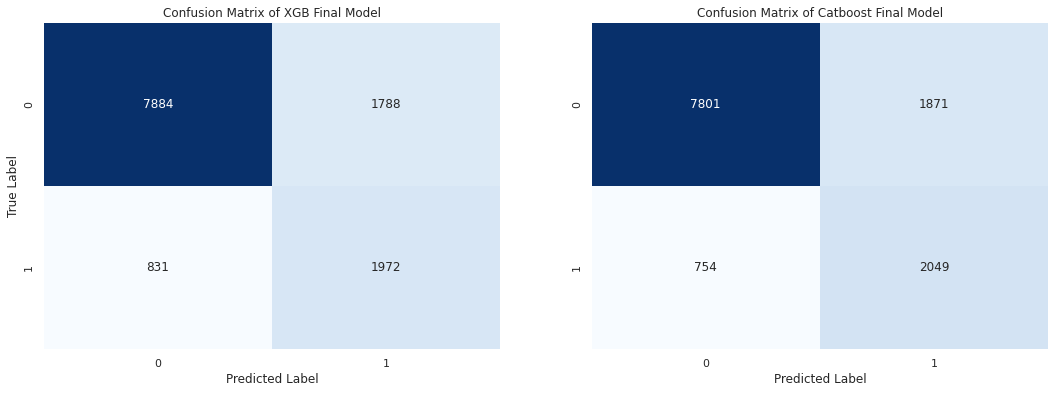

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(cm_model_xgb_final, annot=True, cmap='Blues', fmt='g', ax=axs[0], cbar=False)
axs[0].set_title('Confusion Matrix of XGB Final Model')
axs[0].set_ylabel('True Label')
axs[0].set_xlabel('Predicted Label')

# Plot the second confusion matrix
sns.heatmap(cm_model_cat_final, annot=True,cmap='Blues', fmt='g', ax=axs[1], cbar=False)
axs[1].set_title('Confusion Matrix of Catboost Final Model')
axs[1].set_xlabel('Predicted Label')

plt.savefig('confusion_matrices_final.png', dpi=300, bbox_inches='tight')

In [94]:
cm_model_xgb_final

array([[7884, 1788],
       [ 831, 1972]])

In [95]:
cm_model_cat_final

array([[7801, 1871],
       [ 754, 2049]])

## Test Demo

In [63]:
demo_data_X = demo_data.drop(columns = ['fraud_bool'])
demo_data_y = demo_data['fraud_bool']

In [64]:
demo_features = demo_data_X[final_features]

In [66]:
dt_pred_demo = cat_final.predict(demo_features)
dt_pred_demo

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])